# Notebook 1, projet 4

Bonjour, ceci est le Notebook d'analyse exploratoire. Nous allons tout de même commencer par un éventuel nettoyage.

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Données

In [3]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
data.shape

(3376, 46)

In [5]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [5]:
data.duplicated().sum()

0

In [6]:
#Pas de doublons
data.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


Quelques données sont manquantes.
Avant de les traîter, considérons quelles colonnes nous intéressent, et de quelles colonnes nous n'avons pas besoin.

In [7]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [8]:
#Déjà, on n'utilisera pas DataYear, City et State.
data.loc[data['BuildingType']=='Residential',:]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

[0 rows x 46 columns]

In [9]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

In [10]:
#Il faudra retirer tous les bâtiments "Multifamily" puisqu'on ne considère pas les résidences 

Je retire toutes les colonnes dont je sais que je ne vais pas me servir

In [11]:
cols = ['DataYear','City','State','Comments','ComplianceStatus','DefaultData','NaturalGas(kBtu)','NaturalGas(therms)','Electricity(kBtu)','Electricity(kWh)','SteamUse(kBtu)','YearsENERGYSTARCertified','PropertyName','Address','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode','Latitude','Longitude']

In [12]:
data = data.drop(columns=cols)

In [13]:
data.shape

(3376, 27)

A présent, on va vouloir retirer tous les bâtiments résidentiels, hors-sujets sur notre étude.

In [14]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient', nan,
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indust

On ne veut pas de :

- Multifamily Housing
- Other - Lodging/Residential
- Residence Hall / Dormitory
- Senior Care Community
- Residential Care Facility


Je ne compte pas "Residential Care Facility" car cela ne correspond pas vraiment à un "logement" mais presque plus à un "hôpital" à mon sens.

On doit investiguer :
- nan
- "Other"

Commençons par retirer les 5 dont on ne veut pas.

In [15]:
#data = data.loc[~(data['LargestPropertyUseType'] == 'Multifamily Housing') & ~(data['LargestPropertyUseType'] == 'Other - Lodging/Residential') & ~(data['LargestPropertyUseType'] == 'Residence Hall/Dormitory') & ~(data['LargestPropertyUseType'] == 'Senior Care Community') & ~(data['LargestPropertyUseType'] == 'Residential Care Facility'),:]
data = data.loc[~(data['LargestPropertyUseType'].isin(['Multifamily Housing','Other - Lodging/Residential','Residence Hall/Dormitory','Senior Care Community','Residential Care Facility'])),:]

In [16]:
data.shape

(1632, 27)

C'est effrayant, on n'avait déjà pas beaucoup de données, on en a perdu la moitié (!!)

Et consultons les autres.

In [17]:
data.loc[data['LargestPropertyUseType'] == 'Other',['BuildingType','PrimaryPropertyType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].head(60)

BuildingType PrimaryPropertyType  \
21          NonResidential               Other   
69      Nonresidential COS               Other   
70      Nonresidential COS               Other   
71      Nonresidential COS               Other   
73      Nonresidential COS               Other   
74      Nonresidential COS               Other   
75      Nonresidential COS               Other   
89          NonResidential               Other   
90          NonResidential               Other   
100     Nonresidential COS               Other   
117         NonResidential               Other   
119         NonResidential               Other   
140         NonResidential               Other   
187         NonResidential               Other   
192         NonResidential               Other   
195                 Campus               Other   
298         NonResidential               Other   
303         NonResidential               Other   
340                 Campus               Other   
341         NonResidential  Mixed Use Property   
361         NonResidential               Other   
395         NonResidential  Mixed Use Property   
399         NonResidential               Other   
408         NonResidential               Other   
432         NonResidential               Other   
433         NonResidential               Other   
442         NonResidential               Other   
446         NonResidential               Other   
458     Nonresidential COS               Other   
461         NonResidential               Other   
529         NonResidential        Retail Store   
545         NonResidential               Other   
584         NonResidential               Other   
587     Nonresidential COS               Other   
588         NonResidential               Other   
590         NonResidential               Other   
619         NonResidential               Other   
620         NonResidential  Mixed Use Property   
632      SPS-District K-12               Other   
687         NonResidential               Other   
716     Nonresidential COS               Other   
760   Multifamily LR (1-4)               Other   
796         NonResidential  Mixed Use Property   
876   Multifamily HR (10+)               Other   
1002        NonResidential               Other   
1007     SPS-District K-12               Other   
1155        NonResidential               Other   
1168        NonResidential               Other   
1177        NonResidential               Other   
1189        NonResidential               Other   
1273    Nonresidential COS               Other   
1276        NonResidential               Other   
1277    Nonresidential COS               Other   
1280    Nonresidential COS               Other   
1291    Nonresidential COS               Other   
1292    Nonresidential COS               Other   
1295        NonResidential               Other   
1444  Multifamily LR (1-4)               Other   
1524        NonResidential  Mixed Use Property   
1557        NonResidential               Other   

                         SecondLargestPropertyUseType  \
21                                                NaN   
69                                                NaN   
70                                                NaN   
71                                                NaN   
73                                                NaN   
74                                                NaN   
75                                                NaN   
89                                                NaN   
90                                            Parking   
100                                            Office   
117                                        Courthouse   
119                                               NaN   
140                                               NaN   
187                                               NaN   
192                                               NaN   
195                                               N

In [18]:
data.loc[data['LargestPropertyUseType'] == 'Other',['BuildingType','PrimaryPropertyType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].tail(43)

BuildingType PrimaryPropertyType  \
1557        NonResidential               Other   
1593        NonResidential               Other   
1620        NonResidential               Other   
1669        NonResidential               Other   
1670        NonResidential               Other   
1732                Campus               Other   
1757        NonResidential               Other   
1760        NonResidential               Other   
1767        NonResidential               Other   
1862                Campus               Other   
1900        NonResidential  Mixed Use Property   
1972        NonResidential               Other   
1993                Campus               Other   
1996        NonResidential               Other   
1997        NonResidential               Other   
2019        NonResidential               Other   
2035        NonResidential               Other   
2041        NonResidential               Other   
2043        NonResidential               Other   
2134        NonResidential               Other   
2138        NonResidential               Other   
2140        NonResidential               Other   
2142  Multifamily LR (1-4)               Other   
2150    Nonresidential COS               Other   
2182        NonResidential  Mixed Use Property   
2189        NonResidential               Other   
2248        NonResidential  Mixed Use Property   
2252        NonResidential               Other   
2385        NonResidential               Other   
2411        NonResidential               Other   
2442    Nonresidential COS               Other   
2454        NonResidential               Other   
2548        NonResidential               Other   
2862        NonResidential               Other   
2881        NonResidential               Other   
2913        NonResidential               Other   
2924        NonResidential               Other   
3020    Nonresidential COS               Other   
3064        NonResidential               Other   
3129        NonResidential  Mixed Use Property   
3152    Nonresidential COS               Other   
3182        NonResidential               Other   
3232    Nonresidential COS               Other   

               SecondLargestPropertyUseType ThirdLargestPropertyUseType  
1557                                    NaN                         NaN  
1593                                Parking                         NaN  
1620                                 Office                         NaN  
1669                                    NaN                         NaN  
1670                                    NaN                         NaN  
1732                                    NaN                         NaN  
1757                                    NaN                         NaN  
1760                                    NaN                         NaN  
1767                                    NaN                         NaN  
1862                                    NaN                         NaN  
1900             Non-Refrigerated Warehouse                      Office  
1972                                    NaN                         NaN  
1993                                Parking                         NaN  
1996                                    NaN                         NaN  
1997                                    NaN                         NaN  
2019                                    NaN                         NaN  
2035                                    NaN                         NaN  
2041                           Retail Store                         NaN  
2043                                    NaN                         NaN  
2134                                    NaN                         NaN  
2138                                 Office                Retail Store  
2140                                    NaN                         NaN  
2142                           Retail Store                         NaN  
2150                                P

Sur ces 102 lignes, je vais retirer celles donc le type est "multifamily", soit 4 lignes.

In [19]:
data.loc[data['LargestPropertyUseType'].isna(),['BuildingType','PrimaryPropertyType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']].tail(43)

BuildingType          PrimaryPropertyType  \
353         NonResidential        Self-Storage Facility   
578         NonResidential  Small- and Mid-Sized Office   
758   Multifamily LR (1-4)         Low-Rise Multifamily   
1077  Multifamily HR (10+)        High-Rise Multifamily   
1147        NonResidential                        Hotel   
1483  Multifamily MR (5-9)         Mid-Rise Multifamily   
1756  Multifamily HR (10+)        High-Rise Multifamily   
1768  Multifamily LR (1-4)         Low-Rise Multifamily   
1792  Multifamily LR (1-4)         Low-Rise Multifamily   
2321  Multifamily LR (1-4)         Low-Rise Multifamily   
2336  Multifamily LR (1-4)         Low-Rise Multifamily   
2414        NonResidential  Small- and Mid-Sized Office   
2459        NonResidential                   Restaurant   
2474  Multifamily LR (1-4)         Low-Rise Multifamily   
2480  Multifamily LR (1-4)         Low-Rise Multifamily   
2545  Multifamily LR (1-4)         Low-Rise Multifamily   
2670        NonResidential           Mixed Use Property   
2886  Multifamily LR (1-4)         Low-Rise Multifamily   
3040  Multifamily LR (1-4)         Low-Rise Multifamily   
3348  Multifamily LR (1-4)         Low-Rise Multifamily   

     SecondLargestPropertyUseType ThirdLargestPropertyUseType  
353                           NaN                         NaN  
578                           NaN                         NaN  
758                           NaN                         NaN  
1077                          NaN                         NaN  
1147                          NaN                         NaN  
1483                          NaN                         NaN  
1756                          NaN                         NaN  
1768                          NaN                         NaN  
1792                          NaN                         NaN  
2321                          NaN                         NaN  
2336                          NaN                         NaN  
2414                          NaN                         NaN  
2459                          NaN                         NaN  
2474                          NaN                         NaN  
2480                          NaN                         NaN  
2545                          NaN                         NaN  
2670                          NaN                         NaN  
2886                          NaN                         NaN  
3040                          NaN                         NaN  
3348                          NaN                         NaN

Beaucoup de monde à retirer ici, je vais essayer une autre approche.

In [20]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Multifamily LR (1-4)', 'Multifamily HR (10+)',
       'Multifamily MR (5-9)', 'Nonresidential WA'], dtype=object)

In [21]:
data.loc[data['BuildingType']=='Multifamily LR (1-4)',['BuildingType','PrimaryPropertyType','LargestPropertyUseType']]

BuildingType          PrimaryPropertyType LargestPropertyUseType
758   Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
760   Multifamily LR (1-4)                        Other                  Other
1076  Multifamily LR (1-4)  Small- and Mid-Sized Office                 Office
1444  Multifamily LR (1-4)                        Other                  Other
1768  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
1792  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
2142  Multifamily LR (1-4)                        Other                  Other
2169  Multifamily LR (1-4)           Mixed Use Property  Self-Storage Facility
2321  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
2336  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
2474  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
2480  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
2545  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
2773  Multifamily LR (1-4)                   University     College/University
2886  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
3040  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN
3348  Multifamily LR (1-4)         Low-Rise Multifamily                    NaN

Filtrons les "Low-rise multifamily" et mes "mid-rise multifamily"


In [22]:
data = data.loc[~(data['PrimaryPropertyType'] == 'Low-Rise Multifamily') & ~(data['PrimaryPropertyType'] == 'Mid-Rise Multifamily') & ~(data['PrimaryPropertyType'] == 'High-Rise Multifamily')]

In [23]:
data.shape

(1618, 27)

In [24]:
#C'est moins drastique que la fois précédente.
#Je retire désormais les 4 lignes dont j'ai parlé précédemment et que j'ai laissé trainer

data = data.loc[~((data['LargestPropertyUseType'] == 'Other') & (data['BuildingType'] == 'Multifamily LR (1-4)')),:]
data = data.loc[~((data['LargestPropertyUseType'] == 'Other') & (data['BuildingType'] == 'Multifamily HR (10+)')),:]

In [25]:
data.shape

(1614, 27)

Bon... On n'a plus que 1614 bâtiments, MAIS je crois bien qu'il n'y a plus de bâtiments résidentiels, et les quelques uns sur qui on doutait ne sont plus là non plus.

In [26]:
#Réessayons ceci
data.isnull().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     2
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             2
LargestPropertyUseType                6
LargestPropertyUseTypeGFA             6
SecondLargestPropertyUseType        786
SecondLargestPropertyUseTypeGFA     786
ThirdLargestPropertyUseType        1274
ThirdLargestPropertyUseTypeGFA     1274
ENERGYSTARScore                     559
SiteEUI(kBtu/sf)                      3
SiteEUIWN(kBtu/sf)                    3
SourceEUI(kBtu/sf)                    2
SourceEUIWN(kBtu/sf)                  2
SiteEnergyUse(kBtu)                   2
SiteEnergyUseWN(kBtu)                 3
Outlier                            1598


In [27]:
#Comme je n'ai pas encore décidé de qui garder entre PrimarypropertyType, BuildingType, ou encore LargestPropertyUseType,
#Je conserve les 3 pour l'instant, en revanche, je peux virer quelques colonnes de plus

cols = ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA']
data = data.drop(columns=cols)

### Gestion des "PropertyType"

Plusieurs variables se ressemblent. On a le type de bâtiment, le type "primaire" d'utilisation, et puis les 3 premières utilisations du bâtiment en terme de surface attribuée.
J'ai le sentiment que les utilisations secondaire et tertiaires constituent un découpage en catégories trop "fin" par rapport au nombre de données que nous avons.



In [28]:
data.nunique()

OSEBuildingID                1614
BuildingType                    8
PrimaryPropertyType            19
Neighborhood                   19
YearBuilt                     113
NumberofBuildings              16
NumberofFloors                 44
PropertyGFATotal             1539
PropertyGFAParking            315
PropertyGFABuilding(s)       1534
ListOfAllPropertyUseTypes     347
LargestPropertyUseType         51
ENERGYSTARScore               100
SiteEUI(kBtu/sf)              941
SiteEUIWN(kBtu/sf)            954
SourceEUI(kBtu/sf)           1233
SourceEUIWN(kBtu/sf)         1279
SiteEnergyUse(kBtu)          1597
SiteEnergyUseWN(kBtu)        1586
Outlier                         2
TotalGHGEmissions            1542
GHGEmissionsIntensity         450
dtype: int64

Il se trouve que "LargestPropertyUseType" se décline en 51 classes, tandis que "Buildind Type" n'en a que 8, et "PrimaryPropertyType" en a 19.

Je crains que 51 ne soit trop important au moment d'effectuer des validations croisées. Consultons le nombre d'éléments par classe.

In [29]:
data["LargestPropertyUseType"].value_counts()

Office                                                  498
Non-Refrigerated Warehouse                              199
K-12 School                                             139
Retail Store                                             99
Other                                                    98
Hotel                                                    77
Worship Facility                                         71
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Parking                                                  32
Other - Recreation                                       31
Self-Storage Facility                                    28
College/University                                       25
Other - Entertainment/Public Assembly                    21
Laboratory                                               13
Refrigerated Warehouse                  

In [30]:
#Beaucoup de classes sont très peu fournies... et ici ?
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    293
Other                          245
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             106
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [31]:
#Hormis "Office", c'est plus utilisable (et par exemple, il y en aura partout si je veux 10 folds sur un grid search)
data["BuildingType"].value_counts()

NonResidential          1402
SPS-District K-12         98
Nonresidential COS        84
Campus                    23
Multifamily LR (1-4)       3
Multifamily MR (5-9)       2
Multifamily HR (10+)       1
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [32]:
#Celui-ci me semble peu pertinent.
#En fait je peux peut-être améliorer ma catégorie "Office"
data.loc[data["PrimaryPropertyType"]=="Office",["PropertyGFATotal","PropertyGFABuilding(s)"]]

PropertyGFATotal  PropertyGFABuilding(s)
3366             13661                   13661
3369             15398                   15398
3371             12294                   12294

In [33]:
#Ce sont les plus petits bureaux du panel. Je les range dans "Small- and Mid-sized Office"
data.loc[data["PrimaryPropertyType"]=="Office","PrimaryPropertyType"]="Small- and Mid-Sized Office"

In [34]:
data["PrimaryPropertyType"].value_counts() #Vérification

Small- and Mid-Sized Office    296
Other                          245
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             106
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

Je pense donc conserver la donnée "PrimaryPropertyType" pour catégoriser les différents Bâtiments.

### Surface

Comme dans le bloc précédent, analyser les activités secondaires et tertiaires me paraît un peu trop alambiqué (d'autant plus lorsqu'on constate le nombre de valeurs manquantes).

Il me reste donc les surfaces : 
-totales
-des bâtiments
-des parkings

D'un point de vue de l'émission de CO2, a priori, on peut penser qu'un bâtiment émettra plus qu'un parking. La distinction semble donc intéressante.

Toutefois, et j'ai vérifié, le total est simplement l'addition des deux autres. Il est donc inutile (surtout au niveau des corrélations) de garder ces trois métriques. Je vais me débarasser des parkings, pour conserver le total et les bâtiments, quitte à plus tard éventuellement me séparer de l'un des deux.

### Localisation

Le côté "Latitude/Longitude" me paraissant difficile à utiliser, j'ai favorisé la variable "Neighborhood".

In [35]:
data["Neighborhood"].value_counts()

DOWNTOWN                  353
GREATER DUWAMISH          344
MAGNOLIA / QUEEN ANNE     148
LAKE UNION                144
NORTHEAST                 113
EAST                      113
NORTHWEST                  79
BALLARD                    63
NORTH                      57
CENTRAL                    50
SOUTHEAST                  43
DELRIDGE                   42
SOUTHWEST                  40
North                       8
Ballard                     6
Delridge                    4
Northwest                   4
Central                     2
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

Malheureusement, certaines classes sont faiblement fournies, mais la répartition semble tout de même utilisable telle quelle. Si on s'intéresse uniquement à l'impact de cette variable, on pourra éventuellement ignorer les quartiers représentés moins de 10 fois.

Une minute, je viens de réaliser que ces données sont en fait les mêmes mais en minuscules... Remédions à cela.

In [36]:
data.loc[data["Neighborhood"]=="North","Neighborhood"]="NORTH"
data.loc[data["Neighborhood"]=="Ballard","Neighborhood"]="BALLARD"
data.loc[data["Neighborhood"]=="Delridge","Neighborhood"]="DELRIDGE"
data.loc[data["Neighborhood"]=="Northwest","Neighborhood"]="NORTHWEST"
data.loc[data["Neighborhood"]=="Central","Neighborhood"]="CENTRAL"
data.loc[data["Neighborhood"]=="DELRIDGE NEIGHBORHOODS","Neighborhood"]="DELRIDGE"

In [37]:
data["Neighborhood"].value_counts()

DOWNTOWN                 353
GREATER DUWAMISH         344
MAGNOLIA / QUEEN ANNE    148
LAKE UNION               144
NORTHEAST                113
EAST                     113
NORTHWEST                 83
BALLARD                   69
NORTH                     65
CENTRAL                   52
DELRIDGE                  47
SOUTHEAST                 43
SOUTHWEST                 40
Name: Neighborhood, dtype: int64

Voilà qui est bien mieux.

### Target

A priori, la "target" concerne les émissions de CO2.
On a comme indicateurs les émissions du site et celles de la source. Je pense avoir compris que notre target concerne les émissions du site.

Ensuite, je vais utiliser le WN (weather normalized), puisqu'il semble être plus solide dans sa construction (moyenne sur 30 ans pour éviter les biais de météo).

Enfin, j'ai hésité entre la version "par mètre carré" ou la version "brute".
J'ai tenté de comprendre si la division par la surface concernait toute la surface, ou bien seulement celle du bâtiment. En fait, ce n'est pas clair (ce serait tout de même plutôt celle du bâtiment, mais la correspondance reste moyenne).

Finalement, j'opte pour les émissions brutes, et donc la colonne : 

"SiteEnergyUseWN(kBtu)"

Ainsi que les : 

"TotalGHGEmissions

### Colonnes à retirer de nouveau

Cela nous donne quelques colonnes à retirer :

Je vais tout de même, par curiosité pour l'instant, conserver les données "par mètre carré"

In [38]:
cols = ["BuildingType","PropertyGFAParking","LargestPropertyUseType","SiteEUI(kBtu/sf)",'SourceEUI(kBtu/sf)',"SourceEUIWN(kBtu/sf)","SiteEnergyUse(kBtu)","ListOfAllPropertyUseTypes"]

In [39]:
data = data.drop(columns=cols)

In [40]:
data.shape

(1614, 14)

On a sacrément dégraissé (trop ?)
Voyons ce qu'il nous reste : 

### valeurs manquantes, outliers.

In [41]:
data.isnull().sum()

OSEBuildingID                0
PrimaryPropertyType          0
Neighborhood                 0
YearBuilt                    0
NumberofBuildings            2
NumberofFloors               0
PropertyGFATotal             0
PropertyGFABuilding(s)       0
ENERGYSTARScore            559
SiteEUIWN(kBtu/sf)           3
SiteEnergyUseWN(kBtu)        3
Outlier                   1598
TotalGHGEmissions            2
GHGEmissionsIntensity        2
dtype: int64

On a donc : 
- 2 valeurs manquantes sur le nombre de bâtiments
- 3 sur la target de l'énergie
- 2 sur la target des émissions de CO2

Clairement, on va supprimer les lignes où la target manque. Notre problème étant de l'estimation, on ne va pas entraîner nos algorithmes sur des valeurs déjà estimées.

In [42]:
data.loc[data["SiteEUIWN(kBtu/sf)"].isnull(),["SiteEnergyUseWN(kBtu)","TotalGHGEmissions","GHGEmissionsIntensity","NumberofBuildings"]]

SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
563                     NaN             109.16                   0.83   
578                     NaN                NaN                    NaN   
2670                    NaN                NaN                    NaN   

      NumberofBuildings  
563                 1.0  
578                 NaN  
2670                NaN

Bonne nouvelle, ce sont les mêmes données qui posent problème, on conserve donc quelques valeurs de plus.

In [43]:
data = data.loc[~(data["SiteEUIWN(kBtu/sf)"].isnull()),:]

In [44]:
data.isnull().sum()

OSEBuildingID                0
PrimaryPropertyType          0
Neighborhood                 0
YearBuilt                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFABuilding(s)       0
ENERGYSTARScore            557
SiteEUIWN(kBtu/sf)           0
SiteEnergyUseWN(kBtu)        0
Outlier                   1595
TotalGHGEmissions            0
GHGEmissionsIntensity        0
dtype: int64

Pour l'ENERGYSTARScore, au vu de la demande qui m'est faite de l'évaluer, je n'ai pas encore tout à fait décidé de comment le traîter. Ce qui est certain, c'est que je ne peux pas l'imputer, au risque de fournir par la suite une mauvaise évaluation.

### Outliers

Voyons si nous pouvons en détecter quelques uns de manière simple

In [45]:
data.describe()

OSEBuildingID    YearBuilt  NumberofBuildings  NumberofFloors  \
count    1611.000000  1611.000000        1611.000000     1611.000000   
mean    16064.935444  1961.758535           1.173184        4.111111   
std     13760.763847    32.609425           2.979087        6.606655   
min         1.000000  1900.000000           0.000000        0.000000   
25%       575.500000  1930.000000           1.000000        1.000000   
50%     21116.000000  1965.000000           1.000000        2.000000   
75%     24538.500000  1989.000000           1.000000        4.000000   
max     50226.000000  2015.000000         111.000000       99.000000   

       PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
count      1.611000e+03            1.611000e+03      1054.000000   
mean       1.198554e+05            1.067320e+05        65.602467   
std        3.012626e+05            2.879464e+05        28.375424   
min        1.128500e+04            1.092500e+04         1.000000   
25%        2.945750e+04            2.849600e+04        49.000000   
50%        4.925200e+04            4.741500e+04        73.000000   
75%        1.060205e+05            9.492400e+04        89.000000   
max        9.320156e+06            9.320156e+06       100.000000   

       SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count         1611.000000           1.611000e+03        1611.000000   
mean            74.410366           8.134686e+06         186.165593   
std             75.615545           2.238144e+07         764.984518   
min              0.000000           0.000000e+00          -0.800000   
25%             35.350000           1.277426e+06          19.710000   
50%             53.599998           2.654698e+06          49.090000   
75%             83.950001           7.069440e+06         138.600000   
max            834.400024           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  
count            1611.000000  
mean                1.590354  
std                 2.339998  
min                -0.020000  
25%                 0.340000  
50%                 0.850000  
75%                 1.820000  
max                34.090000

Quelques valeurs sont surprenantes. Sont-elles aberrantes ?

Commençons colonne par colonne.

- L'année de construction semble entièrement raisonnable à première vue.
- Le nombre de bâtiments semble avoir un maximum un peu élevé, regardons de quoi il s'agit.

In [46]:
data.loc[data["NumberofBuildings"] > 50,:]

OSEBuildingID PrimaryPropertyType Neighborhood  YearBuilt  \
3274          49967          University    NORTHEAST       1900   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3274              111.0               0           9320156   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
3274                 9320156              NaN                 0.0   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
3274                    0.0     NaN           11140.56                    1.2

Le fait que ceci corresponde à une université est cohérent.

Toutefois, c'est un outlier pour les bâtiments, pour la surface totale, ainsi que celle des bâtiments (plus de 9km² ??), et enfin pour l'énergie (0.0).

Il faut donc nous débarasser de cette ligne.

In [47]:
data = data.loc[~(data["OSEBuildingID"] == 49967),:]

In [48]:
data.describe()

OSEBuildingID    YearBuilt  NumberofBuildings  NumberofFloors  \
count    1610.000000  1610.000000        1610.000000     1610.000000   
mean    16043.878261  1961.796894           1.104969        4.113665   
std     13739.051621    32.583178           1.174427        6.607913   
min         1.000000  1900.000000           0.000000        0.000000   
25%       575.250000  1930.000000           1.000000        1.000000   
50%     21115.500000  1965.000000           1.000000        2.000000   
75%     24537.750000  1989.000000           1.000000        4.000000   
max     50226.000000  2015.000000          27.000000       99.000000   

       PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
count      1.610000e+03            1.610000e+03      1054.000000   
mean       1.141410e+05            1.010094e+05        65.602467   
std        1.953851e+05            1.737072e+05        28.375424   
min        1.128500e+04            1.092500e+04         1.000000   
25%        2.943725e+04            2.849400e+04        49.000000   
50%        4.925050e+04            4.739150e+04        73.000000   
75%        1.057750e+05            9.485325e+04        89.000000   
max        2.200000e+06            2.200000e+06       100.000000   

       SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count         1610.000000           1.610000e+03        1610.000000   
mean            74.456584           8.139739e+06         179.361621   
std             75.616274           2.238748e+07         714.799960   
min              0.000000           0.000000e+00          -0.800000   
25%             35.400002           1.279354e+06          19.700000   
50%             53.599998           2.654801e+06          49.040000   
75%             84.025000           7.070219e+06         138.177500   
max            834.400024           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  
count            1610.000000  
mean                1.590596  
std                 2.340705  
min                -0.020000  
25%                 0.340000  
50%                 0.850000  
75%                 1.820000  
max                34.090000

Regardons tout de même les constructions à plus de 15 bâtiments.

In [49]:
data.loc[data["NumberofBuildings"] > 15,:]

OSEBuildingID PrimaryPropertyType           Neighborhood  YearBuilt  \
105             172          University               DELRIDGE       1970   
1862          23622               Other  MAGNOLIA / QUEEN ANNE       1955   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
105                27.0               2            441071   
1862               23.0               1            260241   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
105                   441071              NaN           85.199997   
1862                  260241              NaN          138.500000   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
105              41151732.0     NaN             866.23                   1.96  
1862             36034584.0     NaN             565.55                   2.17

Je ne trouve pas d'anomalies ici.

- Le nombre d'étages paraît un peu haut au maximum. Regardons

In [50]:
data.loc[data["NumberofFloors"] > 50,:]

OSEBuildingID PrimaryPropertyType      Neighborhood  YearBuilt  \
233             357        Large Office          DOWNTOWN       1990   
271             399        Large Office          DOWNTOWN       1988   
292             422        Large Office          DOWNTOWN       1989   
559             775        Large Office          DOWNTOWN       1985   
1359          21611    Worship Facility  GREATER DUWAMISH       1977   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
233                 1.0              63           1354987   
271                 1.0              55           1400000   
292                 1.0              56           1605578   
559                 1.0              76           1952220   
1359                1.0              99             21948   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
233                  1195387             89.0           50.400002   
271                  1115000             92.0           48.500000   
292                  1215718             97.0           37.900002   
559                  1632820             86.0           55.099998   
1359                   21948             80.0           14.900000   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
233            6.157618e+07     NaN             429.27                   0.32  
271            5.514030e+07     NaN             588.90                   0.42  
292            5.098450e+07     NaN             525.78                   0.33  
559            9.253726e+07     NaN             882.56                   0.45  
1359           3.260012e+05     NaN               2.27                   0.10

La dernière ligne est clairement incohérente. 99 étages mais GFA pas en accord. émissions de CO2 risibles, et même l'énergie par m² est étonnante au vu de l'année de construction.

La catégorie est une église, et on se rend compte qu'avec 1 seul étage, cette ligne serait bien plus cohérente !

In [51]:
data.loc[data["OSEBuildingID"] == 21611, "NumberofFloors"] = 1

In [52]:
data.describe()

OSEBuildingID    YearBuilt  NumberofBuildings  NumberofFloors  \
count    1610.000000  1610.000000        1610.000000     1610.000000   
mean    16043.878261  1961.796894           1.104969        4.052795   
std     13739.051621    32.583178           1.174427        6.170184   
min         1.000000  1900.000000           0.000000        0.000000   
25%       575.250000  1930.000000           1.000000        1.000000   
50%     21115.500000  1965.000000           1.000000        2.000000   
75%     24537.750000  1989.000000           1.000000        4.000000   
max     50226.000000  2015.000000          27.000000       76.000000   

       PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
count      1.610000e+03            1.610000e+03      1054.000000   
mean       1.141410e+05            1.010094e+05        65.602467   
std        1.953851e+05            1.737072e+05        28.375424   
min        1.128500e+04            1.092500e+04         1.000000   
25%        2.943725e+04            2.849400e+04        49.000000   
50%        4.925050e+04            4.739150e+04        73.000000   
75%        1.057750e+05            9.485325e+04        89.000000   
max        2.200000e+06            2.200000e+06       100.000000   

       SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count         1610.000000           1.610000e+03        1610.000000   
mean            74.456584           8.139739e+06         179.361621   
std             75.616274           2.238748e+07         714.799960   
min              0.000000           0.000000e+00          -0.800000   
25%             35.400002           1.279354e+06          19.700000   
50%             53.599998           2.654801e+06          49.040000   
75%             84.025000           7.070219e+06         138.177500   
max            834.400024           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  
count            1610.000000  
mean                1.590596  
std                 2.340705  
min                -0.020000  
25%                 0.340000  
50%                 0.850000  
75%                 1.820000  
max                34.090000

- Maintenant, en terme de surface, on a un maximum au-delà de 2km², ce qui est absolument gigantesque. Observons tout ce qui dépasse 500 000 m² pour commencer.

In [53]:
data.loc[data["PropertyGFATotal"] > 500000,:]

OSEBuildingID PrimaryPropertyType           Neighborhood  YearBuilt  \
2                 3               Hotel               DOWNTOWN       1969   
20               26               Other               DOWNTOWN       1916   
36               46           Warehouse       GREATER DUWAMISH       1961   
49               63               Hotel               DOWNTOWN       1982   
72              107        Large Office             LAKE UNION       2010   
77              114        Large Office  MAGNOLIA / QUEEN ANNE       2010   
121             194        Retail Store                  NORTH       1951   
124             198            Hospital              NORTHEAST       1953   
128             211          University              NORTHWEST       1970   
155             245               Other       GREATER DUWAMISH       1999   
158             249               Other       GREATER DUWAMISH       1999   
166             267               Hotel               DOWNTOWN       1999   
167             268            Hospital                CENTRAL       1990   
170             276            Hospital                   EAST       2000   
205             327        Retail Store               DOWNTOWN       1925   
206             328        Large Office               DOWNTOWN       1976   
207             329        Large Office               DOWNTOWN       2000   
212             334        Large Office               DOWNTOWN       2009   
214             336        Large Office               DOWNTOWN       2009   
221             345        Large Office               DOWNTOWN       1983   
222             346        Large Office               DOWNTOWN       1986   
225             349        Large Office               DOWNTOWN       1991   
227             351        Large Office               DOWNTOWN       1980   
229             353        Large Office               DOWNTOWN       1969   
230             354        Large Office               DOWNTOWN       2002   
231             355        Large Office               DOWNTOWN       1973   
233             357        Large Office               DOWNTOWN       1990   
248             373        Large Office               DOWNTOWN       1979   
261             388        Large Office               DOWNTOWN       1976   
262             389               Hotel               DOWNTOWN       1923   
271             399        Large Office               DOWNTOWN       1988   
273             402        Large Office               DOWNTOWN       1989   
285             415        Large Office               DOWNTOWN       1985   
292             422        Large Office               DOWNTOWN       1989   
293             423        Large Office               DOWNTOWN       1980   
302             433        Retail Store               DOWNTOWN       1929   
304             435               Other               DOWNTOWN       1990   
307             438      Medical Office                   EAST       1992   
338             475        Large Office             LAKE UNION       2002   
340             477               Other             LAKE UNION       1997   
477             640        Large Office       GREATER DUWAMISH       1912   
488             657  Mixed Use Property               DOWNTOWN       2006   
490             659        Large Office               DOWNTOWN       2005   
507             690        Large Office               DOWNTOWN       2001   
559             775        Large Office               DOWNTOWN       1985   
564             758               Other               DOWNTOWN       1999   
577             772        Large Office               DOWNTOWN       1981   
618             828            Hospital                   EAST       1994   
1270          21399        Large Office             LAKE UNION       2009   
1484          21951  Mixed Use Property                  NORTH       2008   
1494          22062          University                   EAST       1939   
16

Je n'ai pas été assez discriminant, apparemment c'est "commun" pour les énormes bureaux de dépasser cette taille. Voyons au-delà du kilomètre carré.

In [54]:
data.loc[data["PropertyGFATotal"] > 1000000,:]

OSEBuildingID PrimaryPropertyType      Neighborhood  YearBuilt  \
155             245               Other  GREATER DUWAMISH       1999   
158             249               Other  GREATER DUWAMISH       1999   
170             276            Hospital              EAST       2000   
221             345        Large Office          DOWNTOWN       1983   
229             353        Large Office          DOWNTOWN       1969   
230             354        Large Office          DOWNTOWN       2002   
233             357        Large Office          DOWNTOWN       1990   
271             399        Large Office          DOWNTOWN       1988   
273             402        Large Office          DOWNTOWN       1989   
292             422        Large Office          DOWNTOWN       1989   
304             435               Other          DOWNTOWN       1990   
477             640        Large Office  GREATER DUWAMISH       1912   
490             659        Large Office          DOWNTOWN       2005   
559             775        Large Office          DOWNTOWN       1985   
577             772        Large Office          DOWNTOWN       1981   
618             828            Hospital              EAST       1994   
1494          22062          University              EAST       1939   
2530          25992  Mixed Use Property          DOWNTOWN       2009   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
155                 1.0               6           1585960   
158                 1.0               3           1172127   
170                 9.0               8           1158691   
221                 1.0              47           1323055   
229                 1.0              49           1123435   
230                 1.0              37           1052469   
233                 1.0              63           1354987   
271                 1.0              55           1400000   
273                 1.0              46           1536606   
292                 1.0              56           1605578   
304                 1.0               6           1400000   
477                 0.0               6           1380959   
490                 1.0              42           1592914   
559                 1.0              76           1952220   
577                 1.0              42           1249055   
618                 7.0              14           1765970   
1494                1.0               2           2200000   
2530                1.0              19           1206670   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
155                  1258280              NaN           39.200001   
158                  1172127              NaN           49.000000   
170                  1158691             29.0          219.699997   
221                  1323055             94.0           42.599998   
229                   754455             89.0           55.500000   
230                   888049             93.0           47.200001   
233                  1195387             89.0           50.400002   
271                  1115000             92.0           48.500000   
273                  1023998             89.0           53.599998   
292                  1215718             97.0           37.900002   
304                  1400000              NaN            0.000000   
477                  1380959             79.0           50.099998   
490                  1592914             97.0           45.500000   
559                  1632820             86.0           55.099998   
577                  1047934             95.0           39.599998   
618                  1765970             54.0          180.500000   
1494                 2200000              NaN           71.599998   
2530                 1004813             87.0           55.000000   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
155              62160304.0     NaN             892.63                   0.56  
158  

La ligne 304 est clairement à retirer (targets invalides)

Les hôpitaux semblent beaucoup consommer.

In [55]:
data = data.loc[~(data["OSEBuildingID"] == 435),:]

- Certaines lignes déclarent 0 bâtiment, ou 0 étages, regardons de plus près.

In [56]:
data.loc[data["NumberofBuildings"] == 0,:]

OSEBuildingID          PrimaryPropertyType           Neighborhood  \
63               89               Medical Office                   EAST   
76              113  Small- and Mid-Sized Office  MAGNOLIA / QUEEN ANNE   
160             257                    Warehouse       GREATER DUWAMISH   
201             322                 Large Office               DOWNTOWN   
241             366  Small- and Mid-Sized Office              NORTHEAST   
264             391           Mixed Use Property       GREATER DUWAMISH   
278             408                 Large Office               DOWNTOWN   
280             410                        Hotel               DOWNTOWN   
291             421                        Other               DOWNTOWN   
358             504                        Other               DELRIDGE   
365             517  Supermarket / Grocery Store              NORTHWEST   
417             576                        Other                  NORTH   
429             588           Mixed Use Property             LAKE UNION   
433             594                        Other       GREATER DUWAMISH   
477             640                 Large Office       GREATER DUWAMISH   
481             649  Small- and Mid-Sized Office                   EAST   
488             657           Mixed Use Property               DOWNTOWN   
494             673                 Retail Store               DELRIDGE   
544             735                    Warehouse  MAGNOLIA / QUEEN ANNE   
608             812                    Warehouse       GREATER DUWAMISH   
809           19900                   Laboratory               DOWNTOWN   
985           20427           Mixed Use Property              SOUTHWEST   
1002          20474                        Other                  NORTH   
1025          20532                        Other              SOUTHEAST   
1177          21180                        Other             LAKE UNION   
1244          21336                        Other                   EAST   
1256          21365               Medical Office                   EAST   
1317          21508                        Other               DOWNTOWN   
1606          22801                        Other                  NORTH   
2054          24270             Worship Facility              NORTHWEST   
2115          24514  Supermarket / Grocery Store              NORTHWEST   
2166          24646                        Other               DELRIDGE   
2188          24716       Refrigerated Warehouse       GREATER DUWAMISH   
2214          24822  Small- and Mid-Sized Office       GREATER DUWAMISH   
2382          25461                   Restaurant             LAKE UNION   
2441          25661  Small- and Mid-Sized Office               DOWNTOWN   
2482          25772                     Hospital              SOUTHWEST   
2564          26119                 Retail Store                   EAST   
2631          26331  Small- and Mid-Sized Office             LAKE UNION   
2708          26706  Small- and Mid-Sized Office               DOWNTOWN   
2715          26719  Small- and Mid-Sized Office               DOWNTOWN   
2747          26833  Small- and Mid-Sized Office               DOWNTOWN   
2782          26924           Mixed Use Property                   EAST   
2963          27673                        Hotel               DOWNTOWN   
3108          33289                 Large Office               DOWNTOWN   
3121          36034                 Retail Store                   EAST   
3155          45287                        Other                CENTRAL   
3205          49783                   Laboratory             LAKE UNION   
3232          49862                        Other  MAGNOLIA / QUEEN ANNE   
3259          49924  Small- and Mid-Sized Office                   EAST   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
63         1965                0.0               3            179014   
76         1986                0.0  

Je vais me permettre, puisque le nombre d'étages est renseigné, de remplacer tous ces zéros par des 1

In [57]:
data.loc[data["NumberofBuildings"] == 0,"NumberofBuildings"] = 1

In [58]:
data.describe()

OSEBuildingID    YearBuilt  NumberofBuildings  NumberofFloors  \
count    1609.000000  1609.000000        1609.000000     1609.000000   
mean    16053.579242  1961.779366           1.136109        4.051585   
std     13737.806182    32.585714           1.158248        6.171911   
min         1.000000  1900.000000           1.000000        0.000000   
25%       576.000000  1930.000000           1.000000        1.000000   
50%     21116.000000  1965.000000           1.000000        2.000000   
75%     24538.000000  1989.000000           1.000000        4.000000   
max     50226.000000  2015.000000          27.000000       76.000000   

       PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
count      1.609000e+03            1.609000e+03      1054.000000   
mean       1.133418e+05            1.002021e+05        65.602467   
std        1.927957e+05            1.707130e+05        28.375424   
min        1.128500e+04            1.092500e+04         1.000000   
25%        2.941700e+04            2.849200e+04        49.000000   
50%        4.924900e+04            4.736800e+04        73.000000   
75%        1.051000e+05            9.471300e+04        89.000000   
max        2.200000e+06            2.200000e+06       100.000000   

       SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count         1609.000000           1.609000e+03        1609.000000   
mean            74.502859           8.144798e+06         179.473095   
std             75.616976           2.239352e+07         715.008190   
min              0.000000           0.000000e+00          -0.800000   
25%             35.400002           1.280846e+06          19.730000   
50%             53.599998           2.654904e+06          49.090000   
75%             84.099998           7.070998e+06         138.350000   
max            834.400024           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  
count            1609.000000  
mean                1.591585  
std                 2.341096  
min                -0.020000  
25%                 0.340000  
50%                 0.850000  
75%                 1.820000  
max                34.090000

In [59]:
data.loc[data["NumberofFloors"] == 0,:]

OSEBuildingID          PrimaryPropertyType      Neighborhood  YearBuilt  \
166             267                        Hotel          DOWNTOWN       1999   
487             656               Medical Office              EAST       2004   
488             657           Mixed Use Property          DOWNTOWN       2006   
564             758                        Other          DOWNTOWN       1999   
1754          23311               Medical Office              EAST       1945   
1993          24086                        Other  GREATER DUWAMISH       1991   
3130          40028                    Warehouse         NORTHEAST       1940   
3131          40031               Medical Office         NORTHEAST       1960   
3132          40034  Small- and Mid-Sized Office         NORTHEAST       1960   
3168          49705                        Other         NORTHEAST       1929   
3273          49966                        Other         SOUTHEAST       2009   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
166                 1.0               0            934292   
487                 1.0               0            225982   
488                 1.0               0            516407   
564                 1.0               0            947987   
1754                1.0               0            274568   
1993               10.0               0            230971   
3130                1.0               0            384772   
3131                1.0               0             30287   
3132                1.0               0             21931   
3168                8.0               0            502030   
3273                1.0               0             40265   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
166                   934292              NaN          120.500000   
487                   225982             53.0          103.699997   
488                   516407             31.0           78.900002   
564                   947987              NaN           62.099998   
1754                  274568             52.0          111.199997   
1993                  230971              NaN           96.199997   
3130                  384772             69.0           39.000000   
3131                   30287             32.0           81.300003   
3132                   21931             32.0          134.800003   
3168                  502030              NaN           36.599998   
3273                   40265              NaN           56.200001   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
166              66502836.0     NaN            1638.46                   1.75  
487              20764814.0     NaN             692.12                   3.06  
488              40754364.0     NaN             734.72                   1.42  
564              46343304.0     NaN             324.25                   0.34  
1754             25358122.0     NaN            1110.07                   4.04  
1993             22230844.0     NaN             405.05                   1.75  
3130             16139557.0     NaN             391.70                   1.02  
3131              2279632.5     NaN              32.72                   1.08  
3132              4292216.0     NaN             145.11                   6.62  
3168             20672948.0     NaN             549.11                   1.09  
3273              2261075.5     NaN              51.39                   1.28

Si on va un peu plus loin : 

- 1e ligne, les autres hôtels immenses (vus plus tôt) avaient 12, 31 et 41 étages. On peut donc supposer un nombre important d'étages pour celui-ci aussi. Mais ai-je envie d'imputer une valeur au hasard ? Pas vraiment.

- Index 487, 1754, 3131 sont des "Medical Office", voyons les tendances.

Du coup, j'ai été vérfier en ligne, à la main, le nombre d'étages des bâtiments en question.
Malheureusement, je n'ai rien trouvé à l'adresse du bâtiment identifié 24086. Je vais donc devoir me passer de cette donnée.

In [60]:
data.loc[data["OSEBuildingID"] == 267,"NumberofFloors"] = 30 #On remplace individuellement pour les bâtiments concernés

In [61]:
data.loc[data["OSEBuildingID"] == 656,"NumberofFloors"] = 12

In [62]:
data.loc[data["OSEBuildingID"] == 657,"NumberofFloors"] = 3

In [63]:
data.loc[data["OSEBuildingID"] == 758,"NumberofFloors"] = 4
data.loc[data["OSEBuildingID"] == 23311,"NumberofFloors"] = 6
data.loc[data["OSEBuildingID"] == 40028,"NumberofFloors"] = 1
data.loc[data["OSEBuildingID"] == 40031,"NumberofFloors"] = 3
data.loc[data["OSEBuildingID"] == 40034,"NumberofFloors"] = 3
data.loc[data["OSEBuildingID"] == 49705,"NumberofFloors"] = 2
data.loc[data["OSEBuildingID"] == 49966,"NumberofFloors"] = 2

In [64]:
data = data.loc[~(data["OSEBuildingID"] == 24086),:] #Je dois éliminer celui-ci

In [65]:
data.loc[data["NumberofFloors"] == 0,:] #On vérifie que le travail est bien fait

Empty DataFrame
Columns: [OSEBuildingID, PrimaryPropertyType, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFABuilding(s), ENERGYSTARScore, SiteEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu), Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

Impeccable !

- Enfin, certaines targets sont nulles, voire même négatives... Corrigeons cela

In [66]:
data.loc[data["TotalGHGEmissions"] <= 0,:]

OSEBuildingID          PrimaryPropertyType           Neighborhood  \
28               34                  K-12 School                CENTRAL   
152             242                  K-12 School                  NORTH   
513             700  Supermarket / Grocery Store  MAGNOLIA / QUEEN ANNE   
746           19776                        Other              NORTHWEST   
1361          21616                  K-12 School                  NORTH   
3206          49784  Small- and Mid-Sized Office                CENTRAL   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
28         1955                1.0               1            126351   
152        1989                1.0               2             52792   
513        2008                1.0               1             57176   
746        2002                1.0               1             29924   
1361       1954                1.0               1             42292   
3206       2013                1.0               6             52000   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
28                    126351              NaN            0.000000   
152                    52792              NaN            0.000000   
513                    57176             31.0          214.100006   
746                    29924              NaN            0.000000   
1361                   42292            100.0            0.000000   
3206                   52000            100.0            5.000000   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
28             0.000000e+00     NaN                0.0                   0.00  
152            0.000000e+00     NaN                0.0                   0.00  
513            1.284386e+07     NaN                0.0                   0.00  
746            0.000000e+00     NaN                0.0                   0.00  
1361           0.000000e+00     NaN                0.0                   0.00  
3206           2.401321e+05     NaN               -0.8                  -0.02

In [67]:
data = data.loc[~(data["OSEBuildingID"].isin([34,242,700,19776,21616,49784]))] #Les targets sont incohérentes, j'élimine.

In [68]:
data.loc[data["SiteEnergyUseWN(kBtu)"] <= 0,:]

OSEBuildingID          PrimaryPropertyType           Neighborhood  \
31               37                  K-12 School  MAGNOLIA / QUEEN ANNE   
62               87                  K-12 School              SOUTHWEST   
81              118                  K-12 School               DELRIDGE   
85              122                  K-12 School              SOUTHEAST   
95              140                  K-12 School             LAKE UNION   
133             217                  K-12 School                BALLARD   
139             227                  K-12 School                CENTRAL   
220             343                 Large Office               DOWNTOWN   
247             372                 Large Office               DOWNTOWN   
284             414                 Large Office               DOWNTOWN   
350             493  Small- and Mid-Sized Office  MAGNOLIA / QUEEN ANNE   
614             820                  K-12 School                CENTRAL   
630             850                  K-12 School                CENTRAL   
882           20130             Worship Facility              NORTHWEST   
953           20324             Worship Facility              NORTHEAST   
1894          23722                  K-12 School                BALLARD   
3166          49703                  K-12 School  MAGNOLIA / QUEEN ANNE   
3275          49968                   University              NORTHEAST   
3277          49972                   University              NORTHEAST   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
31         1989                1.0               2             51582   
62         1948                1.0               2             53352   
81         1999                1.0               3             74468   
85         1991                1.0               2             58933   
95         1991                1.0               3             66588   
133        1959                1.0               1            160270   
139        1963                1.0               3            136188   
220        1958                1.0              17            378525   
247        1988                1.0              20            497513   
284        1929                1.0              15            151039   
350        1971                1.0               5             88000   
614        1988                1.0               1             52924   
630        1988                1.0               3             55353   
882        1910                1.0               2             23931   
953        2000                1.0               2             31386   
1894       1958                1.0               1             39971   
3166       1952                1.0               1            116101   
3275       1969                1.0               4             58779   
3277       1998                1.0               6            203030   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
31                     51582              NaN                 0.0   
62                     53352              NaN                 0.0   
81                     74468              NaN                 0.0   
85                     58933              NaN                 0.0   
95                     66588              NaN                 0.0   
133                   160270              NaN                 0.0   
139                   136188              NaN                 0.0   
220                   293925             69.0                 0.0   
247                   378769             65.0                 0.0   
284                   151039             84.0                 0.0   
350                    66400             75.0                 0.0   
614                    52924              NaN                 0.0   
630                    55353              NaN                 0.0   
882                    23931             88.0                 0.0   
953                    31386 

In [69]:
data = data.loc[~(data["SiteEnergyUseWN(kBtu)"] <= 0),:] #Même punition, je ne peux pas imputer pour entraîner ensuite des algorithmes.

In [70]:
data.describe()

OSEBuildingID    YearBuilt  NumberofBuildings  NumberofFloors  \
count    1583.000000  1583.000000        1583.000000     1583.000000   
mean    16106.072015  1961.555275           1.132660        4.093493   
std     13649.410614    32.649316           1.146131        6.218532   
min         1.000000  1900.000000           1.000000        1.000000   
25%       582.500000  1930.000000           1.000000        1.000000   
50%     21138.000000  1965.000000           1.000000        2.000000   
75%     24553.500000  1989.000000           1.000000        4.000000   
max     50226.000000  2015.000000          27.000000       76.000000   

       PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
count      1.583000e+03            1.583000e+03      1045.000000   
mean       1.133781e+05            1.001647e+05        65.532057   
std        1.938664e+05            1.717511e+05        28.418469   
min        1.128500e+04            1.092500e+04         1.000000   
25%        2.929900e+04            2.830650e+04        48.000000   
50%        4.878900e+04            4.679700e+04        73.000000   
75%        1.045690e+05            9.447100e+04        89.000000   
max        2.200000e+06            2.200000e+06       100.000000   

       SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count         1583.000000           1.583000e+03        1583.000000   
mean            75.527353           8.256263e+06         180.606368   
std             75.594194           2.255117e+07         720.355194   
min              0.700000           1.726000e+04           0.120000   
25%             36.400000           1.327125e+06          20.005000   
50%             53.900002           2.735166e+06          49.180000   
75%             84.950001           7.227405e+06         136.735000   
max            834.400024           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  
count            1583.000000  
mean                1.606905  
std                 2.355316  
min                 0.000000  
25%                 0.350000  
50%                 0.870000  
75%                 1.865000  
max                34.090000

In [71]:
data.loc[data["GHGEmissionsIntensity"] <= 0,:]

OSEBuildingID          PrimaryPropertyType      Neighborhood  YearBuilt  \
1229          21315  Small- and Mid-Sized Office          DOWNTOWN       1903   
2189          24717                        Other  GREATER DUWAMISH       1910   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
1229                1.0               3             57720   
2189                1.0               3             27690   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
1229                   57720              NaN                 1.0   
2189                   27690              NaN                 0.7   

      SiteEnergyUseWN(kBtu)      Outlier  TotalGHGEmissions  \
1229                24105.5  Low outlier               0.17   
2189                17260.0  Low outlier               0.12   

      GHGEmissionsIntensity  
1229                    0.0  
2189                    0.0

- En regardant ceci, je vais m'intéresser à quelque chose que je n'ai pas encore touché : la colonne "outliers". Observons

In [72]:
data.loc[~(data["Outlier"].isnull()),:]

OSEBuildingID          PrimaryPropertyType           Neighborhood  \
226             350                 Large Office               DOWNTOWN   
384             539                 Retail Store              NORTHEAST   
448             608                 Large Office               DOWNTOWN   
517             704                 Large Office  MAGNOLIA / QUEEN ANNE   
839           19967                  K-12 School  MAGNOLIA / QUEEN ANNE   
1045          20617                 Retail Store       GREATER DUWAMISH   
1229          21315  Small- and Mid-Sized Office               DOWNTOWN   
1295          21474                        Other               DOWNTOWN   
1611          22830             Worship Facility              SOUTHWEST   
1945          23912  Small- and Mid-Sized Office                CENTRAL   
2129          24547                  K-12 School                CENTRAL   
2189          24717                        Other       GREATER DUWAMISH   
2216          24825  Small- and Mid-Sized Office       GREATER DUWAMISH   
2410          25553                        Hotel               DOWNTOWN   
2801          27007             Worship Facility              NORTHEAST   
3152          43948                        Other       GREATER DUWAMISH   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
226        1958                1.0               6            172842   
384        1987                1.0               2             69492   
448        1913                5.0               7            154159   
517        2000                1.0               4            129551   
839        2001                1.0               1             35805   
1045       1953                1.0               1             39900   
1229       1903                1.0               3             57720   
1295       1900                1.0               3             49760   
1611       1971                1.0               1             23772   
1945       1947                1.0               1             45068   
2129       1929                1.0               2             24152   
2189       1910                1.0               3             27690   
2216       1910                1.0               2             20970   
2410       1900                1.0               3             25450   
2801       1954                1.0               2             20039   
3152       1906                1.0               2             39212   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
226                   146922              NaN          299.200012   
384                    69492            100.0            4.600000   
448                   154159            100.0           58.799999   
517                    87051              1.0          311.700012   
839                    35805            100.0           12.100000   
1045                   39900            100.0            3.600000   
1229                   57720              NaN            1.000000   
1295                   49760              NaN            1.800000   
1611                   23772            100.0            4.200000   
1945                   45068            100.0            6.900000   
2129                   24152            100.0            6.700000   
2189                   27690              NaN            0.700000   
2216                   20970            100.0           11.100000   
2410                   25450             99.0           19.400000   
2801                   20039            100.0            5.200000   
3152                   39212              NaN            1.800000   

      SiteEnergyUseWN(kBtu)       Outlier  TotalGHGEmissions  \
226            4.165040e+07  High outlier             362.66   
384            3.189628e+05   Low outlier               2.22   
448            1.134876e+07   Low outlier              29.43   
517            2.713719e+07  High outlier             189.18   
839        

In [73]:
# Certaines données sortent vraiment du lot, mais d'un point de vue purement théorique, ce n'est pas aberrant.

In [74]:
#Faisons un bilan provisoire
data.describe()

OSEBuildingID    YearBuilt  NumberofBuildings  NumberofFloors  \
count    1583.000000  1583.000000        1583.000000     1583.000000   
mean    16106.072015  1961.555275           1.132660        4.093493   
std     13649.410614    32.649316           1.146131        6.218532   
min         1.000000  1900.000000           1.000000        1.000000   
25%       582.500000  1930.000000           1.000000        1.000000   
50%     21138.000000  1965.000000           1.000000        2.000000   
75%     24553.500000  1989.000000           1.000000        4.000000   
max     50226.000000  2015.000000          27.000000       76.000000   

       PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
count      1.583000e+03            1.583000e+03      1045.000000   
mean       1.133781e+05            1.001647e+05        65.532057   
std        1.938664e+05            1.717511e+05        28.418469   
min        1.128500e+04            1.092500e+04         1.000000   
25%        2.929900e+04            2.830650e+04        48.000000   
50%        4.878900e+04            4.679700e+04        73.000000   
75%        1.045690e+05            9.447100e+04        89.000000   
max        2.200000e+06            2.200000e+06       100.000000   

       SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count         1583.000000           1.583000e+03        1583.000000   
mean            75.527353           8.256263e+06         180.606368   
std             75.594194           2.255117e+07         720.355194   
min              0.700000           1.726000e+04           0.120000   
25%             36.400000           1.327125e+06          20.005000   
50%             53.900002           2.735166e+06          49.180000   
75%             84.950001           7.227405e+06         136.735000   
max            834.400024           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  
count            1583.000000  
mean                1.606905  
std                 2.355316  
min                 0.000000  
25%                 0.350000  
50%                 0.870000  
75%                 1.865000  
max                34.090000

- Dernier point, certaines des valeurs cibles semblent très hautes par rapport à la moyenne. Observons si cela semble incohérent.

In [75]:
data.loc[data["SiteEUIWN(kBtu/sf)"] > 500,:]

OSEBuildingID PrimaryPropertyType Neighborhood  YearBuilt  \
240             365               Other    NORTHEAST       1969   
309             440  Mixed Use Property   LAKE UNION       2001   
558             753               Other     DOWNTOWN       1981   
809           19900          Laboratory     DOWNTOWN       1926   
3171          49709               Other    NORTHWEST       2012   
3203          49780               Other     DOWNTOWN       1975   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
240                 1.0               5             36000   
309                 1.0               6            213834   
558                 1.0              33            429405   
809                 1.0               4             49249   
3171                1.0               2             53575   
3203                1.0               7             90679   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
240                    36000             96.0          834.400024   
309                   108912            100.0          707.299988   
558                   429405             98.0          639.799988   
809                    49249              NaN          693.099976   
3171                   53575              NaN          593.599976   
3203                   55559            100.0          694.700012   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
240              30038490.0     NaN             209.41                   5.82  
309              75073888.0     NaN             530.59                   2.48  
558             274725984.0     NaN            1921.82                   4.48  
809              33092532.0     NaN            1266.06                  25.71  
3171             31803568.0     NaN             619.90                  11.57  
3203             41680640.0     NaN             290.57                   3.20

In [76]:
#C'est beaucoup en comparaison aux autres, mais est-ce aberrant ? Je ne sais pas le dire.
data.loc[data["SiteEnergyUseWN(kBtu)"] > 100000000,:]

OSEBuildingID PrimaryPropertyType      Neighborhood  YearBuilt  \
35               43  Mixed Use Property  GREATER DUWAMISH       1992   
124             198            Hospital         NORTHEAST       1953   
167             268            Hospital           CENTRAL       1990   
170             276            Hospital              EAST       2000   
340             477               Other        LAKE UNION       1997   
558             753               Other          DOWNTOWN       1981   
618             828            Hospital              EAST       1994   
1494          22062          University              EAST       1939   
1672          23071            Hospital         NORTHWEST       1966   
1690          23113      Medical Office              EAST       1964   
3264          49940            Hospital              EAST       1920   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
35                  1.0               3            494835   
124                 6.0              10            879000   
167                 6.0               5            597519   
170                 9.0               8           1158691   
340                 1.0               5            535947   
558                 1.0              33            429405   
618                 7.0              14           1765970   
1494                1.0               2           2200000   
1672                8.0               1            415632   
1690                1.0               3            591981   
3264                1.0               8            374466   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
35                    494835              8.0          233.100006   
124                   879000             10.0          293.200012   
167                   597519             34.0          244.800003   
170                  1158691             29.0          219.699997   
340                   535947              NaN          255.800003   
558                   429405             98.0          639.799988   
618                  1765970             54.0          180.500000   
1494                 2200000              NaN           71.599998   
1672                  415632             85.0          207.500000   
1690                  591981             60.0          175.699997   
3264                  374466             74.0          165.500000   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
35              471613856.0     NaN           16870.98                  34.09  
124             257764208.0     NaN            8145.52                   9.27  
167             147299056.0     NaN            4906.33                   8.21  
170             296671744.0     NaN           10734.57                   9.26  
340             137106112.0     NaN            3995.45                   7.45  
558             274725984.0     NaN            1921.82                   4.48  
618             295929888.0     NaN           12307.16                   6.97  
1494            123205560.0     NaN            3243.48                   1.47  
1672            100328264.0     NaN            3278.11                   7.89  
1690            103985264.0     NaN            3238.24                   5.47  
3264            167207104.0     NaN            6330.91                  16.91

In [77]:
#Même constat que précédemment.
data.loc[data["TotalGHGEmissions"] > 5000,:]

OSEBuildingID PrimaryPropertyType      Neighborhood  YearBuilt  \
35               43  Mixed Use Property  GREATER DUWAMISH       1992   
124             198            Hospital         NORTHEAST       1953   
170             276            Hospital              EAST       2000   
618             828            Hospital              EAST       1994   
3264          49940            Hospital              EAST       1920   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
35                  1.0               3            494835   
124                 6.0              10            879000   
170                 9.0               8           1158691   
618                 7.0              14           1765970   
3264                1.0               8            374466   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
35                    494835              8.0          233.100006   
124                   879000             10.0          293.200012   
170                  1158691             29.0          219.699997   
618                  1765970             54.0          180.500000   
3264                  374466             74.0          165.500000   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
35              471613856.0     NaN           16870.98                  34.09  
124             257764208.0     NaN            8145.52                   9.27  
170             296671744.0     NaN           10734.57                   9.26  
618             295929888.0     NaN           12307.16                   6.97  
3264            167207104.0     NaN            6330.91                  16.91

In [78]:
#Idem, je continue :
data.loc[data["GHGEmissionsIntensity"] > 15,:]

OSEBuildingID PrimaryPropertyType           Neighborhood  YearBuilt  \
35               43  Mixed Use Property       GREATER DUWAMISH       1992   
809           19900          Laboratory               DOWNTOWN       1926   
1279          21435               Other  MAGNOLIA / QUEEN ANNE       1961   
1817          23503          Restaurant              SOUTHWEST       1902   
3264          49940            Hospital                   EAST       1920   
3365          50208               Other                BALLARD       1972   
3373          50224               Other  MAGNOLIA / QUEEN ANNE       1974   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  \
35                  1.0               3            494835   
809                 1.0               4             49249   
1279                1.0               2             33971   
1817                1.0               2             20398   
3264                1.0               8            374466   
3365                1.0               1             12769   
3373                1.0               1             13157   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
35                    494835              8.0          233.100006   
809                    49249              NaN          693.099976   
1279                   33971              NaN          363.299988   
1817                   20398              NaN          468.700012   
3264                  374466             74.0          165.500000   
3365                   12769              NaN          420.600006   
3373                   13157              NaN          460.100006   

      SiteEnergyUseWN(kBtu) Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
35              471613856.0     NaN           16870.98                  34.09  
809              33092532.0     NaN            1266.06                  25.71  
1279             18163924.0     NaN             523.95                  15.42  
1817              9560583.0     NaN             334.15                  16.38  
3264            167207104.0     NaN            6330.91                  16.91  
3365              5370263.5     NaN             216.18                  16.93  
3373              6053764.5     NaN             223.54                  16.99

In [79]:
# Enfin, je veux regarder les bâtiments qui consomment vraiment très peu
data.loc[data["GHGEmissionsIntensity"] < 0.05,:]

OSEBuildingID          PrimaryPropertyType           Neighborhood  \
34               41        Self-Storage Facility              NORTHEAST   
380             533        Self-Storage Facility  MAGNOLIA / QUEEN ANNE   
384             539                 Retail Store              NORTHEAST   
595             797          Distribution Center       GREATER DUWAMISH   
609             813                    Warehouse               DELRIDGE   
974           20396                    Warehouse               DOWNTOWN   
1027          20541                        Other              SOUTHEAST   
1049          20626          Distribution Center       GREATER DUWAMISH   
1229          21315  Small- and Mid-Sized Office               DOWNTOWN   
1263          21382                    Warehouse                BALLARD   
1295          21474                        Other               DOWNTOWN   
1497          22095                    Warehouse             LAKE UNION   
1576          22547        Self-Storage Facility  MAGNOLIA / QUEEN ANNE   
1577          22548        Self-Storage Facility  MAGNOLIA / QUEEN ANNE   
1590          22650                    Warehouse                BALLARD   
1611          22830             Worship Facility              SOUTHWEST   
1658          23020        Self-Storage Facility                  NORTH   
1994          24089                 Retail Store       GREATER DUWAMISH   
2189          24717                        Other       GREATER DUWAMISH   
2199          24758        Self-Storage Facility                CENTRAL   
2205          24778                    Warehouse       GREATER DUWAMISH   
2801          27007             Worship Facility              NORTHEAST   
2926          27553                    Warehouse       GREATER DUWAMISH   
3009          27869                    Warehouse                   EAST   
3152          43948                        Other       GREATER DUWAMISH   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
34         1955                1.0               2            110356   
380        1988                1.0               4            130293   
384        1987                1.0               2             69492   
595        1969                1.0               1             71718   
609        1966                1.0               1            170632   
974        1900                1.0               5             33300   
1027       1963                1.0               2             20047   
1049       1975                1.0               1             49950   
1229       1903                1.0               3             57720   
1263       1960                1.0               1             36444   
1295       1900                1.0               3             49760   
1497       1957                1.0               2             20140   
1576       1980                1.0               3             30989   
1577       1915                1.0               3             39952   
1590       1927                1.0               4             42500   
1611       1971                1.0               1             23772   
1658       1977                2.0               2             33344   
1994       1944                1.0               1             25880   
2189       1910                1.0               3             27690   
2199       1962                1.0               1             24248   
2205       1932                1.0               1             24617   
2801       1954                1.0               2             20039   
2926       1972                1.0               1             23232   
3009       1920                1.0               2             23040   
3152       1906                1.0               2             39212   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
34                    110356              NaN                12.4   
380                   106893              Na

In [80]:
#Ils sont relativement peu nombreux, et ce sont souvent des entrepôts. Cela me semble cohérent. Et l'énergie ?
data.loc[data["SiteEUIWN(kBtu/sf)"] < 2,:]

OSEBuildingID          PrimaryPropertyType           Neighborhood  \
1229          21315  Small- and Mid-Sized Office               DOWNTOWN   
1295          21474                        Other               DOWNTOWN   
1577          22548        Self-Storage Facility  MAGNOLIA / QUEEN ANNE   
2189          24717                        Other       GREATER DUWAMISH   
3152          43948                        Other       GREATER DUWAMISH   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
1229       1903                1.0               3             57720   
1295       1900                1.0               3             49760   
1577       1915                1.0               3             39952   
2189       1910                1.0               3             27690   
3152       1906                1.0               2             39212   

      PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
1229                   57720              NaN                 1.0   
1295                   49760              NaN                 1.8   
1577                   39952              NaN                 1.5   
2189                   27690              NaN                 0.7   
3152                   39212              NaN                 1.8   

      SiteEnergyUseWN(kBtu)      Outlier  TotalGHGEmissions  \
1229            24105.50000  Low outlier               0.17   
1295            44293.50000  Low outlier               0.31   
1577            58114.19922          NaN               0.40   
2189            17260.00000  Low outlier               0.12   
3152            72370.39844  Low outlier               0.50   

      GHGEmissionsIntensity  
1229                   0.00  
1295                   0.01  
1577                   0.01  
2189                   0.00  
3152                   0.01

Tout est très faible, mais pourquoi pas ? Nous verrons bien s'ils ressortent plus tard.

# Analyse :

## Analyse univariée

On a déjà procédé un peu à ceci, mais regardons la distribution de nos variables colonne par colonne.

In [81]:
#Avant cela...
data.drop(columns="Outlier",inplace=True)

Procédons à un petit rappel de nos colonnes

In [82]:
data.head()

OSEBuildingID PrimaryPropertyType Neighborhood  YearBuilt  \
0              1               Hotel     DOWNTOWN       1927   
1              2               Hotel     DOWNTOWN       1996   
2              3               Hotel     DOWNTOWN       1969   
3              5               Hotel     DOWNTOWN       1926   
4              8               Hotel     DOWNTOWN       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0                1.0              12             88434   
1                1.0              11            103566   
2                1.0              41            956110   
3                1.0              10             61320   
4                1.0              18            175580   

   PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
0                   88434             60.0           84.300003   
1                   88502             61.0           97.900002   
2                  759392             43.0           97.699997   
3                   61320             56.0          113.300003   
4                  113580             75.0          118.699997   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  
0              7456910.0             249.98                   2.83  
1              8664479.0             295.86                   2.86  
2             73937112.0            2089.28                   2.19  
3              6946800.5             286.43                   4.67  
4             14656503.0             505.01                   2.88

In [83]:
data.shape

(1583, 13)

### PrimaryPropertyType

In [84]:
#Observons la répartition
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    293
Other                          242
Warehouse                      187
Large Office                   169
K-12 School                    125
Mixed Use Property             105
Retail Store                    91
Hotel                           77
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
University                      22
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

On a donc 18 catégories, plus ou moins fournies, dont 4 catégories comportant moins de 20 individus. A noter, une catégorie "Autres" très fournie (240 individus) pour laquelle on peut s'attendre à des résultats volatiles.

### Neighborhood

In [85]:
#On a déjà regardé (et fusionné des quartiers)
data["Neighborhood"].value_counts()

DOWNTOWN                 347
GREATER DUWAMISH         343
MAGNOLIA / QUEEN ANNE    144
LAKE UNION               143
EAST                     113
NORTHEAST                108
NORTHWEST                 81
BALLARD                   67
NORTH                     63
CENTRAL                   47
DELRIDGE                  46
SOUTHEAST                 42
SOUTHWEST                 39
Name: Neighborhood, dtype: int64

13 quartiers. Si besoin, je dispose de la carte de Seattle et de ses quartiers pour effectuer des regroupements.

### YearBuilt

Pour cette variable, et dans l'idée d'utiliser des algorithmes linéaires notamment, je souhaite la convertir en "âge du bâtiment". 
Puisque le bâtiment le plus récent est de 2015, je vais partir de 2015 pour un bâtiment neuf (0 ans), et ainsi l'utiliser comme "origine".

In [86]:
data["Age"]=2015 - data["YearBuilt"]

In [87]:
data.head()

OSEBuildingID PrimaryPropertyType Neighborhood  YearBuilt  \
0              1               Hotel     DOWNTOWN       1927   
1              2               Hotel     DOWNTOWN       1996   
2              3               Hotel     DOWNTOWN       1969   
3              5               Hotel     DOWNTOWN       1926   
4              8               Hotel     DOWNTOWN       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0                1.0              12             88434   
1                1.0              11            103566   
2                1.0              41            956110   
3                1.0              10             61320   
4                1.0              18            175580   

   PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
0                   88434             60.0           84.300003   
1                   88502             61.0           97.900002   
2                  759392             43.0           97.699997   
3                   61320             56.0          113.300003   
4                  113580             75.0          118.699997   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  Age  
0              7456910.0             249.98                   2.83   88  
1              8664479.0             295.86                   2.86   19  
2             73937112.0            2089.28                   2.19   46  
3              6946800.5             286.43                   4.67   89  
4             14656503.0             505.01                   2.88   35

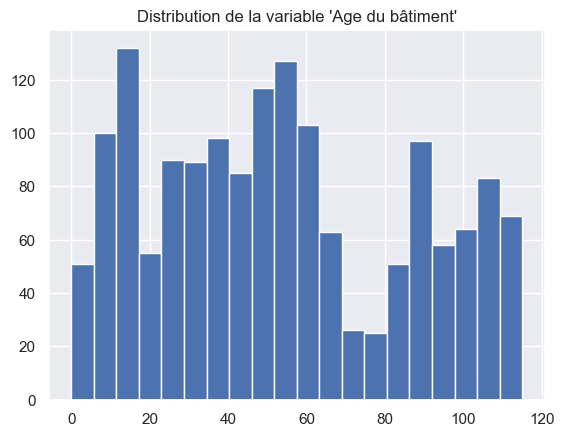

In [88]:
#Observons maintenant sa répartition, avec un histogramme par exemple.
#En fonction de l'analyse bivariée, il faudra probablement distinguer plusieurs classes d'âge.

data.hist(column = 'Age',bins = 20)
plt.title("Distribution de la variable 'Age du bâtiment'")
plt.show()

La répartition semble relativement homogène. Quelques groupes se démarquent. Un groupe de bâtiments "récents" (15 ans ou moins), un groupe de bâtiments "moins récents" (de 20 à 60 ans) et un groupe de bâtiments "datés" (80 ans et plus)

In [89]:
data.drop(columns = "YearBuilt", inplace = True)

### NumberofBuildings



In [90]:
data["NumberofBuildings"].value_counts()

1.0     1533
2.0       14
3.0       12
5.0        7
4.0        4
6.0        4
14.0       2
8.0        2
27.0       1
11.0       1
9.0        1
7.0        1
23.0       1
Name: NumberofBuildings, dtype: int64

(J'ai voulu tracer un pie chart, mais c'était moche car les autres classes que "1" sont trop petites)

L'écrasante majorité des constructions ne possèdent qu'un bâtiment. A mon avis, cette variable n'aura que très peu d'utilité.
Je lui laisse une chance pour l'analyse bivariée, mais je ne suis pas sûr de pouvoir interpréter quoi que ce soit. Il y a de fortes chances pour qu'elle disparaisse simplement.

### NumberofFloors

Déjà vu, mais cela ne coûte pas grand chose d'en reparler ici.

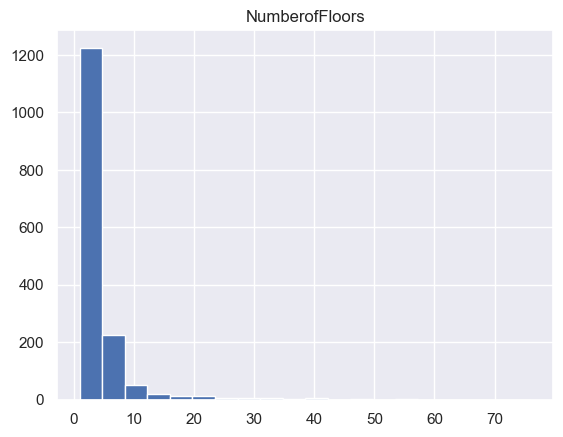

In [91]:
data.hist(column = 'NumberofFloors',bins = 20)
plt.show()

Puisque les bâtiments de plus de 50 étages sont très rares et n'apparaissent pas à l'oeil nu ici, je me permets de resserrer les abscisses.

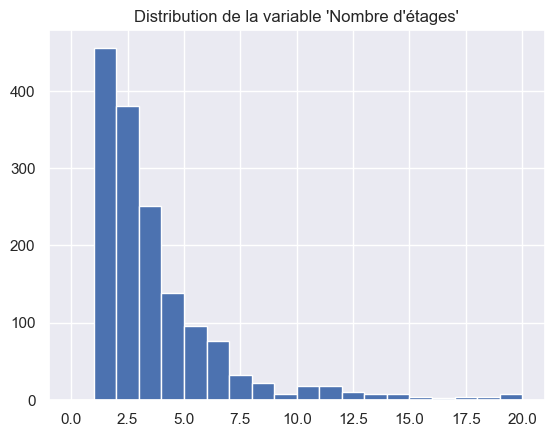

In [92]:
data.hist(column = 'NumberofFloors',bins = 20, range=(0,20))
plt.title("Distribution de la variable 'Nombre d'étages'")
plt.show()

On a une distribution exponentielle. La plupart des bâtiments ont peu d'étages. C'est logique, on a quelques gratte-ciels, mais tous n'ont pas le même nombre d'étages.

### PropertyGFATotal et PropertyGFABuilding(s)

Commençons par simplement demander un histogramme.

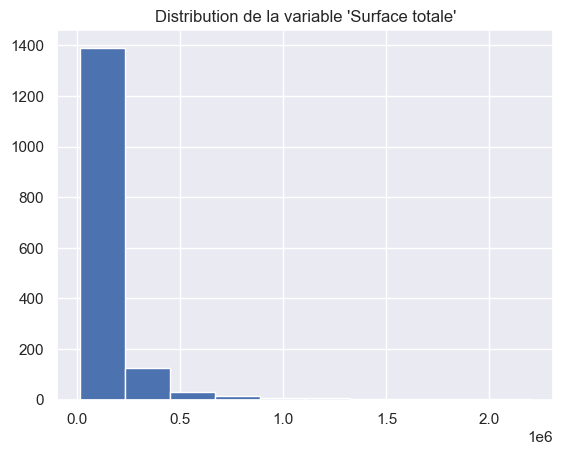

In [93]:
data.hist(column = 'PropertyGFATotal')
plt.title("Distribution de la variable 'Surface totale'")
plt.show()

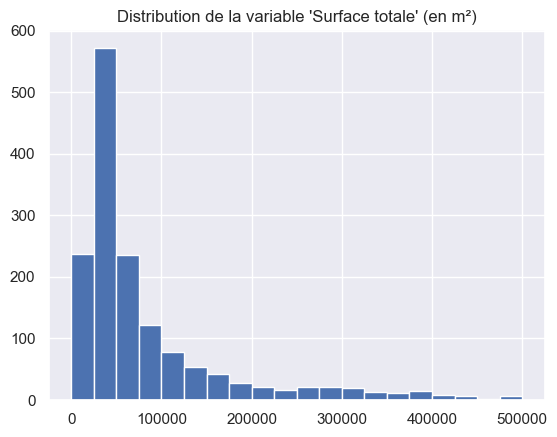

In [94]:
#... Affinons un peu
data.hist(column = 'PropertyGFATotal', bins = 20, range=(0,500000))
plt.title("Distribution de la variable 'Surface totale' (en m²)")
plt.show()

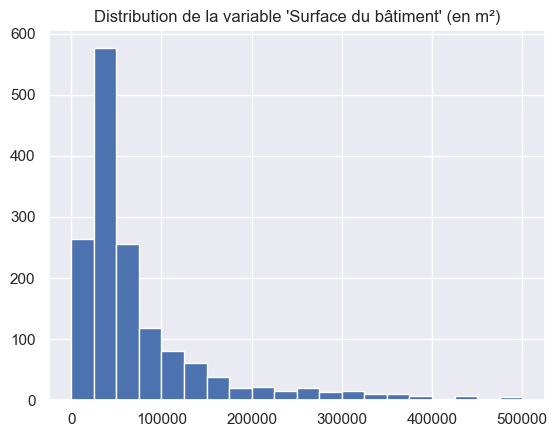

In [95]:
data.hist(column = 'PropertyGFABuilding(s)', bins = 20, range=(0,500000))
plt.title("Distribution de la variable 'Surface du bâtiment' (en m²)")
plt.show()

Honnêtement, la différence n'est PAS frappante. On verra dans la suite s'il est bien nécesaire de conserver ces deux variables, ou bien si une seule des deux est suffisante.

### Energy STAR Score

On n'a pas toutes les valeurs pour ce score, et c'est pertinent puisque l'intitulé de notre problème nous précise qu'il est laborieux à calculer. 

On peut quand même observer sa distribution.

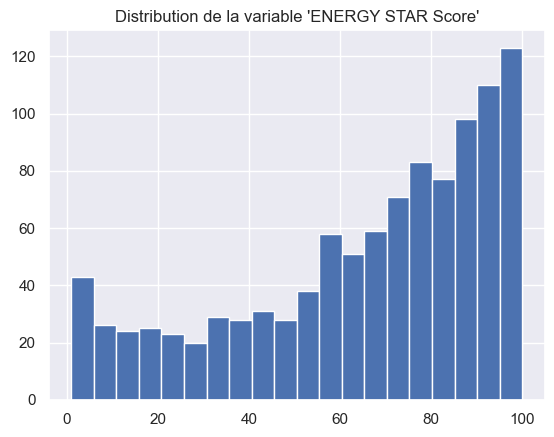

In [96]:
data.hist(column = 'ENERGYSTARScore', bins = 20)
plt.title("Distribution de la variable 'ENERGY STAR Score'")
plt.show()

On a un peu de tout, mais on a tout de même la plupart des valeurs qui sont plutôt élevées. Rappelons les indicateurs statistiques.

In [97]:
data['ENERGYSTARScore'].describe()

count    1045.000000
mean       65.532057
std        28.418469
min         1.000000
25%        48.000000
50%        73.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

Le détail du calcul de ce score est inconnu, mais la médiane est de 73, et comme Q1 vaut 48, cela signifie qu'environ 75% (un peu moins) des valeurs ont un ENERGY STAR Score supérieur à 50.

On essaiera par la suite de constater à quel point ce score est pertinent, et aussi à quel point il nous permet ou non de prédire les émissions.

### Les valeurs cibles (émissions de CO2 et consommation d'énergie)

#### SiteEUIWN(kBtu/sf) et SiteEnergyUseWN(kBtu)

Commençons, peut-être, par le moins lisible (probablement), parce que l'amplitude est plus large.

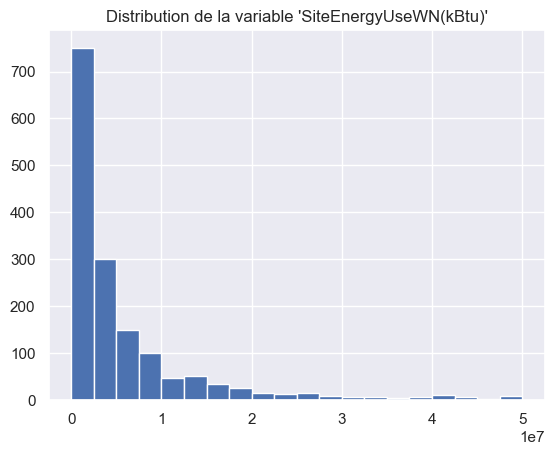

In [98]:
data.hist(column = 'SiteEnergyUseWN(kBtu)', bins = 20, range = (0,50000000))
plt.title("Distribution de la variable 'SiteEnergyUseWN(kBtu)'")
plt.show()

La distribution semble bien exponentielle. 
Je voudrais tester un passage au logarithme, pour voir.

In [99]:
data['logEnergyUse'] = np.log(data['SiteEnergyUseWN(kBtu)'])

In [100]:
data.head()

OSEBuildingID PrimaryPropertyType Neighborhood  NumberofBuildings  \
0              1               Hotel     DOWNTOWN                1.0   
1              2               Hotel     DOWNTOWN                1.0   
2              3               Hotel     DOWNTOWN                1.0   
3              5               Hotel     DOWNTOWN                1.0   
4              8               Hotel     DOWNTOWN                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
0              12             88434                   88434             60.0   
1              11            103566                   88502             61.0   
2              41            956110                  759392             43.0   
3              10             61320                   61320             56.0   
4              18            175580                  113580             75.0   

   SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0           84.300003              7456910.0             249.98   
1           97.900002              8664479.0             295.86   
2           97.699997             73937112.0            2089.28   
3          113.300003              6946800.5             286.43   
4          118.699997             14656503.0             505.01   

   GHGEmissionsIntensity  Age  logEnergyUse  
0                   2.83   88     15.824652  
1                   2.86   19     15.974742  
2                   2.19   46     18.118725  
3                   4.67   89     15.753792  
4                   2.88   35     16.500395

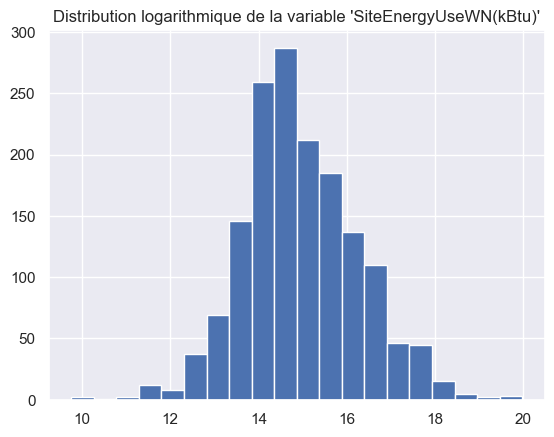

In [101]:
data.hist(column = 'logEnergyUse', bins = 20)
plt.title("Distribution logarithmique de la variable 'SiteEnergyUseWN(kBtu)'")
plt.show()

Cette fois-ci, on observe ce qui s'apparente à une loi normale !

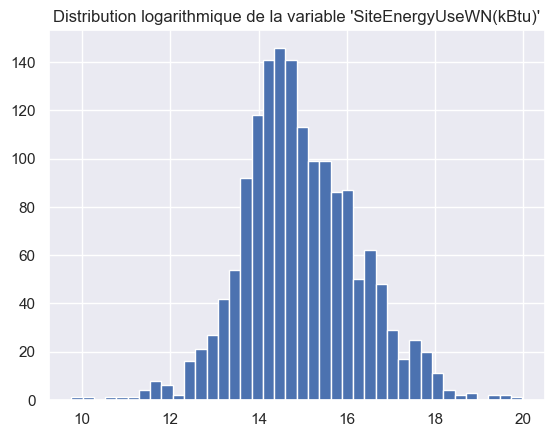

In [102]:
data.hist(column = 'logEnergyUse', bins = 40)
plt.title("Distribution logarithmique de la variable 'SiteEnergyUseWN(kBtu)'")
plt.show()

En affinant, la distribution reste similaire. On a tout de même un penchant vers la gauche, donc pas tout à fait une loi normale, mais la distribution est tout de même plus lisible ainsi qu'avant le passage au log.

#### SiteEUIWN(kBtu/sf)

La même chose, mais par "foot squared" (il faut entre 10 et 11 "foot squared" pour un mètre carré).
Sans passer au log :

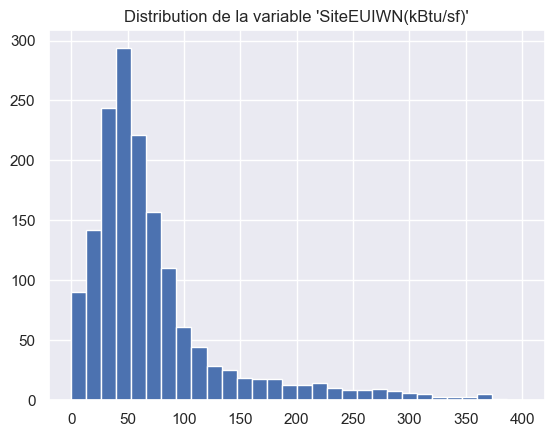

In [103]:
data.hist(column = 'SiteEUIWN(kBtu/sf)', bins = 30, range = (0,400))
plt.title("Distribution de la variable 'SiteEUIWN(kBtu/sf)'")
plt.show()

Cela ressemble un peu à une distribution normale, mais qui ne peut pas "aller plus à gauche" parce que des valeurs négatives n'ont pas de sens. 

#### TotalGHGEmissions

à l'instar de l'énergie, on passera peut-être au logarithme ici.

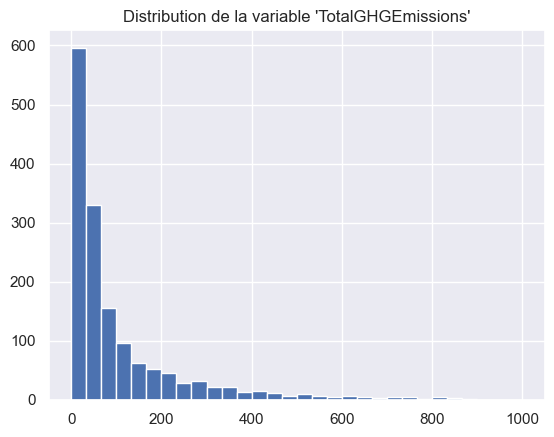

In [104]:
data.hist(column = 'TotalGHGEmissions', bins = 30, range = (0,1000))
plt.title("Distribution de la variable 'TotalGHGEmissions'")
plt.show()

En effet, j'ai dû manipuler l'échelle pour que la distribution soit à peu près lisible, et même comme cela, c'est très exponentiel. Passons au log.

In [105]:
data['logGHG'] = np.log(data['TotalGHGEmissions'])

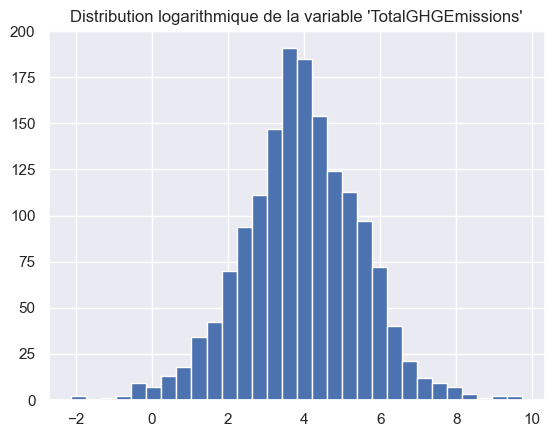

In [106]:
data.hist(column = 'logGHG', bins = 30)
plt.title("Distribution logarithmique de la variable 'TotalGHGEmissions'")
plt.show()

à nouveau, on a une jolie distribution, qui fait penser à une loi normale.

#### GHGEmissionsIntensity

Enfin, dernière variable :

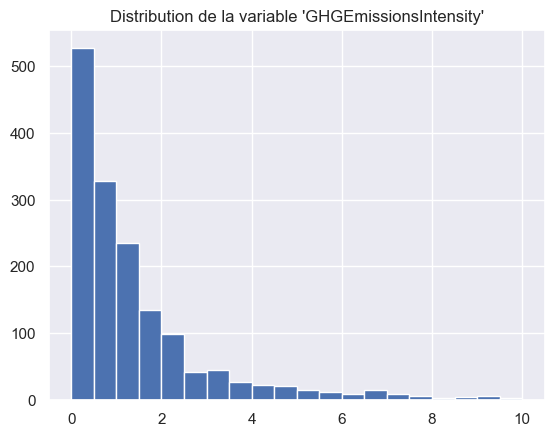

In [107]:
data.hist(column = 'GHGEmissionsIntensity', bins = 20, range = (0,10))
plt.title("Distribution de la variable 'GHGEmissionsIntensity'")
plt.show()

# Analyse bivariée.

## Nuages de points

Commençons par observer quelques nuages de points, pour voir si quelque chose nous frappe.

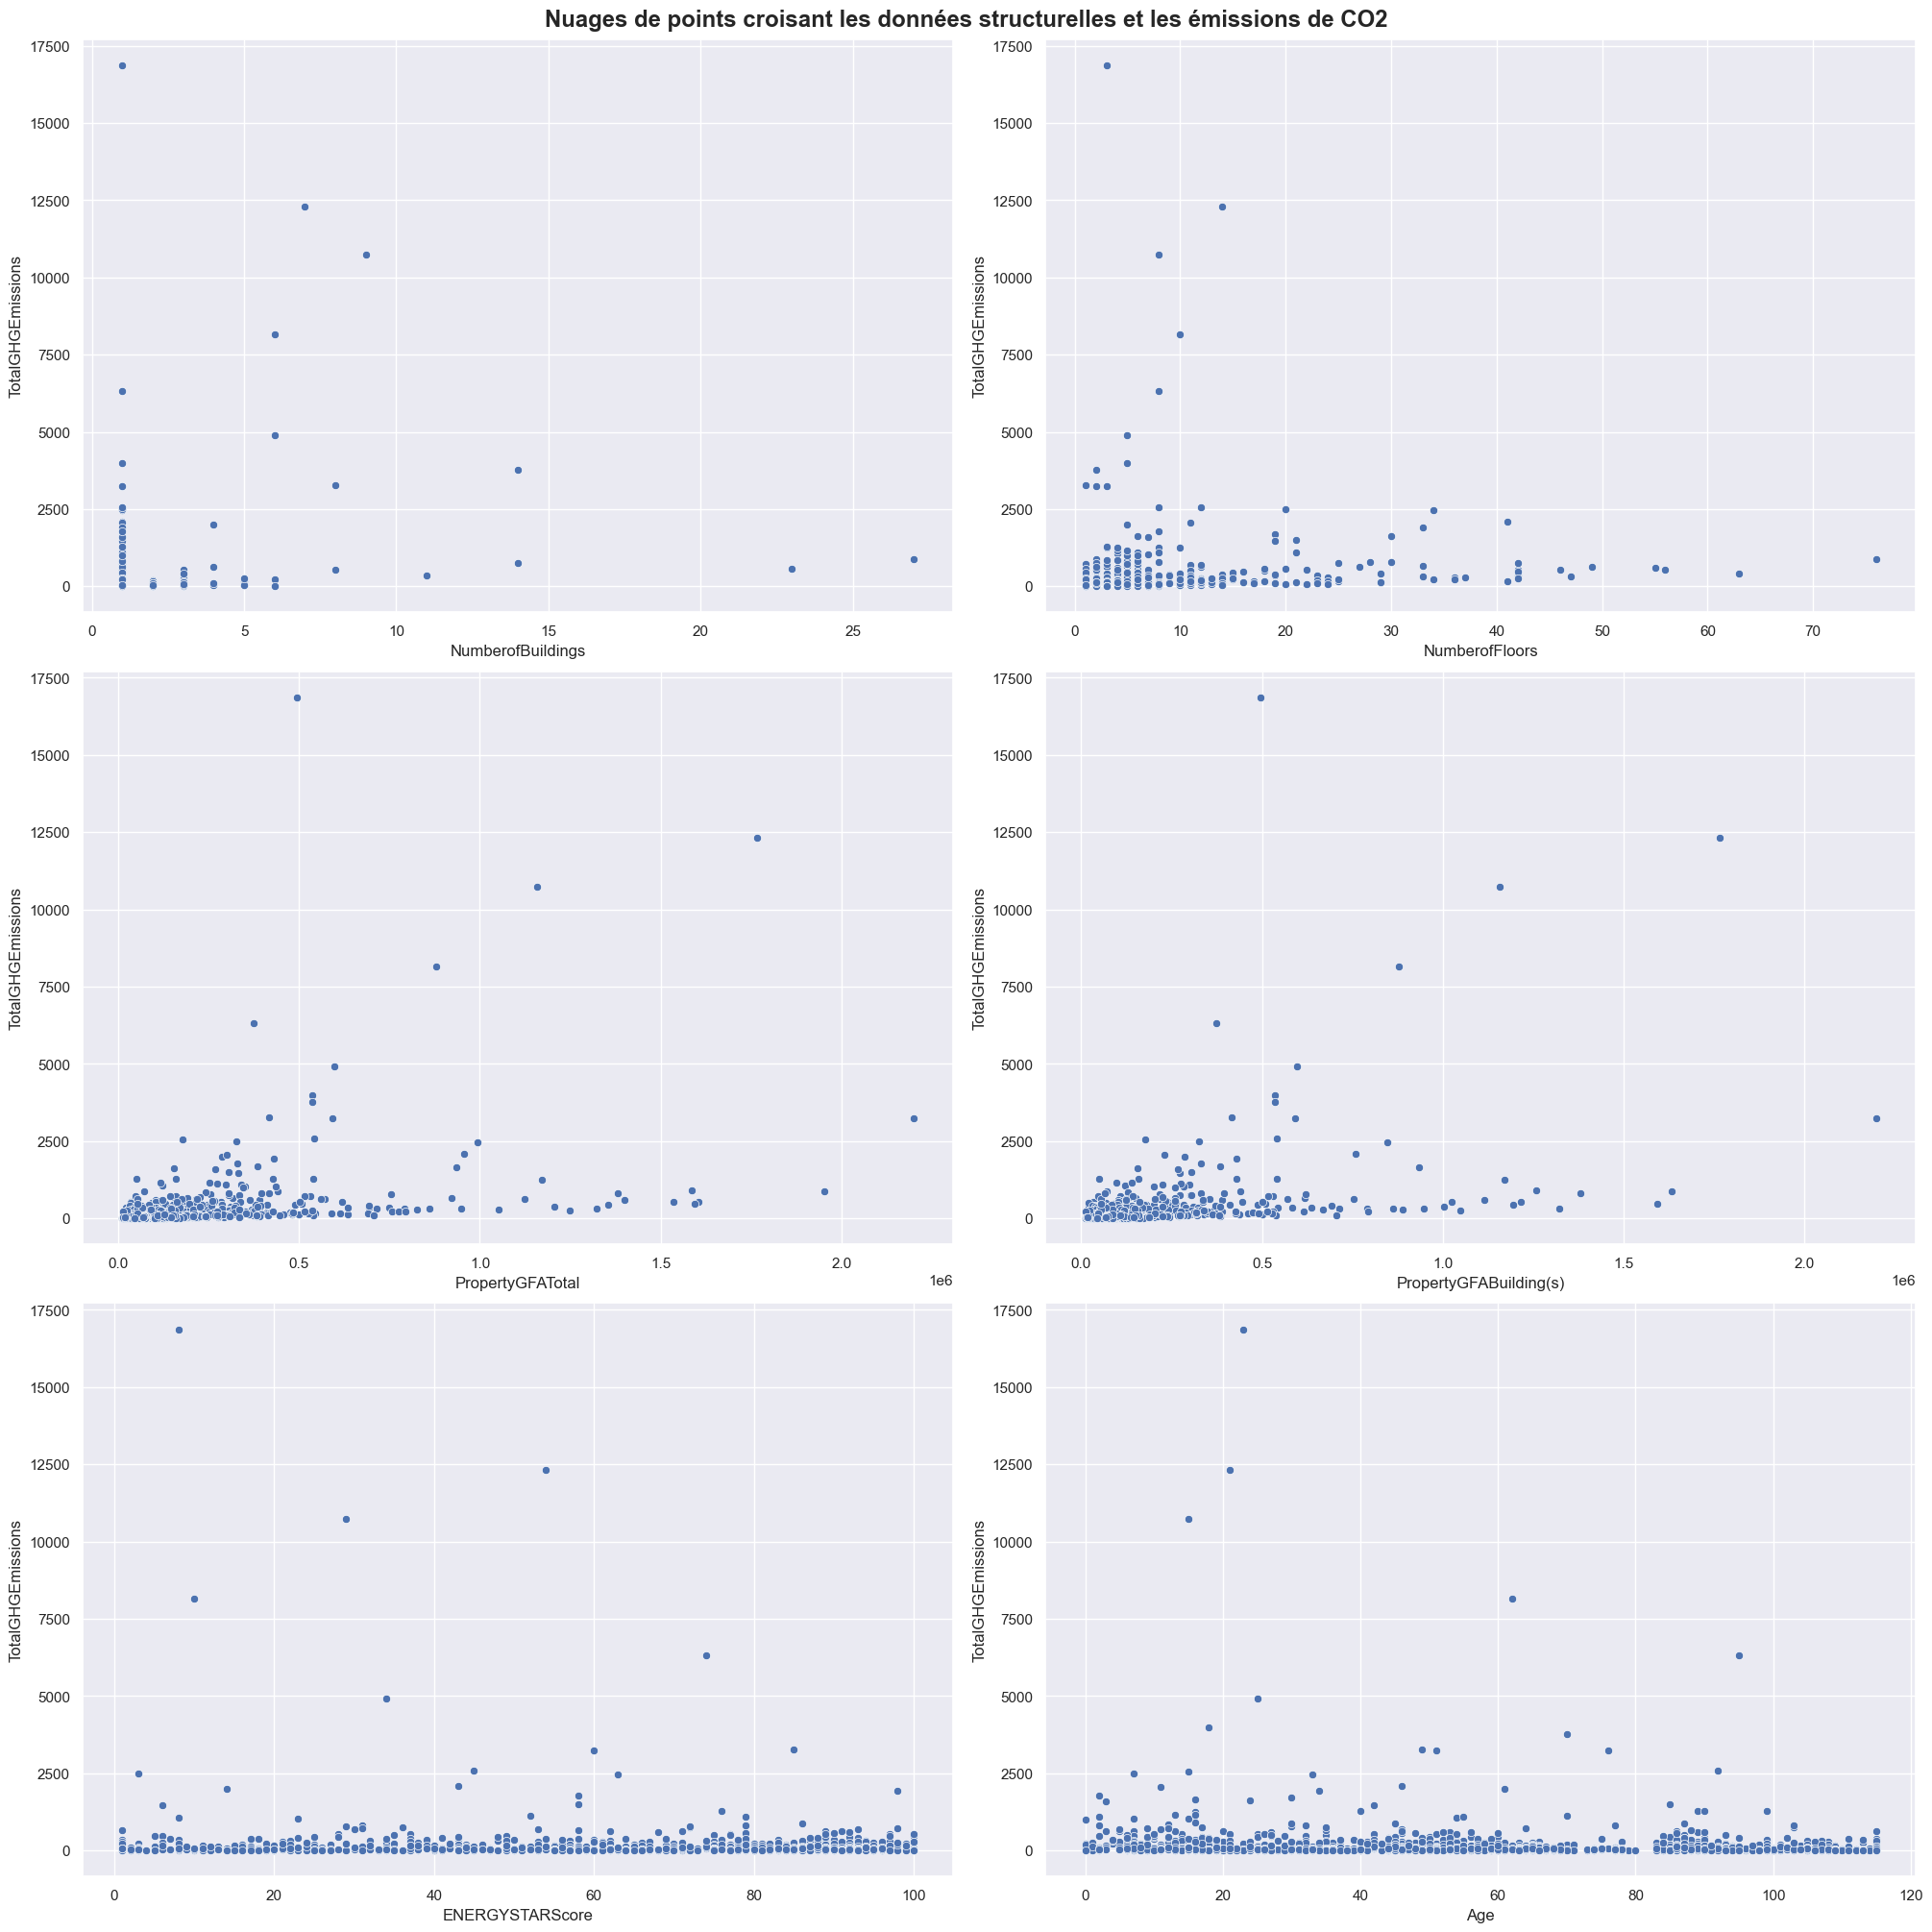

In [108]:
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data,x = 'NumberofBuildings', y = 'TotalGHGEmissions', ax = axis[0,0])
sns.scatterplot(data = data,x = 'NumberofFloors', y = 'TotalGHGEmissions', ax = axis[0,1])
sns.scatterplot(data = data,x = 'PropertyGFATotal', y = 'TotalGHGEmissions', ax = axis[1,0])
sns.scatterplot(data = data,x = 'PropertyGFABuilding(s)', y = 'TotalGHGEmissions', ax = axis[1,1])
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'TotalGHGEmissions', ax = axis[2,0])
sns.scatterplot(data = data,x = 'Age', y = 'TotalGHGEmissions', ax = axis[2,1])
fig.suptitle('Nuages de points croisant les données structurelles et les émissions de CO2',fontweight ="bold", size='x-large')

plt.show()

On pouvait s'y attendre, les valeurs hautes captent l'essentiel de la variance, et le reste du nuage de points semble écrasé.

Testons avec les valeurs logarithmiques.

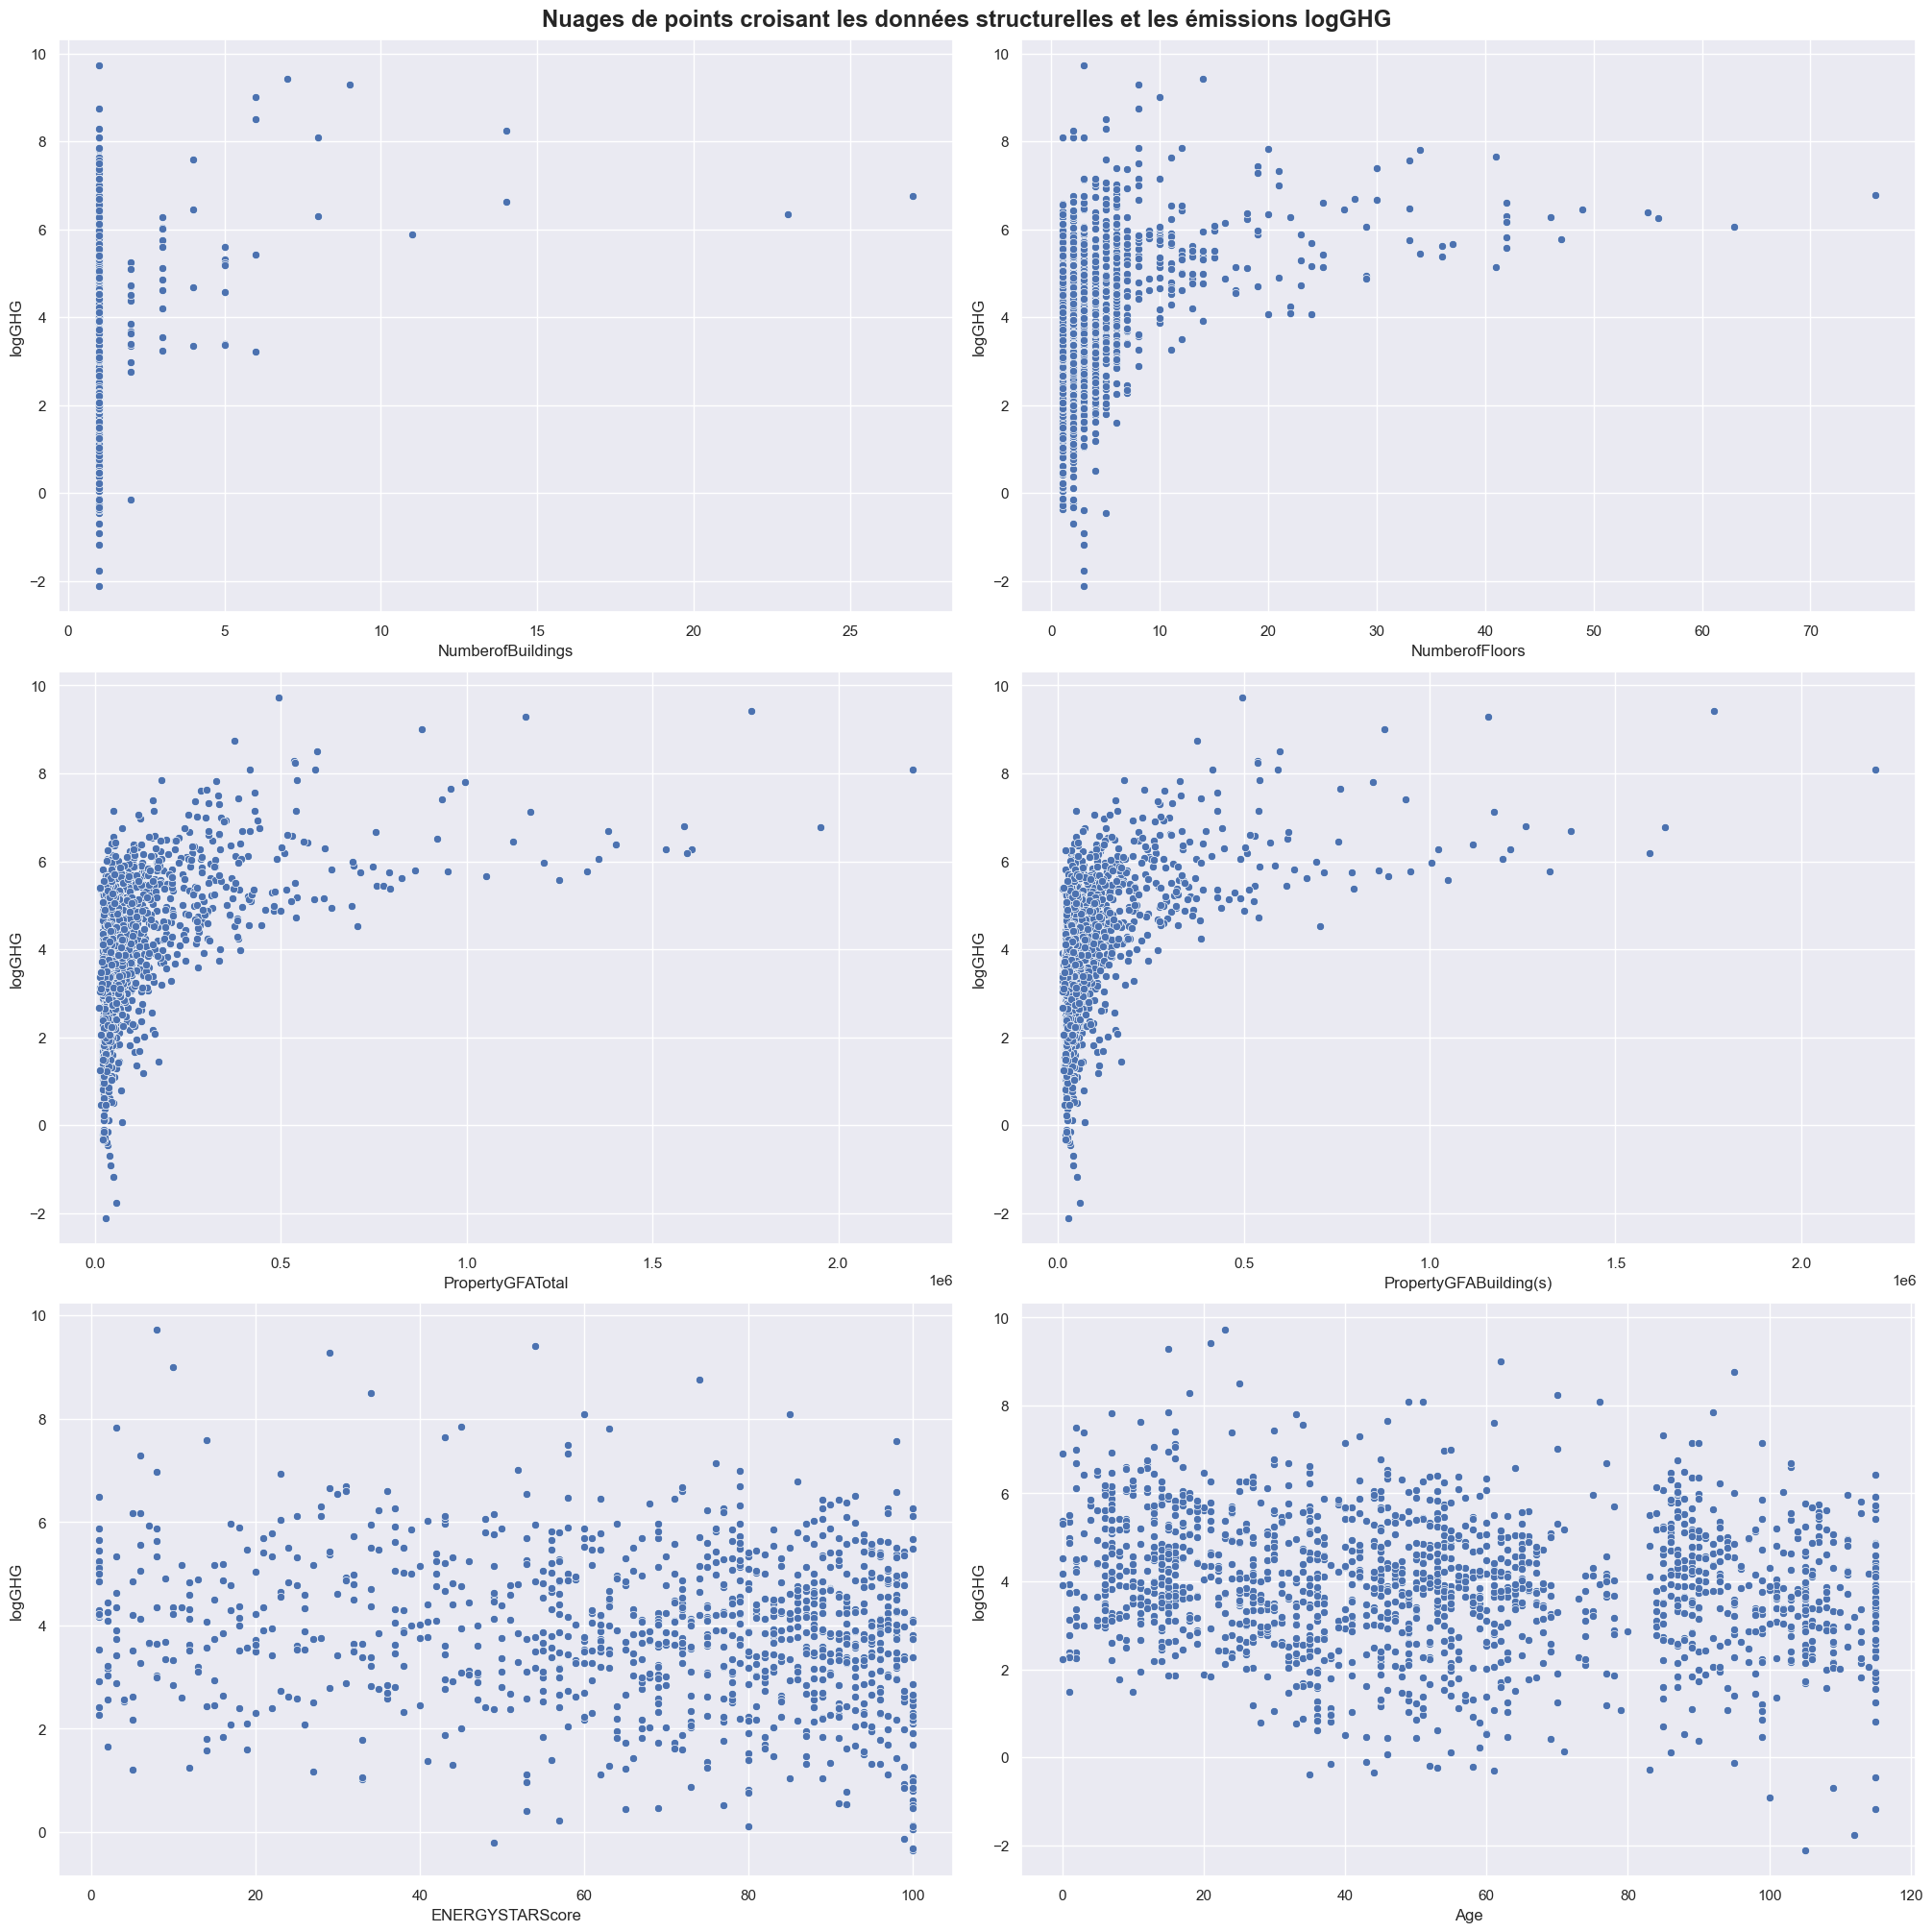

In [109]:
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data,x = 'NumberofBuildings', y = 'logGHG', ax = axis[0,0])
sns.scatterplot(data = data,x = 'NumberofFloors', y = 'logGHG', ax = axis[0,1])
sns.scatterplot(data = data,x = 'PropertyGFATotal', y = 'logGHG', ax = axis[1,0])
sns.scatterplot(data = data,x = 'PropertyGFABuilding(s)', y = 'logGHG', ax = axis[1,1])
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'logGHG', ax = axis[2,0])
sns.scatterplot(data = data,x = 'Age', y = 'logGHG', ax = axis[2,1])
fig.suptitle('Nuages de points croisant les données structurelles et les émissions logGHG',fontweight ="bold", size='x-large')

plt.show()

In [110]:
dataESS = data.loc[~(data['ENERGYSTARScore'].isnull()),:]

In [111]:
dataESS.head()

OSEBuildingID PrimaryPropertyType Neighborhood  NumberofBuildings  \
0              1               Hotel     DOWNTOWN                1.0   
1              2               Hotel     DOWNTOWN                1.0   
2              3               Hotel     DOWNTOWN                1.0   
3              5               Hotel     DOWNTOWN                1.0   
4              8               Hotel     DOWNTOWN                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFABuilding(s)  ENERGYSTARScore  \
0              12             88434                   88434             60.0   
1              11            103566                   88502             61.0   
2              41            956110                  759392             43.0   
3              10             61320                   61320             56.0   
4              18            175580                  113580             75.0   

   SiteEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
0           84.300003              7456910.0             249.98   
1           97.900002              8664479.0             295.86   
2           97.699997             73937112.0            2089.28   
3          113.300003              6946800.5             286.43   
4          118.699997             14656503.0             505.01   

   GHGEmissionsIntensity  Age  logEnergyUse    logGHG  
0                   2.83   88     15.824652  5.521381  
1                   2.86   19     15.974742  5.689886  
2                   2.19   46     18.118725  7.644575  
3                   4.67   89     15.753792  5.657494  
4                   2.88   35     16.500395  6.224578

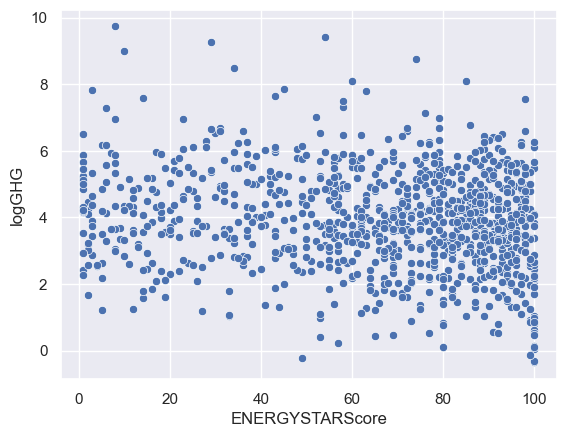

In [112]:
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'logGHG')
plt.show()

A première vue,je ne vois pas de corrélations évidentes.

Essayons en restreignant les valeurs fortes.

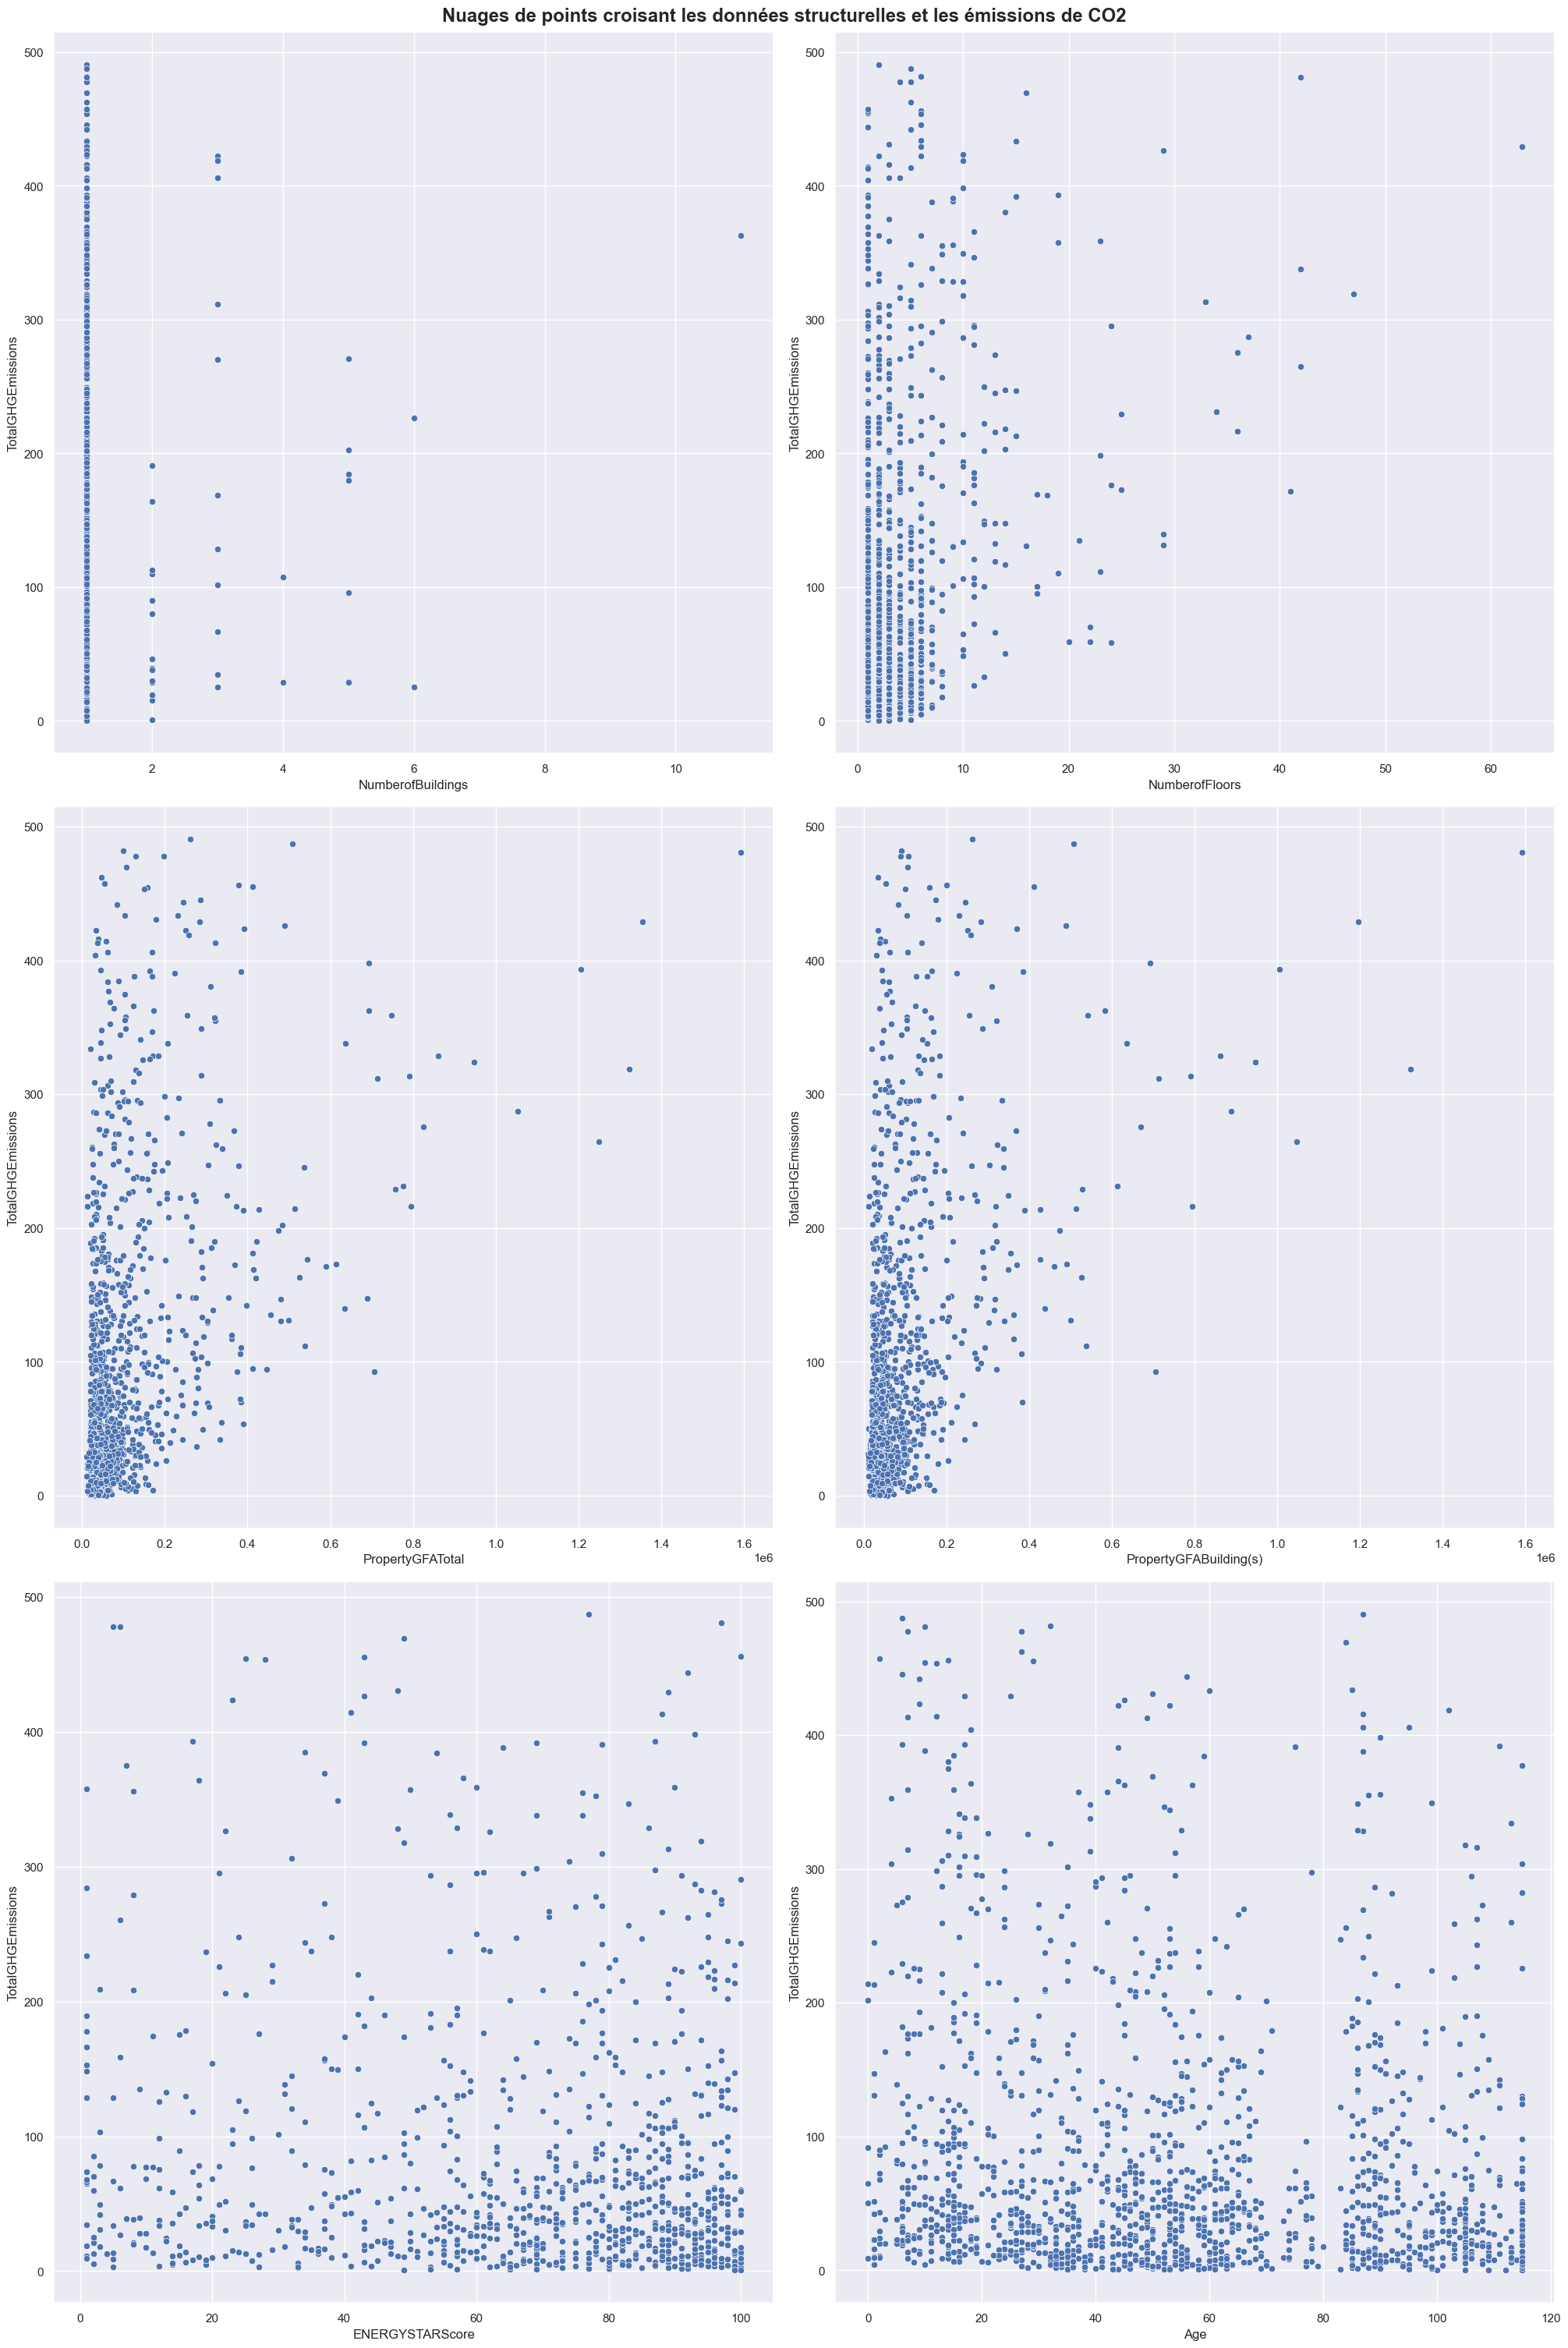

In [113]:
fig, axis = plt.subplots(3,2, figsize = (20,30),layout="constrained")

sns.scatterplot(data = data.loc[data["TotalGHGEmissions"] < 500,:],x = 'NumberofBuildings', y = 'TotalGHGEmissions', ax = axis[0,0])
sns.scatterplot(data = data.loc[data["TotalGHGEmissions"] < 500,:],x = 'NumberofFloors', y = 'TotalGHGEmissions', ax = axis[0,1])
sns.scatterplot(data = data.loc[data["TotalGHGEmissions"] < 500,:].loc[data["TotalGHGEmissions"] < 3000,:],x = 'PropertyGFATotal', y = 'TotalGHGEmissions', ax = axis[1,0])
sns.scatterplot(data = data.loc[data["TotalGHGEmissions"] < 500,:],x = 'PropertyGFABuilding(s)', y = 'TotalGHGEmissions', ax = axis[1,1])
sns.scatterplot(data = data.loc[data["TotalGHGEmissions"] < 500,:],x = 'ENERGYSTARScore', y = 'TotalGHGEmissions', ax = axis[2,0])
sns.scatterplot(data = data.loc[data["TotalGHGEmissions"] < 500,:],x = 'Age', y = 'TotalGHGEmissions', ax = axis[2,1])
fig.suptitle('Nuages de points croisant les données structurelles et les émissions de CO2',fontweight ="bold", size='x-large')

plt.show()

J'ai également essayé avec un seuil à 3000. Dans tous les cas, aucune corrélation n'apparaît avec évidence, et on n'observe pas vraiment de clusters non plus.

Essayons avec l'intensité.

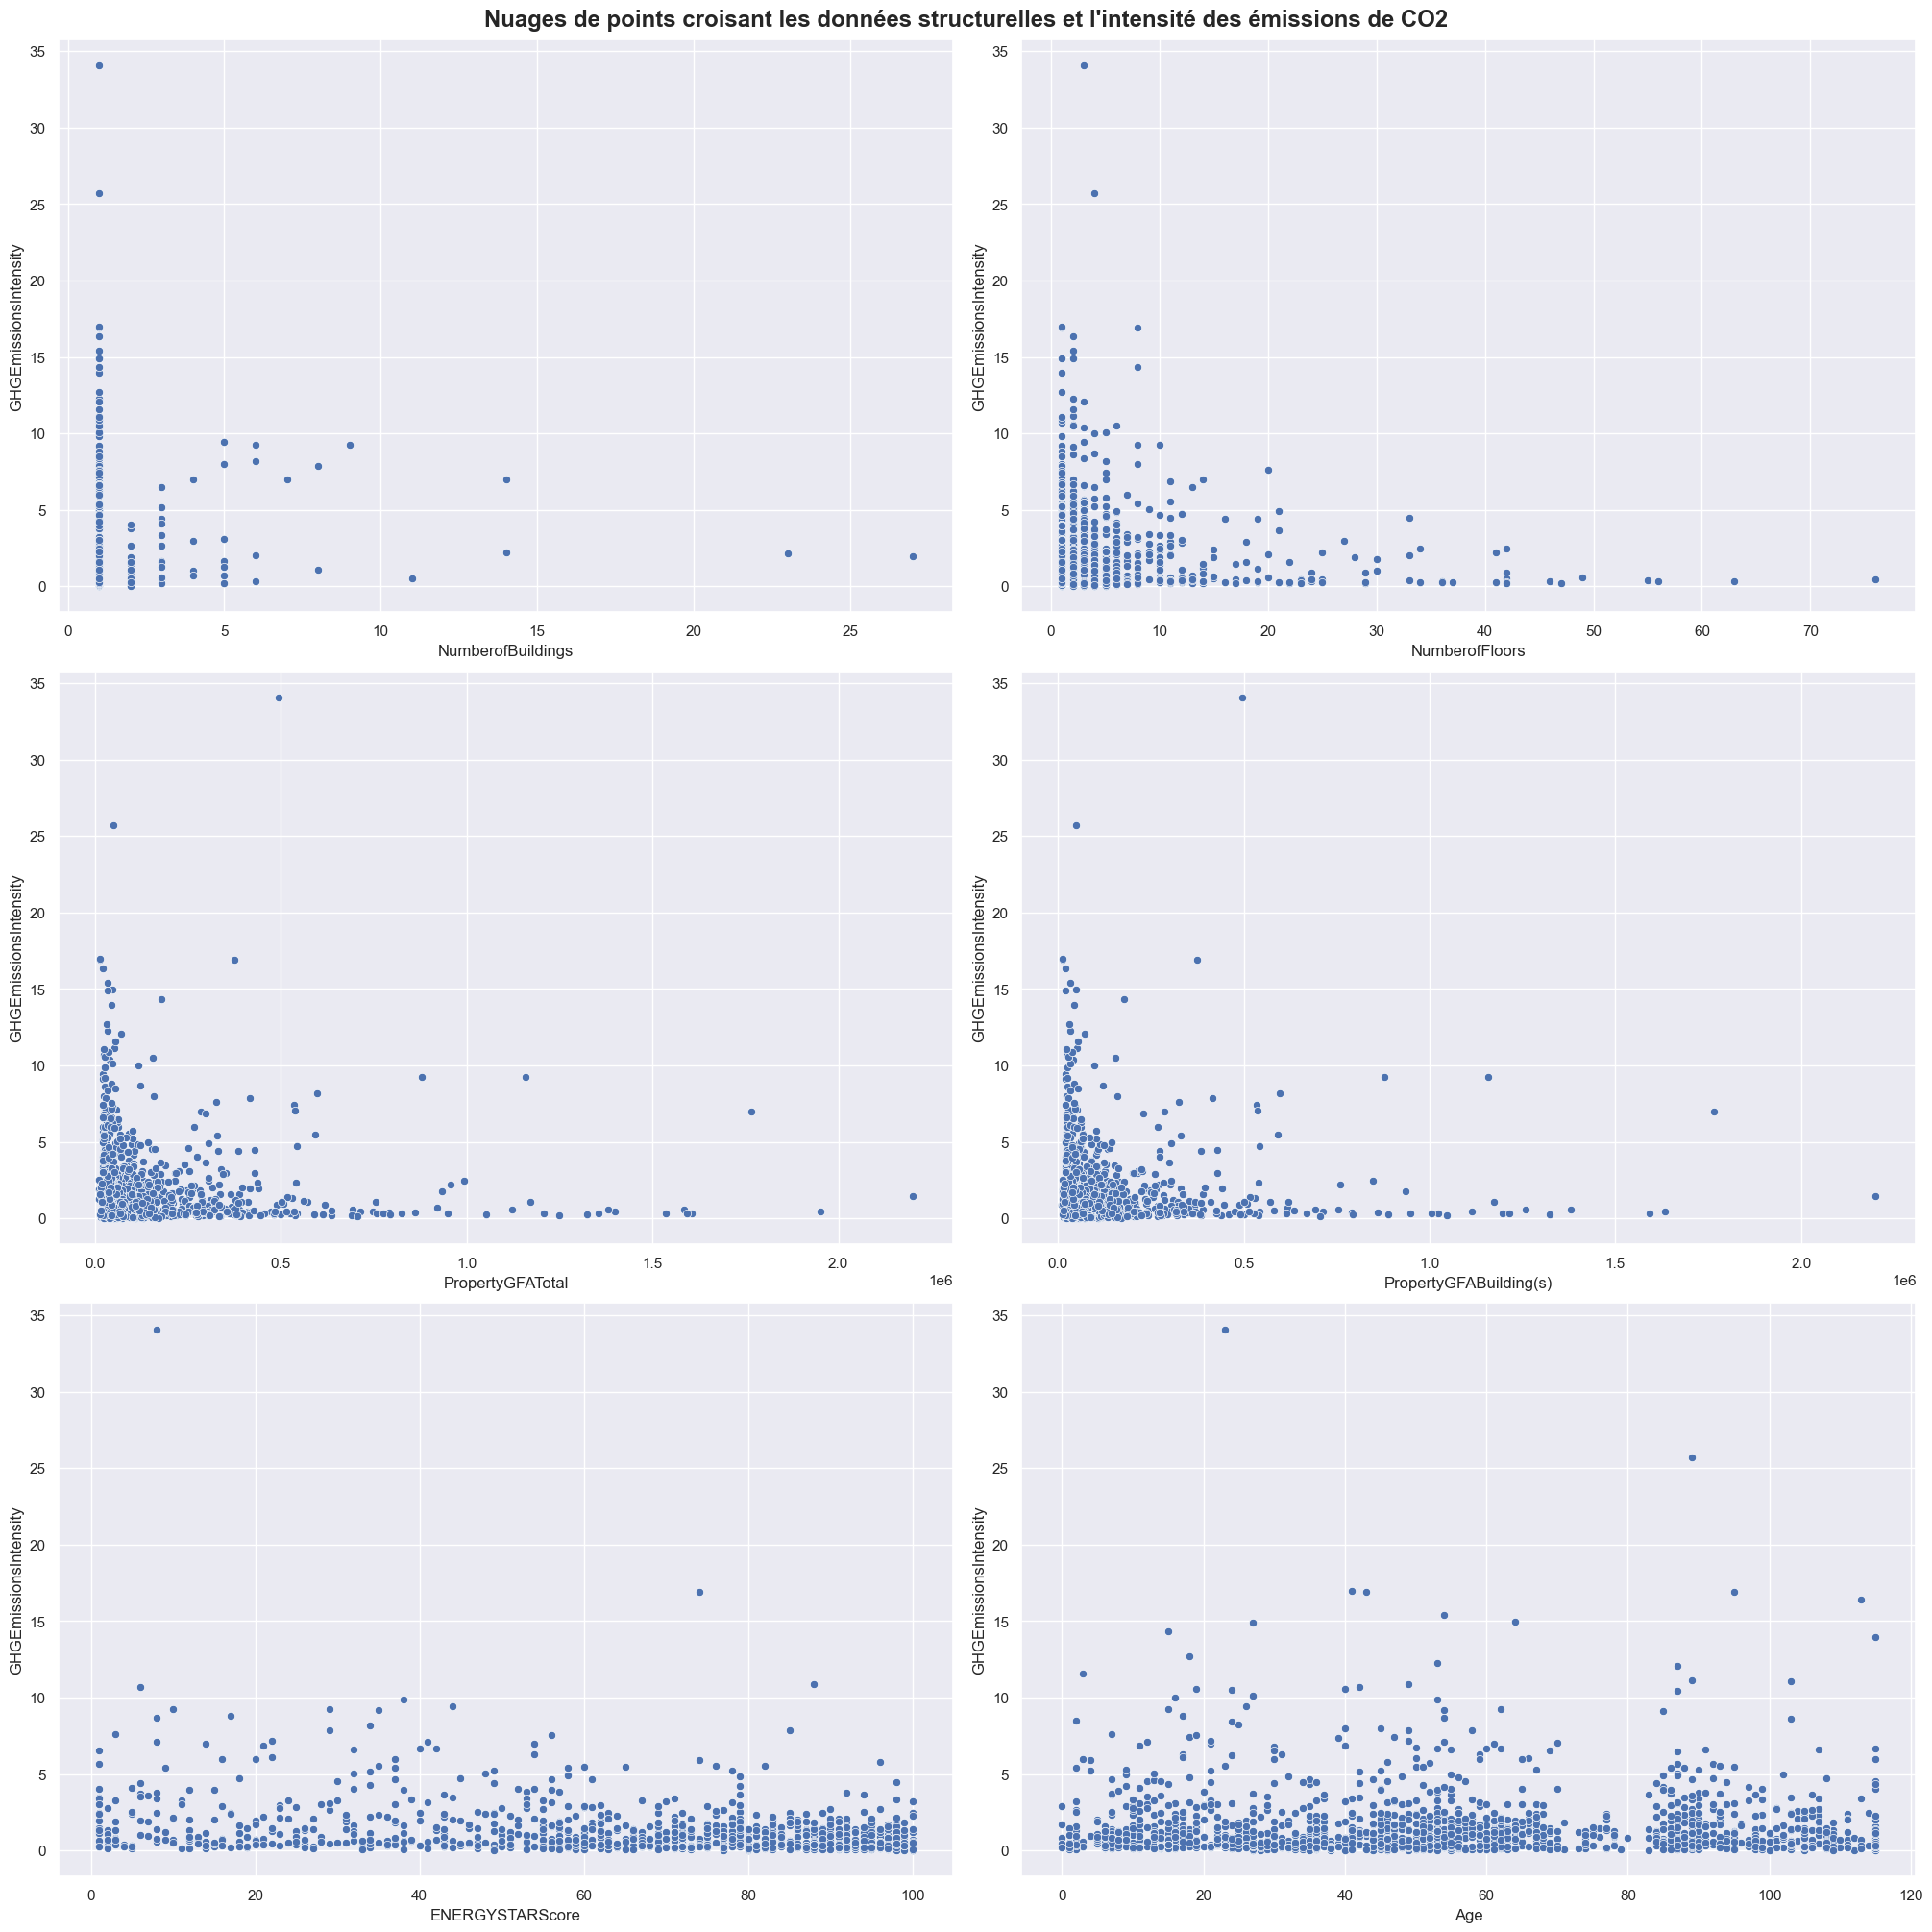

In [114]:
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data,x = 'NumberofBuildings', y = 'GHGEmissionsIntensity', ax = axis[0,0])
sns.scatterplot(data = data,x = 'NumberofFloors', y = 'GHGEmissionsIntensity', ax = axis[0,1])
sns.scatterplot(data = data,x = 'PropertyGFATotal', y = 'GHGEmissionsIntensity', ax = axis[1,0])
sns.scatterplot(data = data,x = 'PropertyGFABuilding(s)', y = 'GHGEmissionsIntensity', ax = axis[1,1])
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'GHGEmissionsIntensity', ax = axis[2,0])
sns.scatterplot(data = data,x = 'Age', y = 'GHGEmissionsIntensity', ax = axis[2,1])
fig.suptitle("Nuages de points croisant les données structurelles et l'intensité des émissions de CO2",fontweight ="bold", size='x-large')

plt.show()

Encore une fois, c'est peu concluant.
Essayons à peu près les mêmes choses avec l'énergie maintenant.

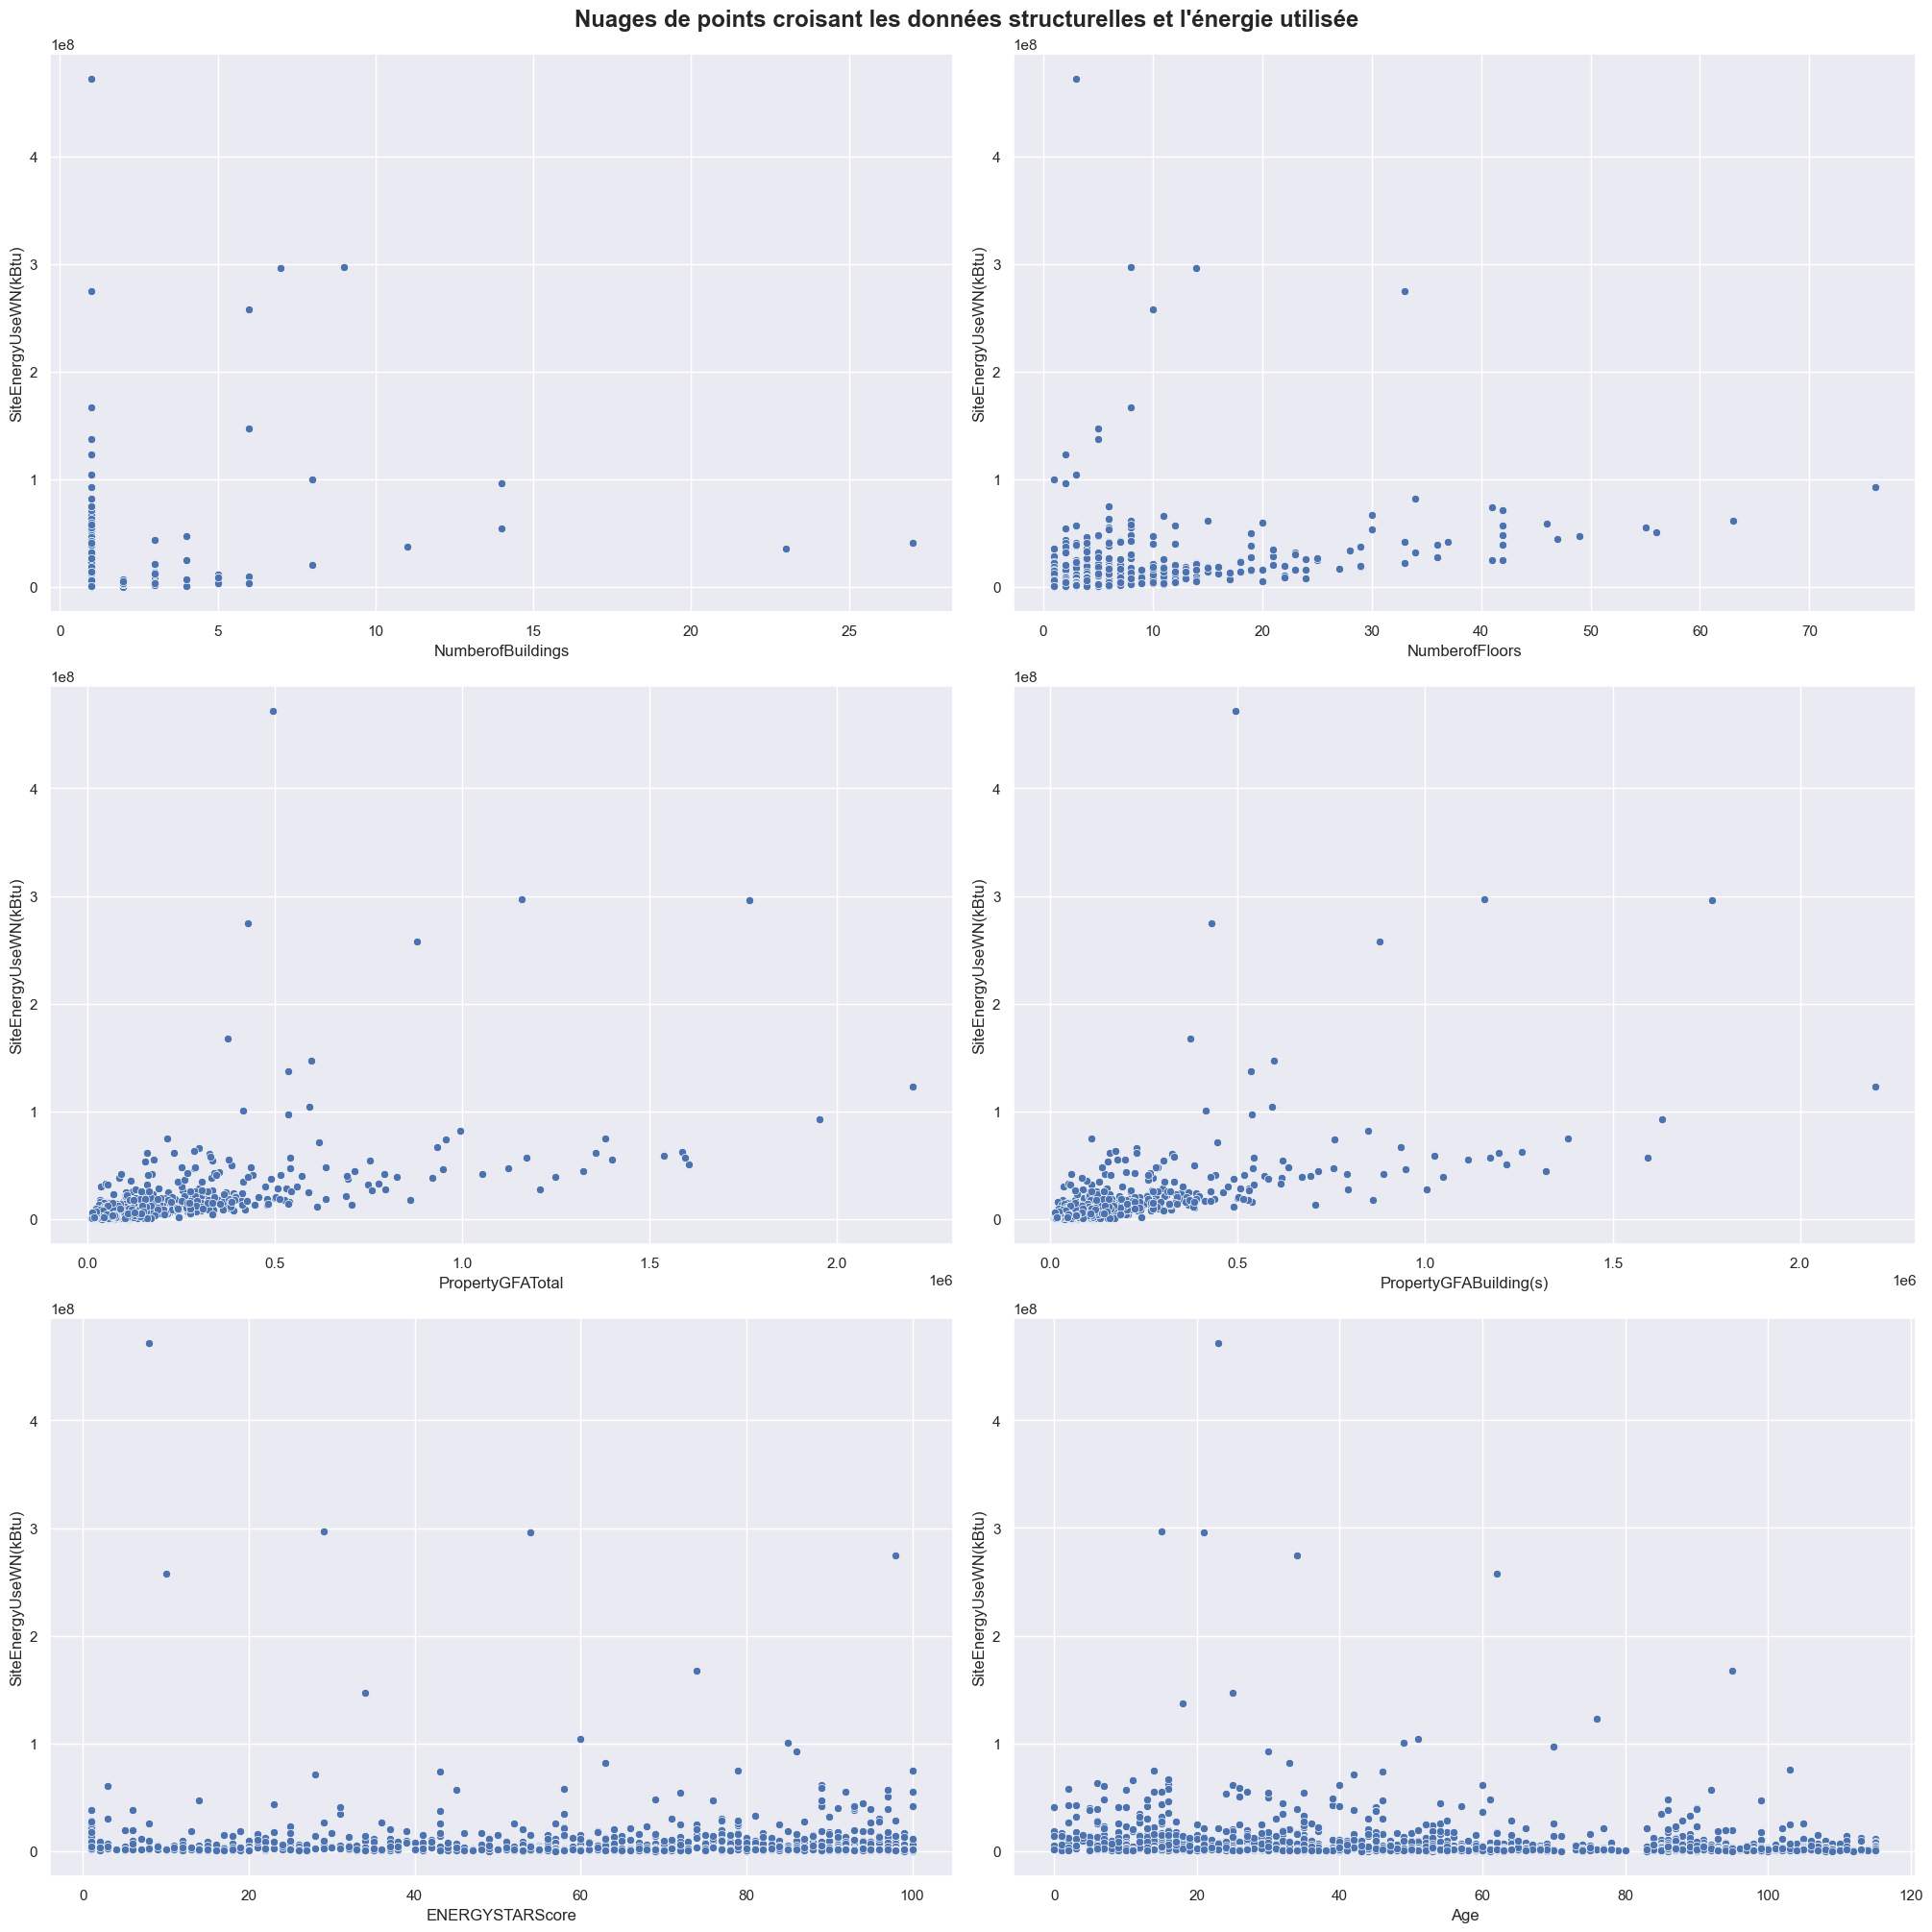

In [115]:
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data,x = 'NumberofBuildings', y = 'SiteEnergyUseWN(kBtu)', ax = axis[0,0])
sns.scatterplot(data = data,x = 'NumberofFloors', y = 'SiteEnergyUseWN(kBtu)', ax = axis[0,1])
sns.scatterplot(data = data,x = 'PropertyGFATotal', y = 'SiteEnergyUseWN(kBtu)', ax = axis[1,0])
sns.scatterplot(data = data,x = 'PropertyGFABuilding(s)', y = 'SiteEnergyUseWN(kBtu)', ax = axis[1,1])
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'SiteEnergyUseWN(kBtu)', ax = axis[2,0])
sns.scatterplot(data = data,x = 'Age', y = 'SiteEnergyUseWN(kBtu)', ax = axis[2,1])
fig.suptitle("Nuages de points croisant les données structurelles et l'énergie utilisée",fontweight ="bold", size='x-large')

plt.show()

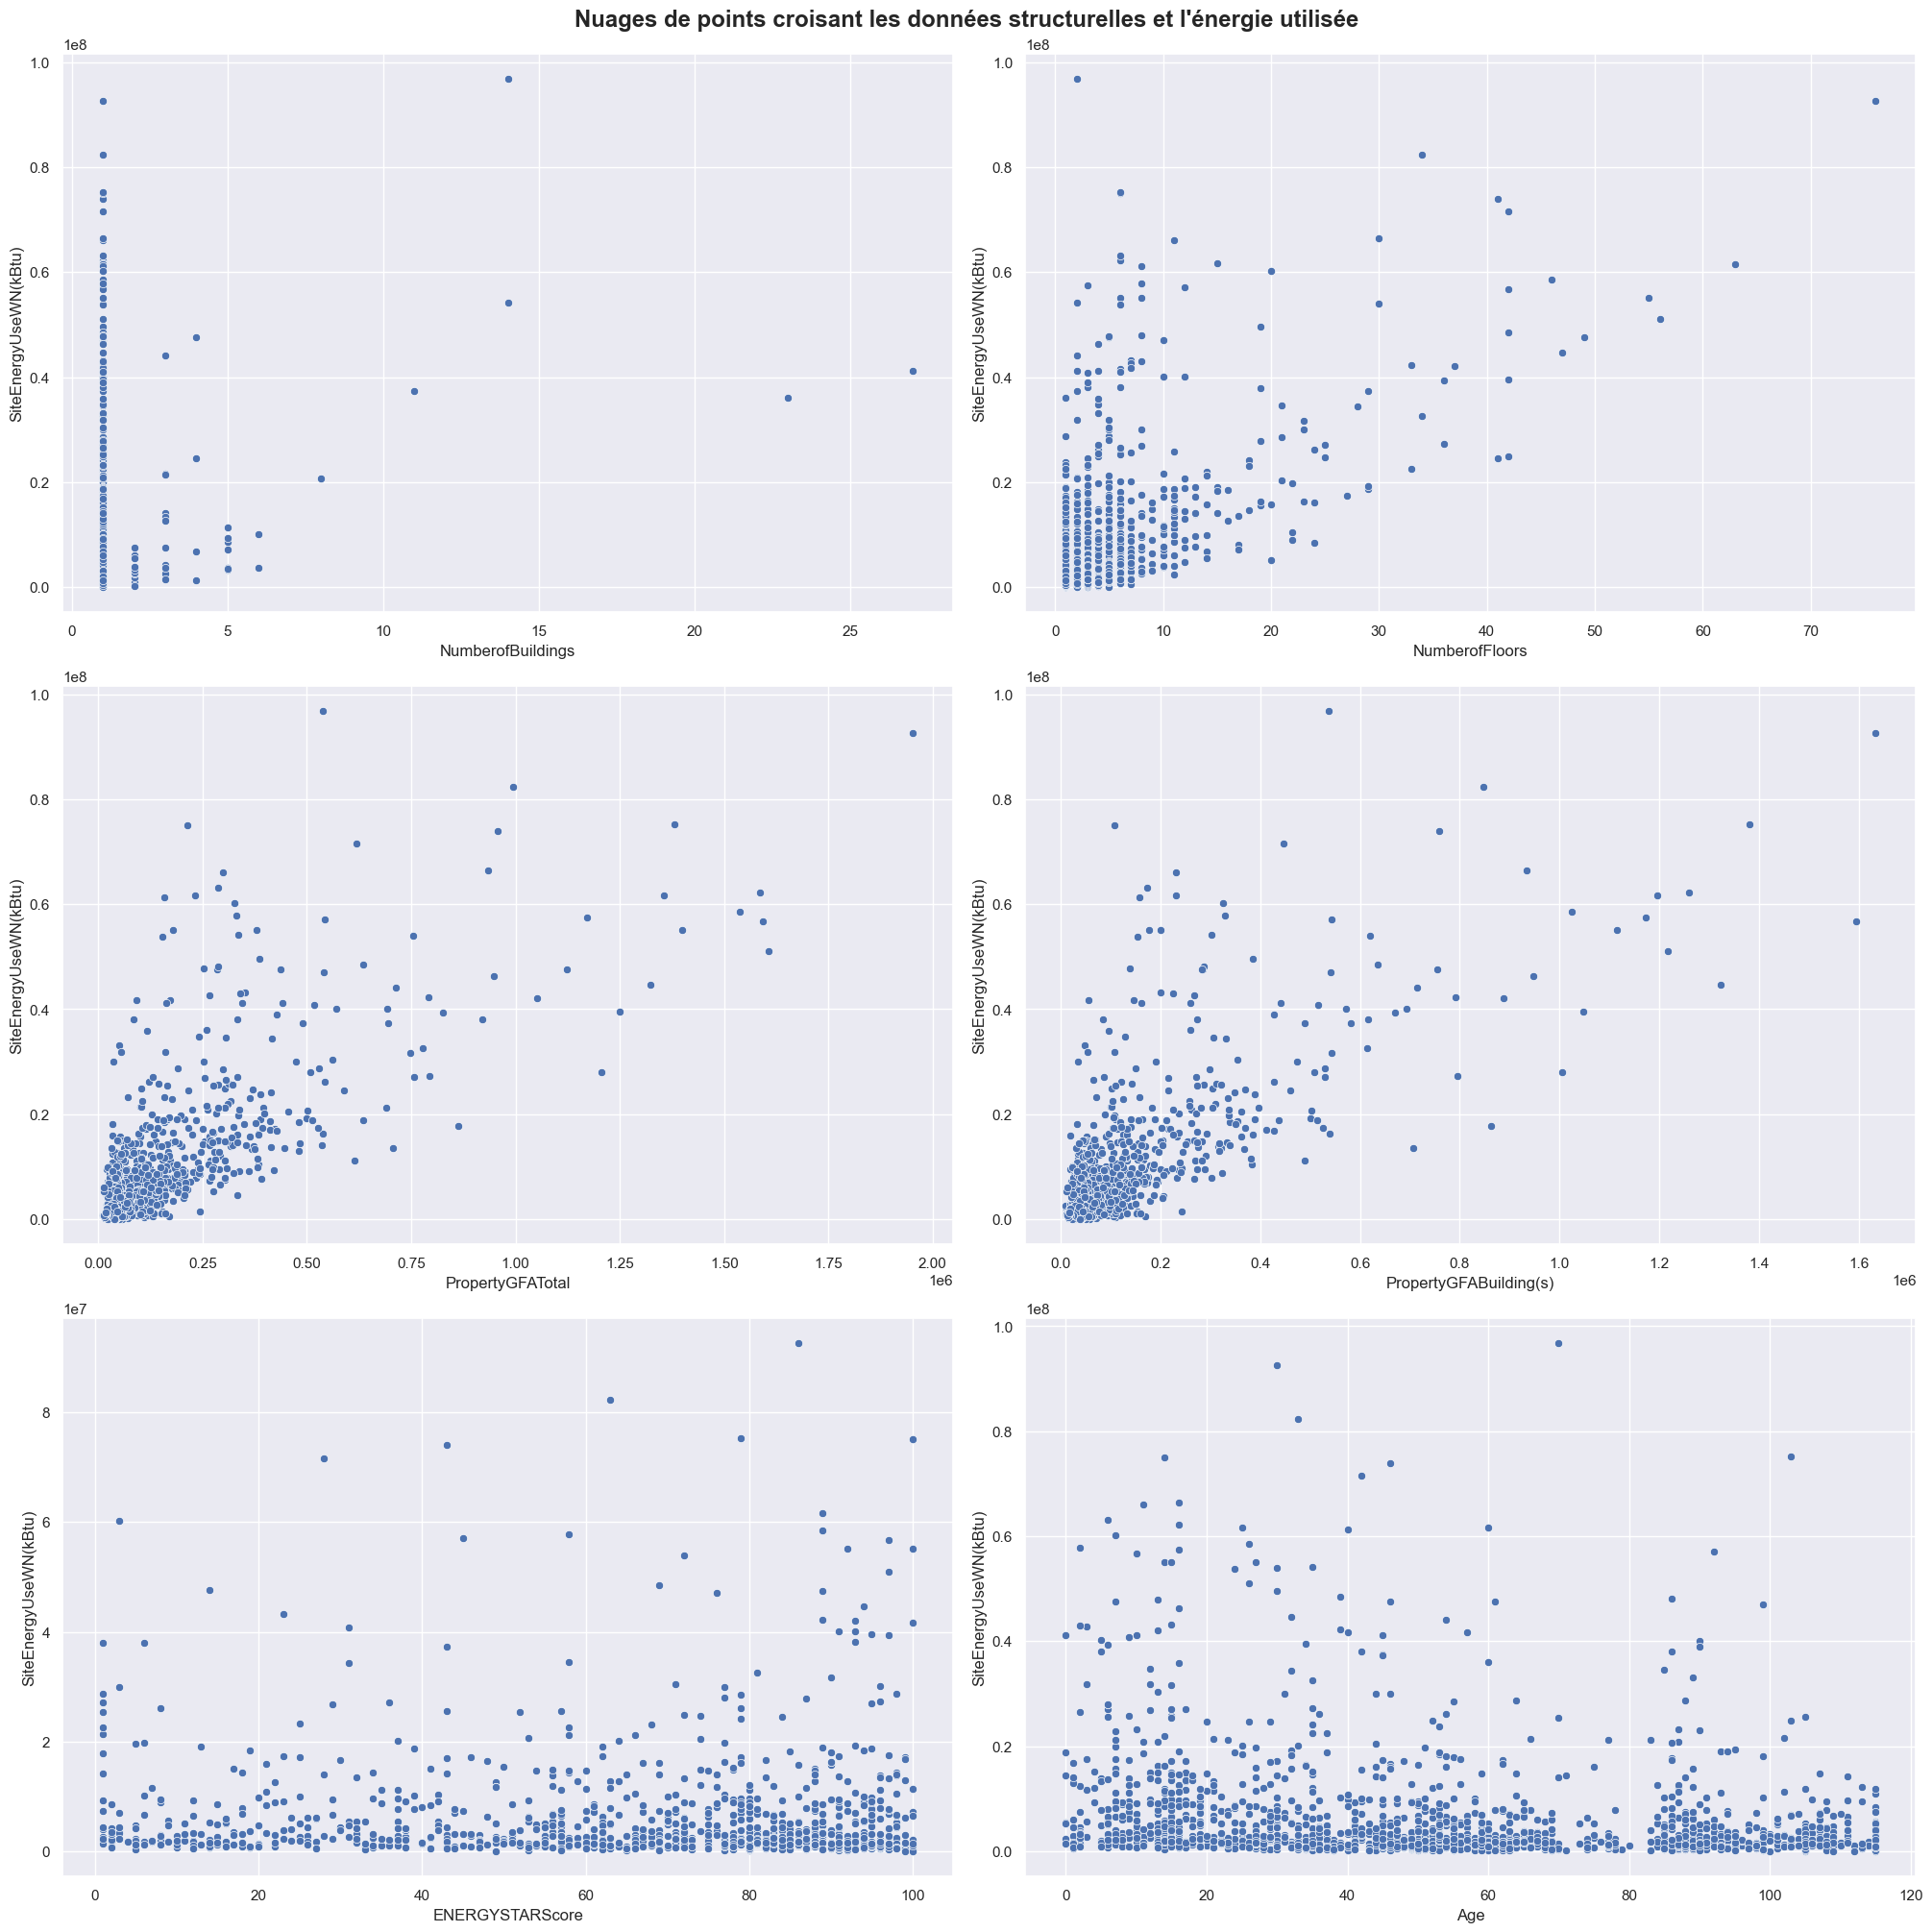

In [116]:
#Maintenant, version restreinte
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data.loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:],x = 'NumberofBuildings', y = 'SiteEnergyUseWN(kBtu)', ax = axis[0,0])
sns.scatterplot(data = data.loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:].loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:],x = 'NumberofFloors', y = 'SiteEnergyUseWN(kBtu)', ax = axis[0,1])
sns.scatterplot(data = data.loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:],x = 'PropertyGFATotal', y = 'SiteEnergyUseWN(kBtu)', ax = axis[1,0])
sns.scatterplot(data = data.loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:],x = 'PropertyGFABuilding(s)', y = 'SiteEnergyUseWN(kBtu)', ax = axis[1,1])
sns.scatterplot(data = data.loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:],x = 'ENERGYSTARScore', y = 'SiteEnergyUseWN(kBtu)', ax = axis[2,0])
sns.scatterplot(data = data.loc[data['SiteEnergyUseWN(kBtu)'] < 100000000,:],x = 'Age', y = 'SiteEnergyUseWN(kBtu)', ax = axis[2,1])
fig.suptitle("Nuages de points croisant les données structurelles et l'énergie utilisée",fontweight ="bold", size='x-large')

plt.show()

On observe, cette fois-ci, une tendance à augmenter vaguement linéaire. Le principal problème est que la plupart des données sont situées en bas à gauche de nos nuages de points.

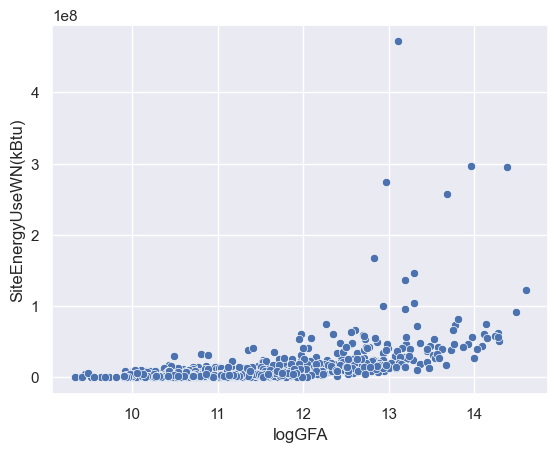

In [117]:
data['logGFA']=np.log(data['PropertyGFATotal']) #Juste un test, comme ça
sns.scatterplot(data = data,x = 'logGFA', y = 'SiteEnergyUseWN(kBtu)')
plt.show()

Intéressant... Creusons

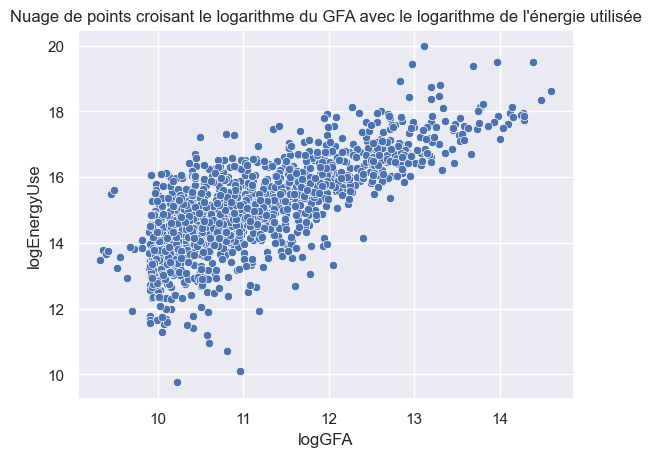

In [118]:
data['logGFA']=np.log(data['PropertyGFATotal']) #Juste un test, comme ça
sns.scatterplot(data = data,x = 'logGFA', y = 'logEnergyUse')
plt.title("Nuage de points croisant le logarithme du GFA avec le logarithme de l'énergie utilisée")
plt.show()

Ici, la régression linéaire ne me paraît plus très loin...

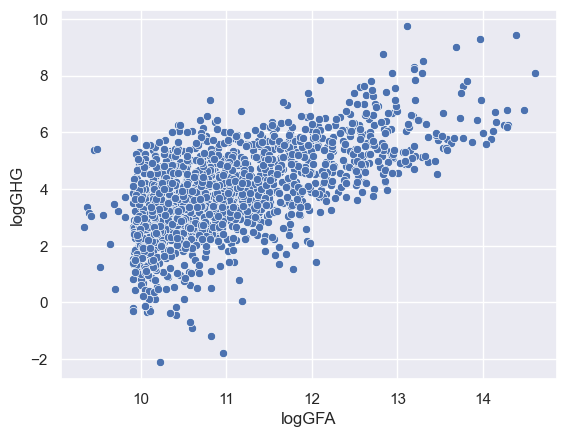

In [119]:
data['logGFA']=np.log(data['PropertyGFATotal']) #Juste un test, comme ça
sns.scatterplot(data = data,x = 'logGFA', y = 'logGHG')
plt.show()

Ici non plus !

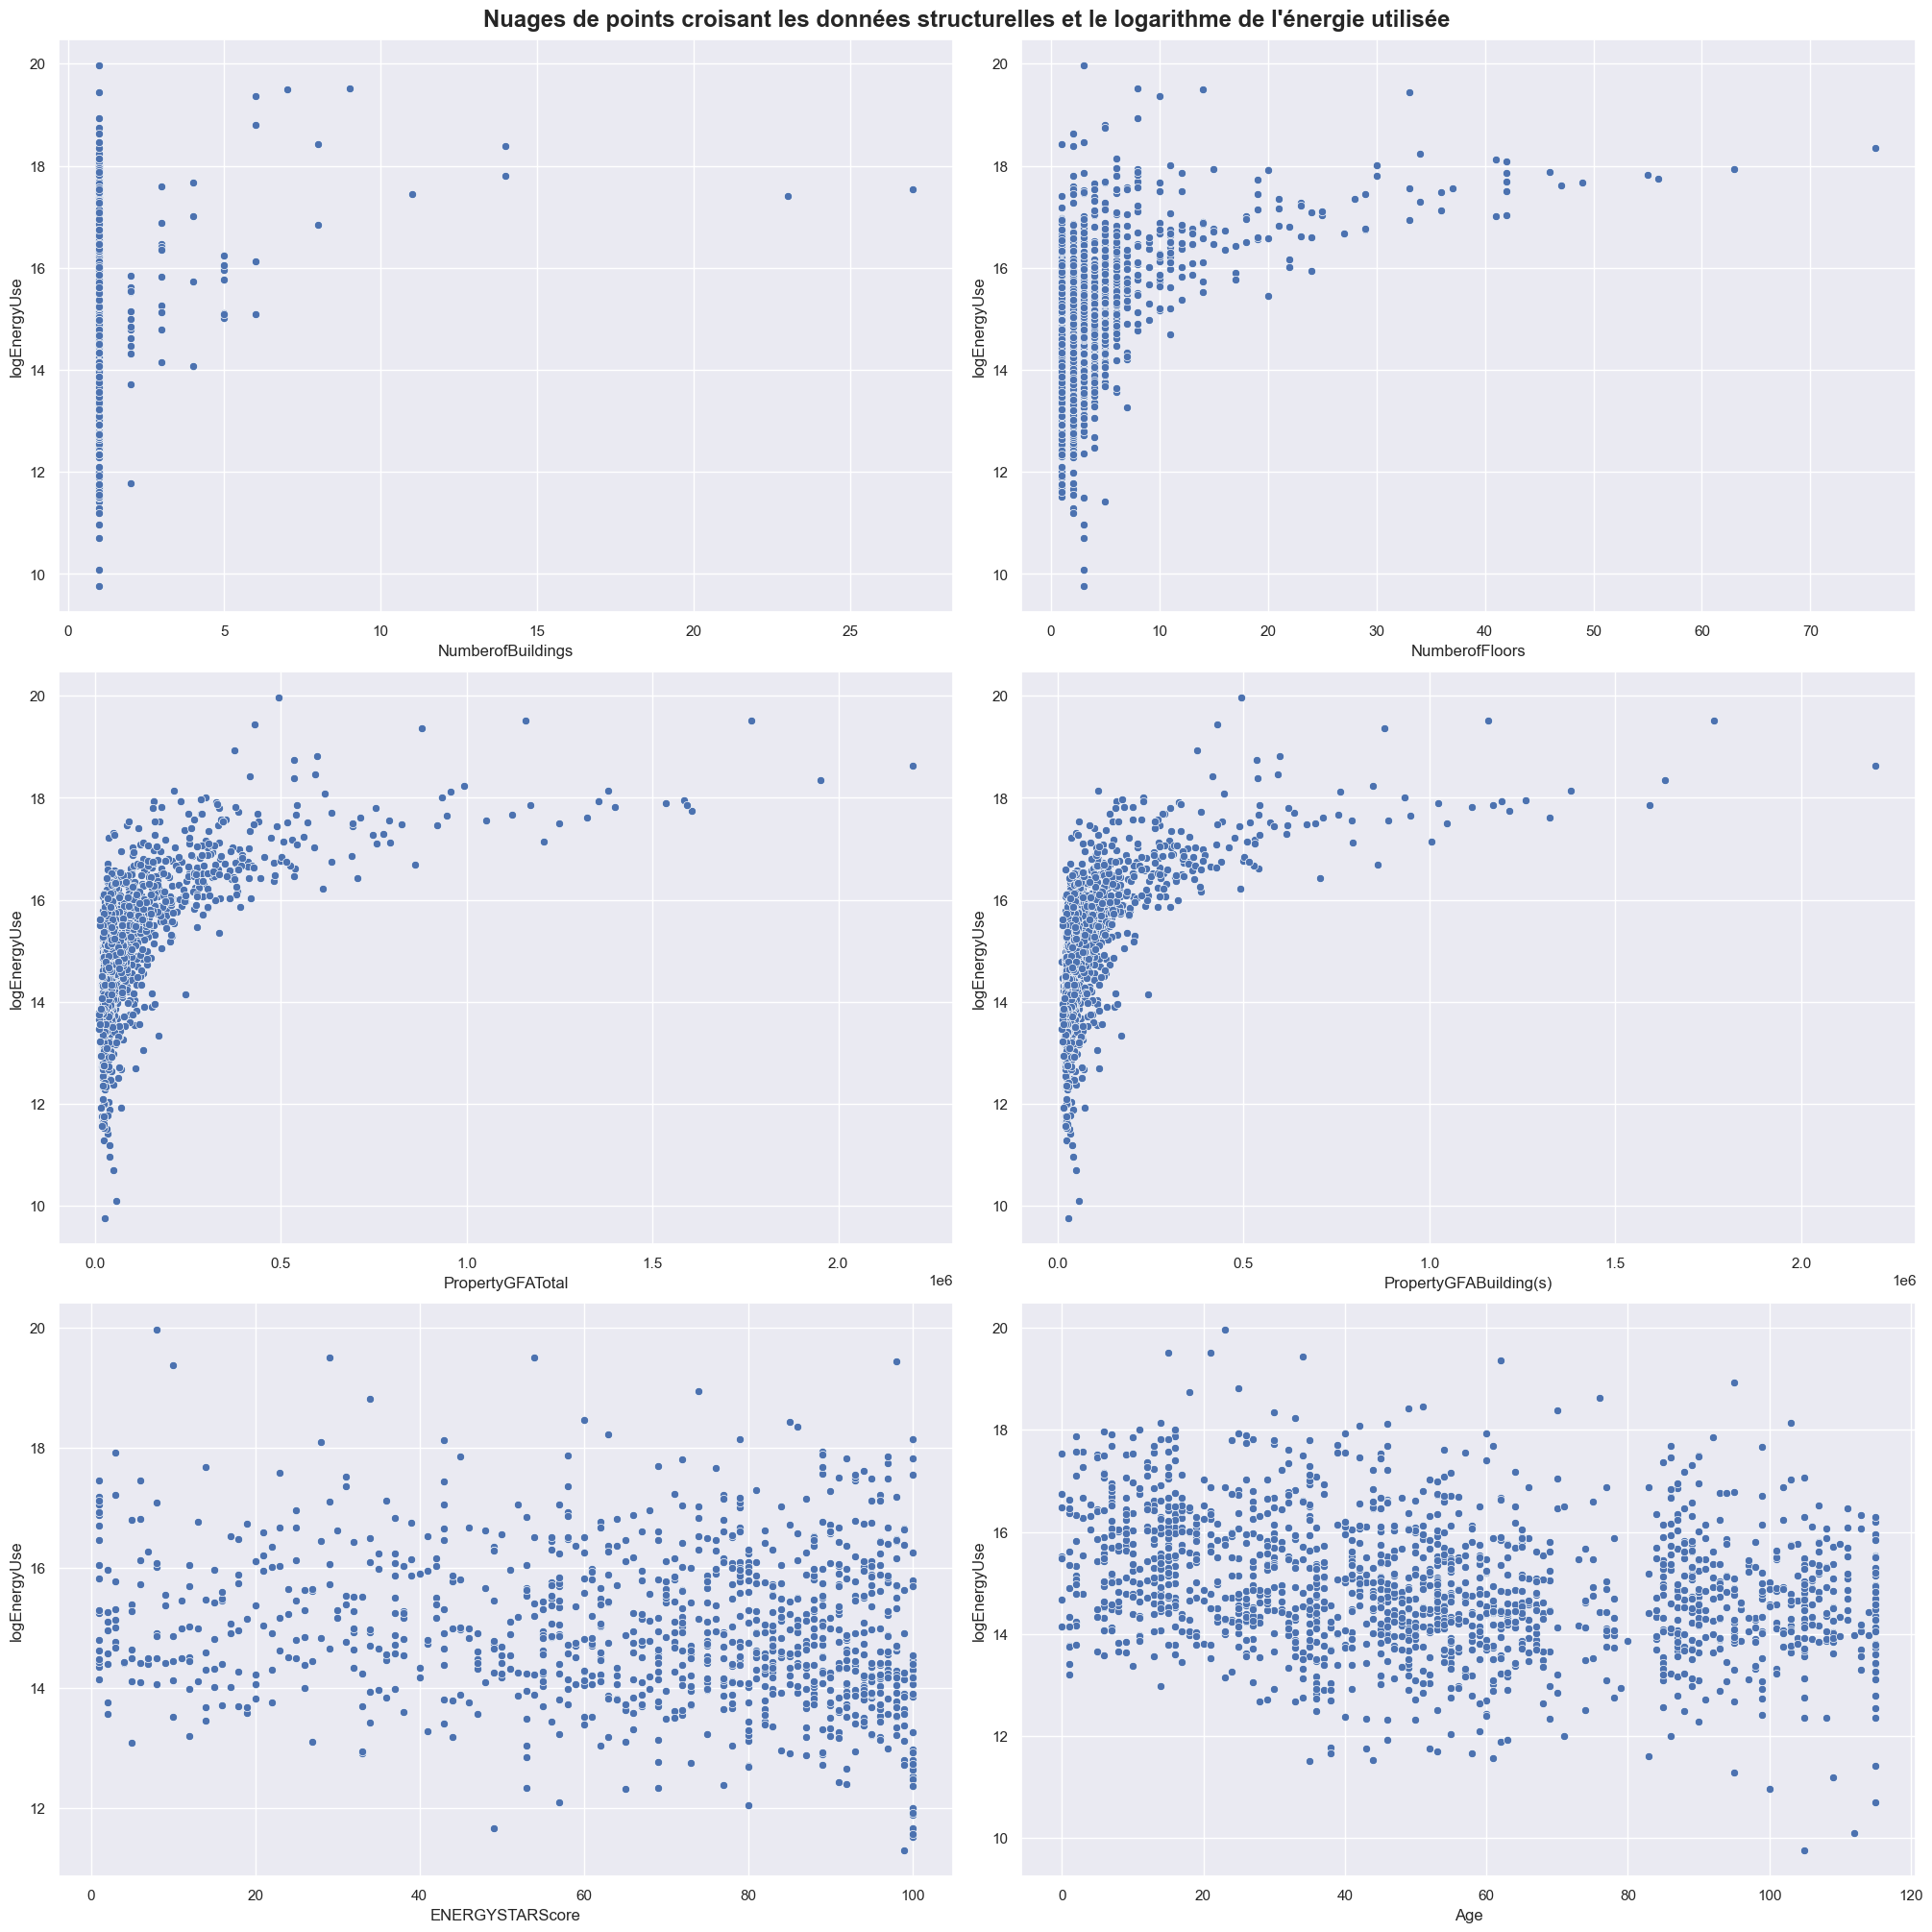

In [120]:
#Avant d'en parler plus longuement, regardons ce que donne ceci
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data,x = 'NumberofBuildings', y = 'logEnergyUse', ax = axis[0,0])
sns.scatterplot(data = data,x = 'NumberofFloors', y = 'logEnergyUse', ax = axis[0,1])
sns.scatterplot(data = data,x = 'PropertyGFATotal', y = 'logEnergyUse', ax = axis[1,0])
sns.scatterplot(data = data,x = 'PropertyGFABuilding(s)', y = 'logEnergyUse', ax = axis[1,1])
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'logEnergyUse', ax = axis[2,0])
sns.scatterplot(data = data,x = 'Age', y = 'logEnergyUse', ax = axis[2,1])
fig.suptitle("Nuages de points croisant les données structurelles et le logarithme de l'énergie utilisée",fontweight ="bold", size='x-large')

plt.show()

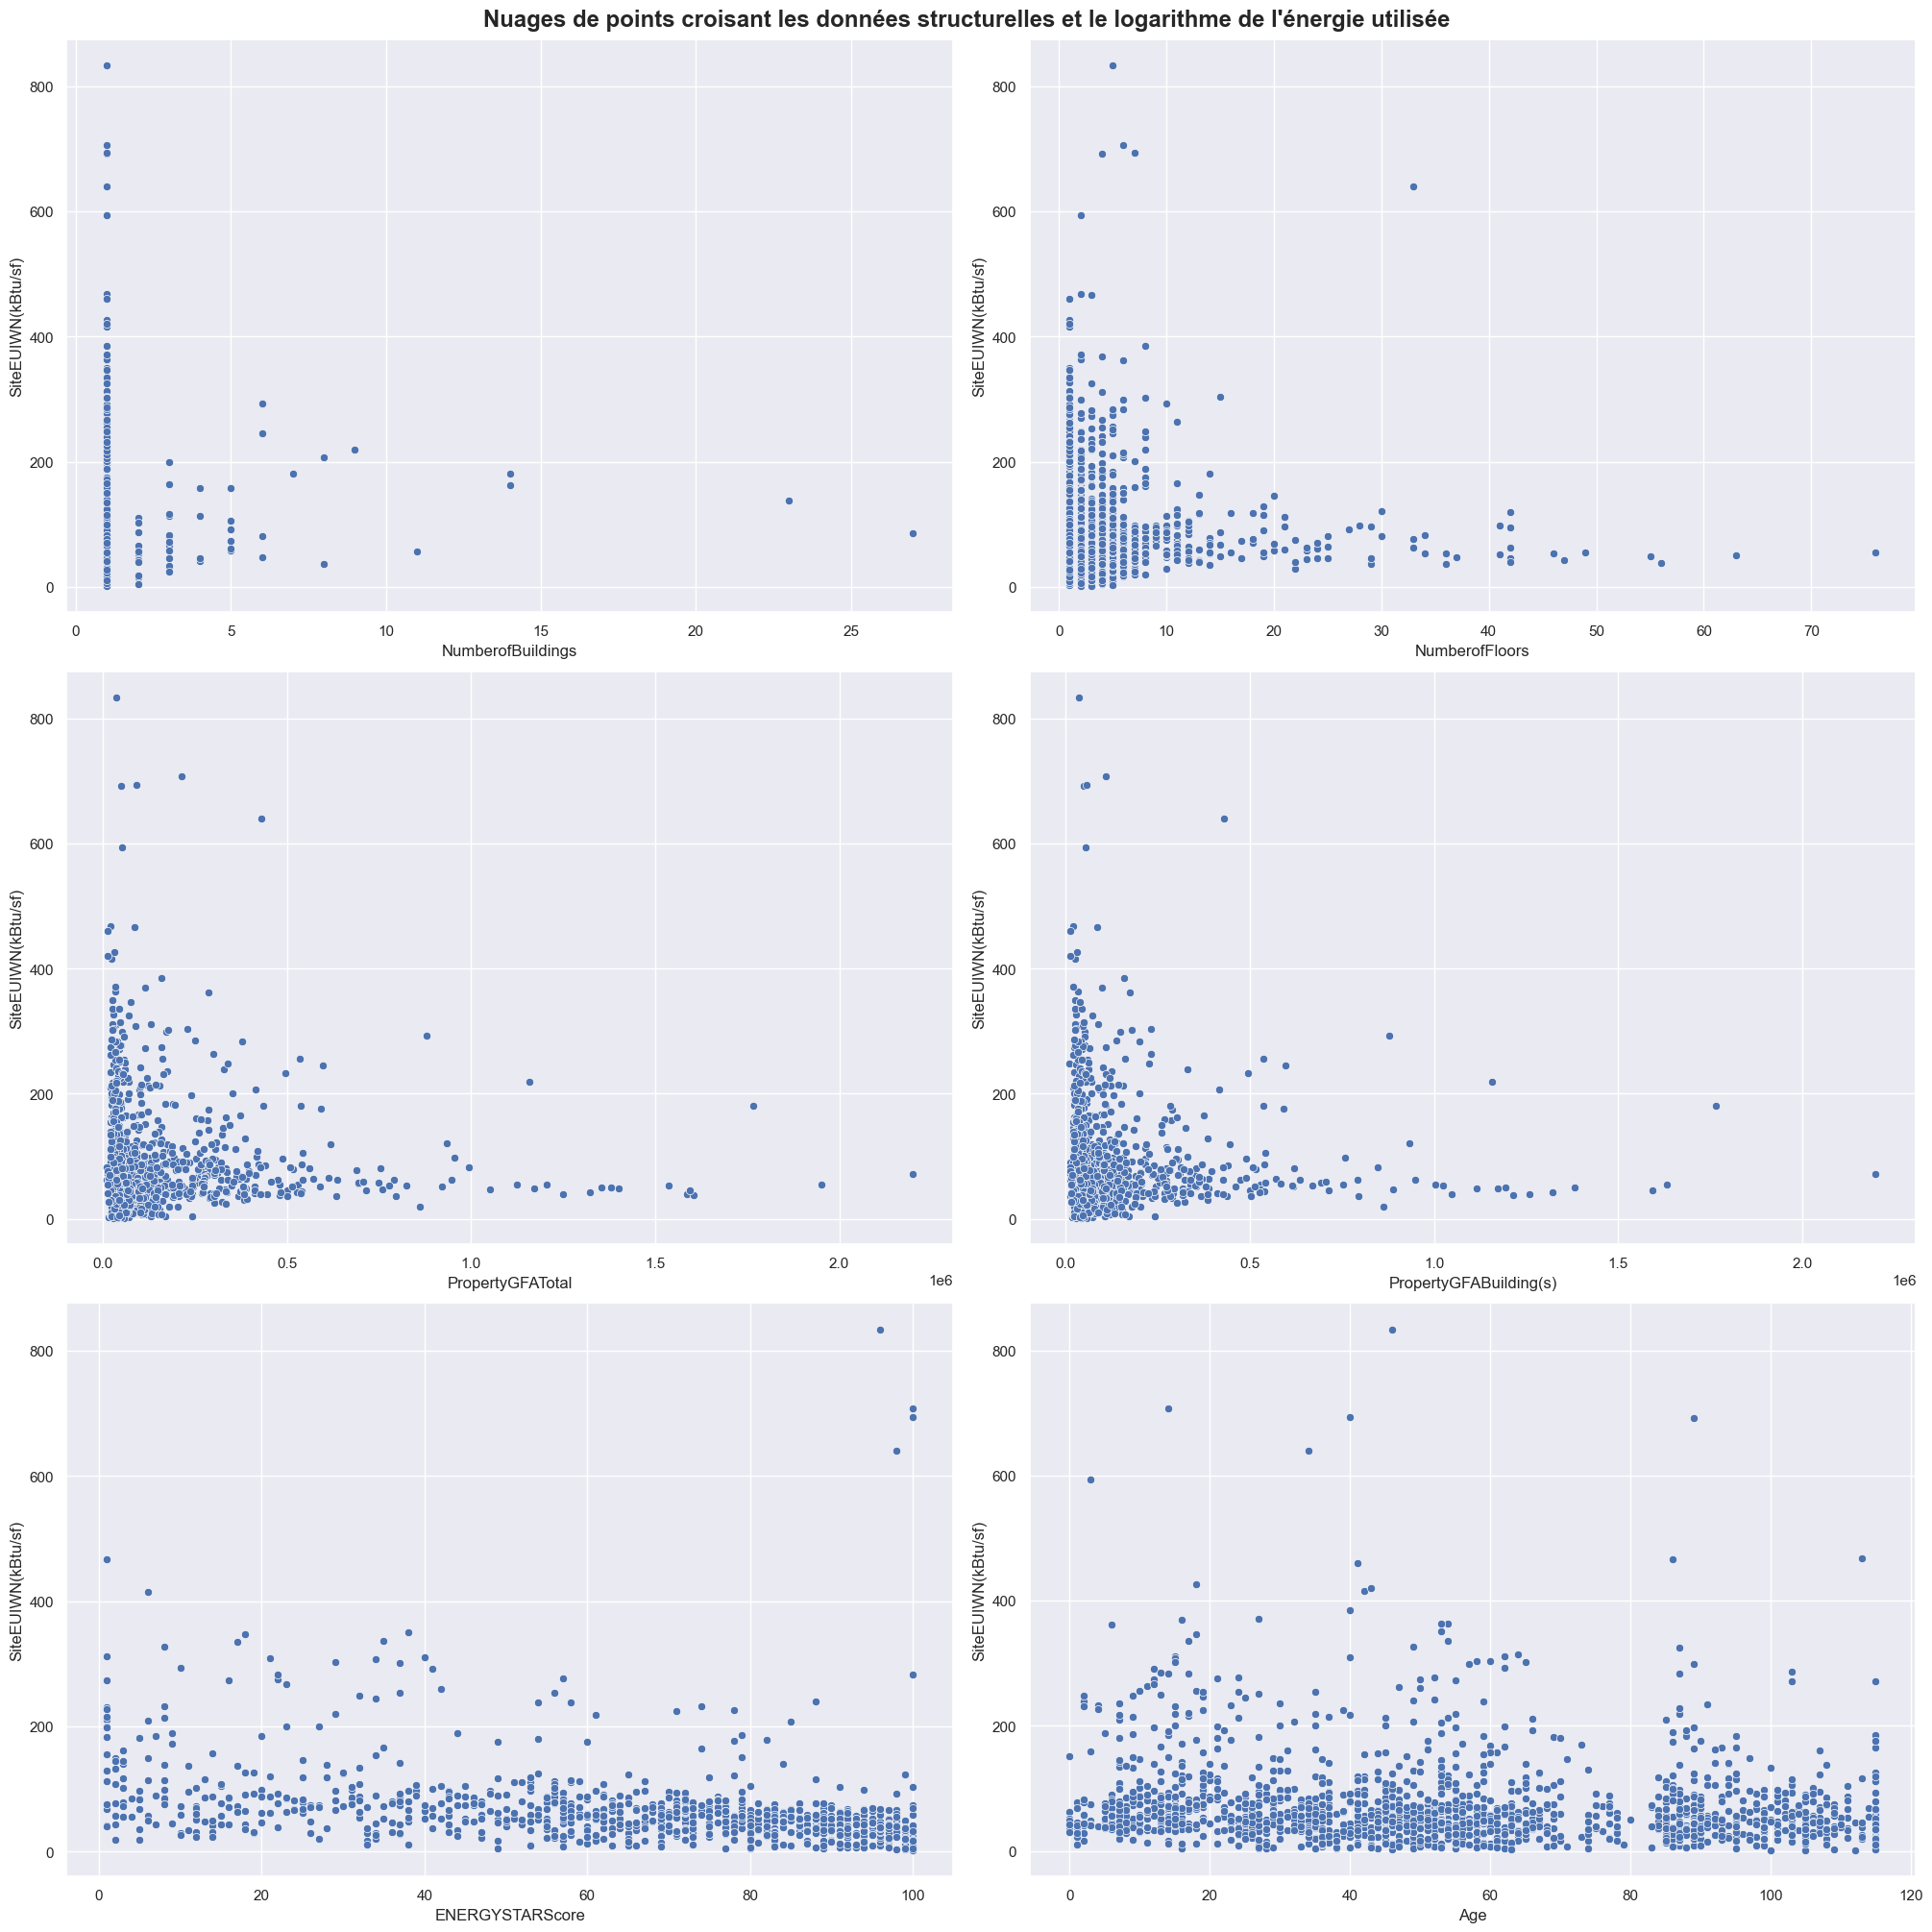

In [121]:
#Et enfin, au mètre carré :
fig, axis = plt.subplots(3,2, figsize = (20,20),layout="constrained")

sns.scatterplot(data = data,x = 'NumberofBuildings', y = 'SiteEUIWN(kBtu/sf)', ax = axis[0,0])
sns.scatterplot(data = data,x = 'NumberofFloors', y = 'SiteEUIWN(kBtu/sf)', ax = axis[0,1])
sns.scatterplot(data = data,x = 'PropertyGFATotal', y = 'SiteEUIWN(kBtu/sf)', ax = axis[1,0])
sns.scatterplot(data = data,x = 'PropertyGFABuilding(s)', y = 'SiteEUIWN(kBtu/sf)', ax = axis[1,1])
sns.scatterplot(data = data,x = 'ENERGYSTARScore', y = 'SiteEUIWN(kBtu/sf)', ax = axis[2,0])
sns.scatterplot(data = data,x = 'Age', y = 'SiteEUIWN(kBtu/sf)', ax = axis[2,1])
fig.suptitle("Nuages de points croisant les données structurelles et le logarithme de l'énergie utilisée",fontweight ="bold", size='x-large')

plt.show()

Pour conclure sur ces nuages de points, ils me paraissent tous difficilement exploitables.

En revanche, lien entre le log du GFA et le log du GHG (ainsi que le logEnergyUse) me parait limpide.

Je me demande même si cela ne vaudrait pas le coup de passer au logarithme sur... le nombre d'étages.

## Matrice des corrélations

Pour rappel, dans la case (i,j) on trouve le coefficient de Pearson entre les variables i et j.

Aussi, on n'y trouve que les variables quantitatives.

In [122]:
data.corr()

OSEBuildingID  NumberofBuildings  NumberofFloors  \
OSEBuildingID                1.000000          -0.023280       -0.285210   
NumberofBuildings           -0.023280           1.000000       -0.022051   
NumberofFloors              -0.285210          -0.022051        1.000000   
PropertyGFATotal            -0.311361           0.156576        0.706411   
PropertyGFABuilding(s)      -0.295585           0.180049        0.663395   
ENERGYSTARScore             -0.049066          -0.052972        0.120261   
SiteEUIWN(kBtu/sf)           0.001727           0.063545        0.032946   
SiteEnergyUseWN(kBtu)       -0.185940           0.252718        0.357182   
TotalGHGEmissions           -0.102854           0.253740        0.167726   
GHGEmissionsIntensity        0.089240           0.089121       -0.039094   
Age                          0.008434          -0.026561       -0.100770   
logEnergyUse                -0.395626           0.181133        0.471807   
logGHG                      -0.306085           0.171618        0.350233   
logGFA                      -0.541796           0.156628        0.599402   

                        PropertyGFATotal  PropertyGFABuilding(s)  \
OSEBuildingID                  -0.311361               -0.295585   
NumberofBuildings               0.156576                0.180049   
NumberofFloors                  0.706411                0.663395   
PropertyGFATotal                1.000000                0.979531   
PropertyGFABuilding(s)          0.979531                1.000000   
ENERGYSTARScore                 0.129805                0.124391   
SiteEUIWN(kBtu/sf)              0.041393                0.034353   
SiteEnergyUseWN(kBtu)           0.593783                0.617894   
TotalGHGEmissions               0.424071                0.462845   
GHGEmissionsIntensity          -0.003479                0.019846   
Age                            -0.212828               -0.168694   
logEnergyUse                    0.610402                0.595358   
logGHG                          0.484192                0.483575   
logGFA                          0.803375                0.772015   

                        ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
OSEBuildingID                 -0.049066            0.001727   
NumberofBuildings             -0.052972            0.063545   
NumberofFloors                 0.120261            0.032946   
PropertyGFATotal               0.129805            0.041393   
PropertyGFABuilding(s)         0.124391            0.034353   
ENERGYSTARScore                1.000000           -0.347265   
SiteEUIWN(kBtu/sf)            -0.347265            1.000000   
SiteEnergyUseWN(kBtu)         -0.079584            0.364247   
TotalGHGEmissions             -0.111370            0.272475   
GHGEmissionsIntensity         -0.294728            0.723957   
Age                            0.038516           -0.124658   
logEnergyUse                  -0.157602            0.554029   
logGHG                        -0.148414            0.547229   
logGFA                         0.150648            0.075354   

                        SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
OSEBuildingID                       -0.185940          -0.102854   
NumberofBuildings                    0.252718           0.253740   
NumberofFloors                       0.357182           0.167726   
PropertyGFATotal                     0.593783           0.424071   
PropertyGFABuilding(s)               0.617894           0.462845   
ENERGYSTARScore                     -0.079584          -0.111370   
SiteEUIWN(kBtu/sf)                   0.364247           0.272475   
SiteEnergyUseWN(kBtu)                1.000000           0.920984   
TotalGHGEmissions                    0.920984           1.000000   
GHGEmissionsIntensity                0.431891           0.506049   
Age                                 -0.136606          -0.077487   
logEnergyUse                         0.577650           0.436035   
logGHG                          

Quelle lecture de ceci ?

- Premièrement, les corrélations entre le logGFA et les logGHG ou logEnergyUse sont plus importantes que celles des paramètres avant transformation. Pour la suite, cela m'incite fortement à conserver ces formats logarithmiques (et même, à prédire les logarithmes plutôt que les valeurs réelles).

- Ensuite, et ce n'était pas clair avec les scatterplots, l'âge des bâtiments est corrélé négativement avec nos targets. On s'y attendait bien sûr, mais c'est confirmé.

- C'est aussi le cas de l'ENERGYSTAR Score. C'est une bonne nouvelle pour lui, mais c'est probablement dû à sa méthode de calcul. Il est beaucoup plus performant sur les variables "normalisées" (par squared foot, ou en intensité pour le CO2)

- Les deux variables de "GFA" sont extrêmement corrélées entre elles. Cela aussi était attendu. Il n'est probablement pas nécesaire de conserver les deux.

- Le "NumberofFloors" est très fortement corrélé avec le GFA. Il faudra en tenir compte par la suite.

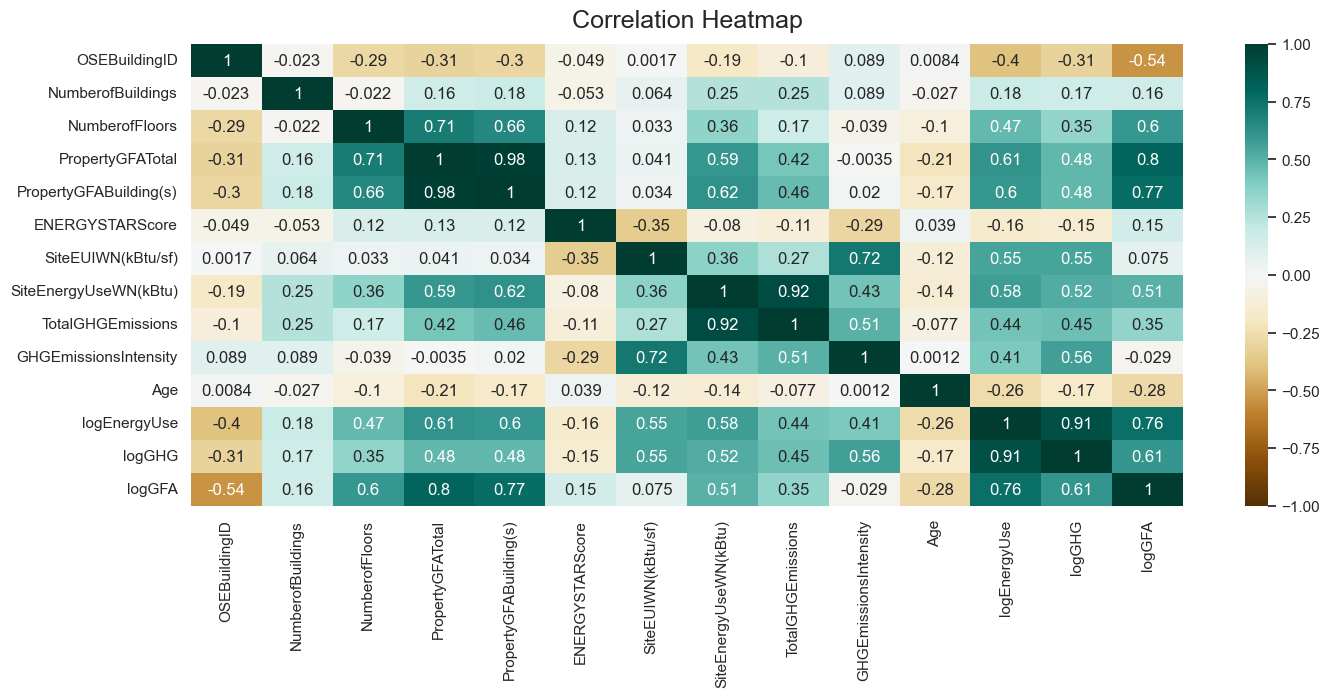

In [123]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

Je dois ajouter un commentaire ici que je n'avais pas fait avant : nos deux targets sont très fortement corrélées. Je m'y attendais, mais pas autant.

Essayons aussi la méthode spearman pour calculer la matrice de corrélations.

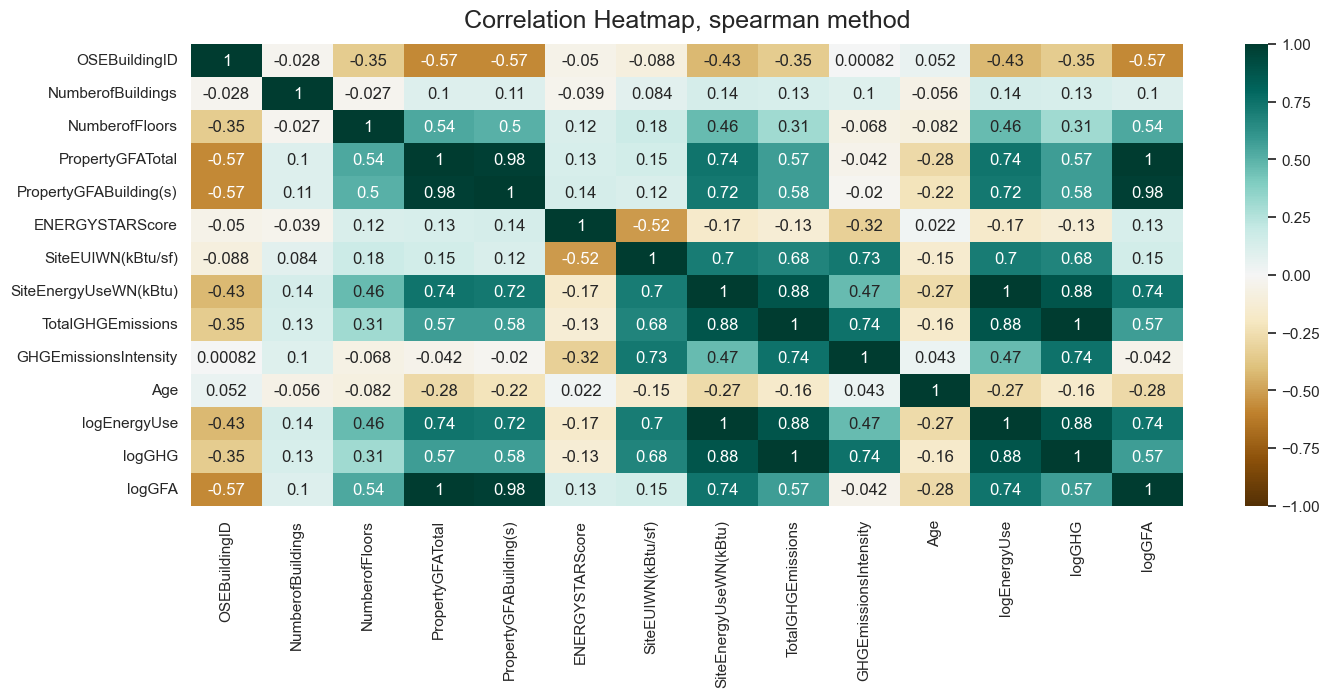

In [124]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(method = 'spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap, spearman method', fontdict={'fontsize':18}, pad=12)
plt.show()

Rien ne me saute aux yeux, les corrélations décelées semblent être les mêmes.

Avant d'exposer les conclusions de cette analyse, je souhaite encore explorer quelques pistes avec mes variables qualitatives : Neighborhood, et PrimaryPropertyType

## ANOVAs

Je vais donc tenter d'analyser les variables Neighborhood/PrimaryPropertyType, par rapport aux targets : logGHG et logEnergyUse. Soit 4 observations au total.

Commençons par visualiser.

#### logGHG en fonction du quartier

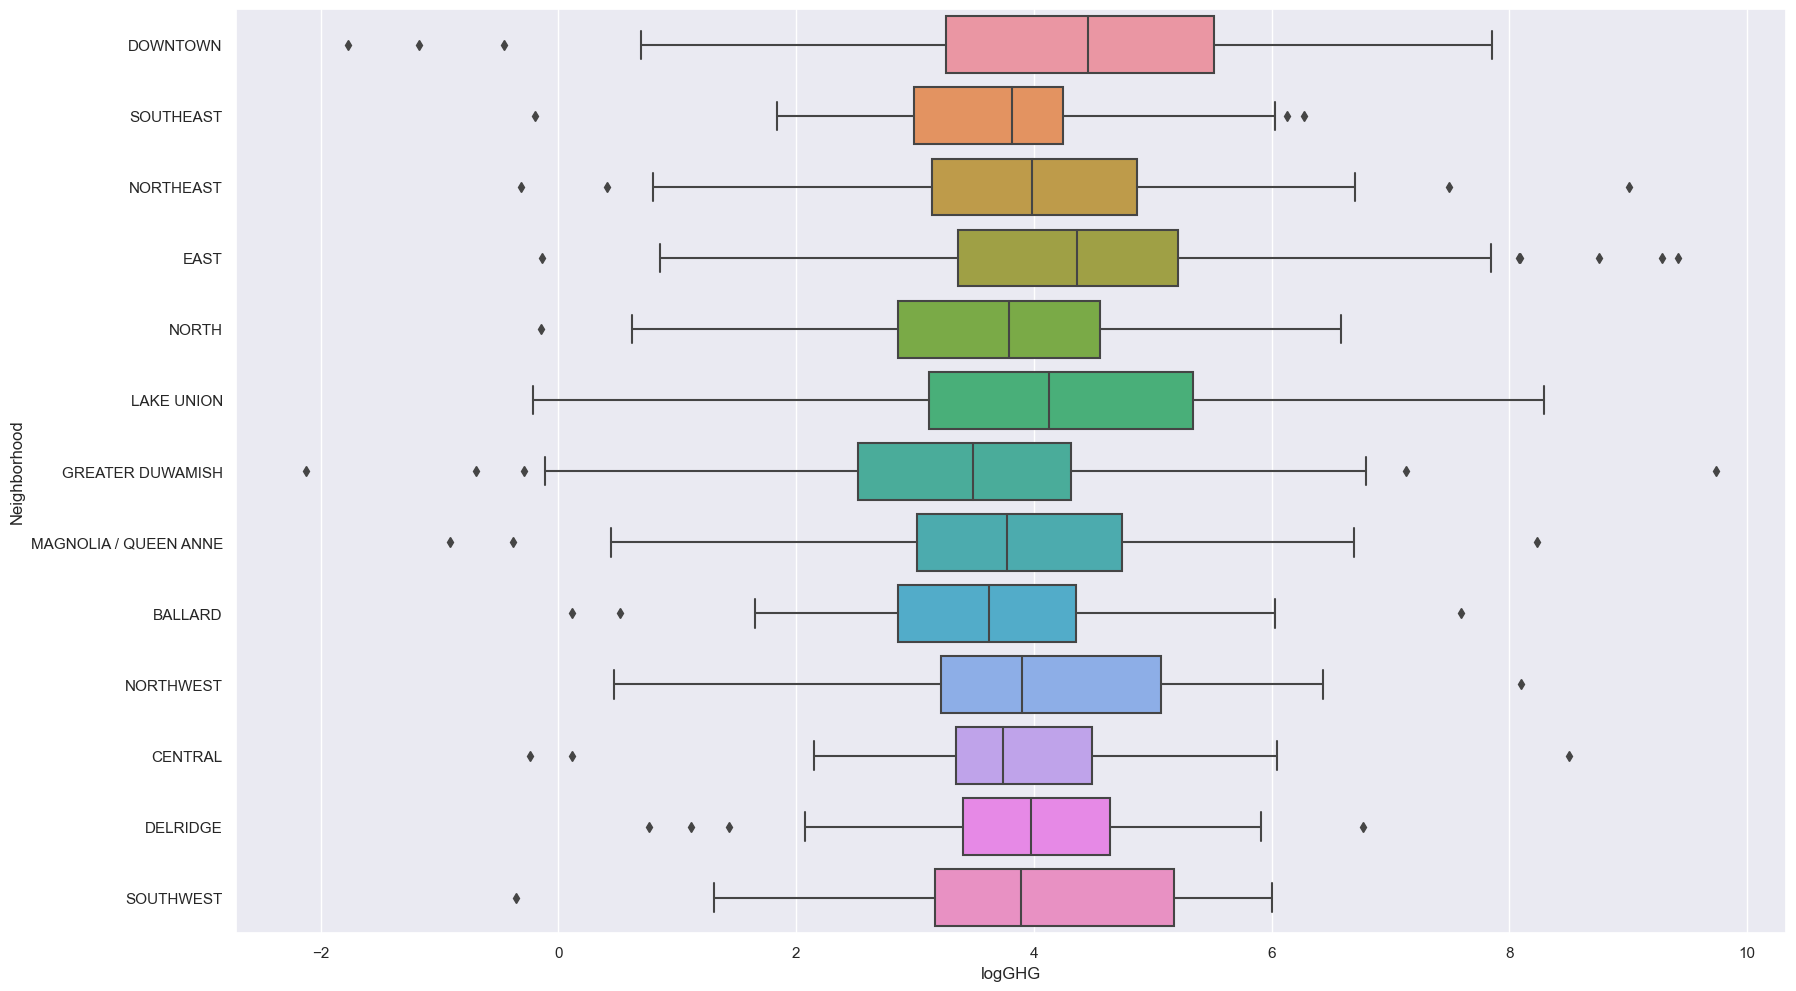

In [125]:
plt.subplots(figsize=(20,12))
ax = sns.boxplot(x="logGHG", y="Neighborhood", data=data)

A première vue, le quartier semble peu influer sur les émissions de CO2. Approfondissons avec un test d'eta-squared.

In [126]:
def eta_squared(x,y): #Ceci est un copier/coller éhonté de la fonction du cours d'OpenClassrooms
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [127]:
eta_squared(data['Neighborhood'],data['logGHG'])

0.057428367081069694

Ce test nous confirme que la corrélation est faible (eta < 0.06)

#### logEnergyUse en fonction du quartier

Même processus, avec l'énergie au lieu du CO2.

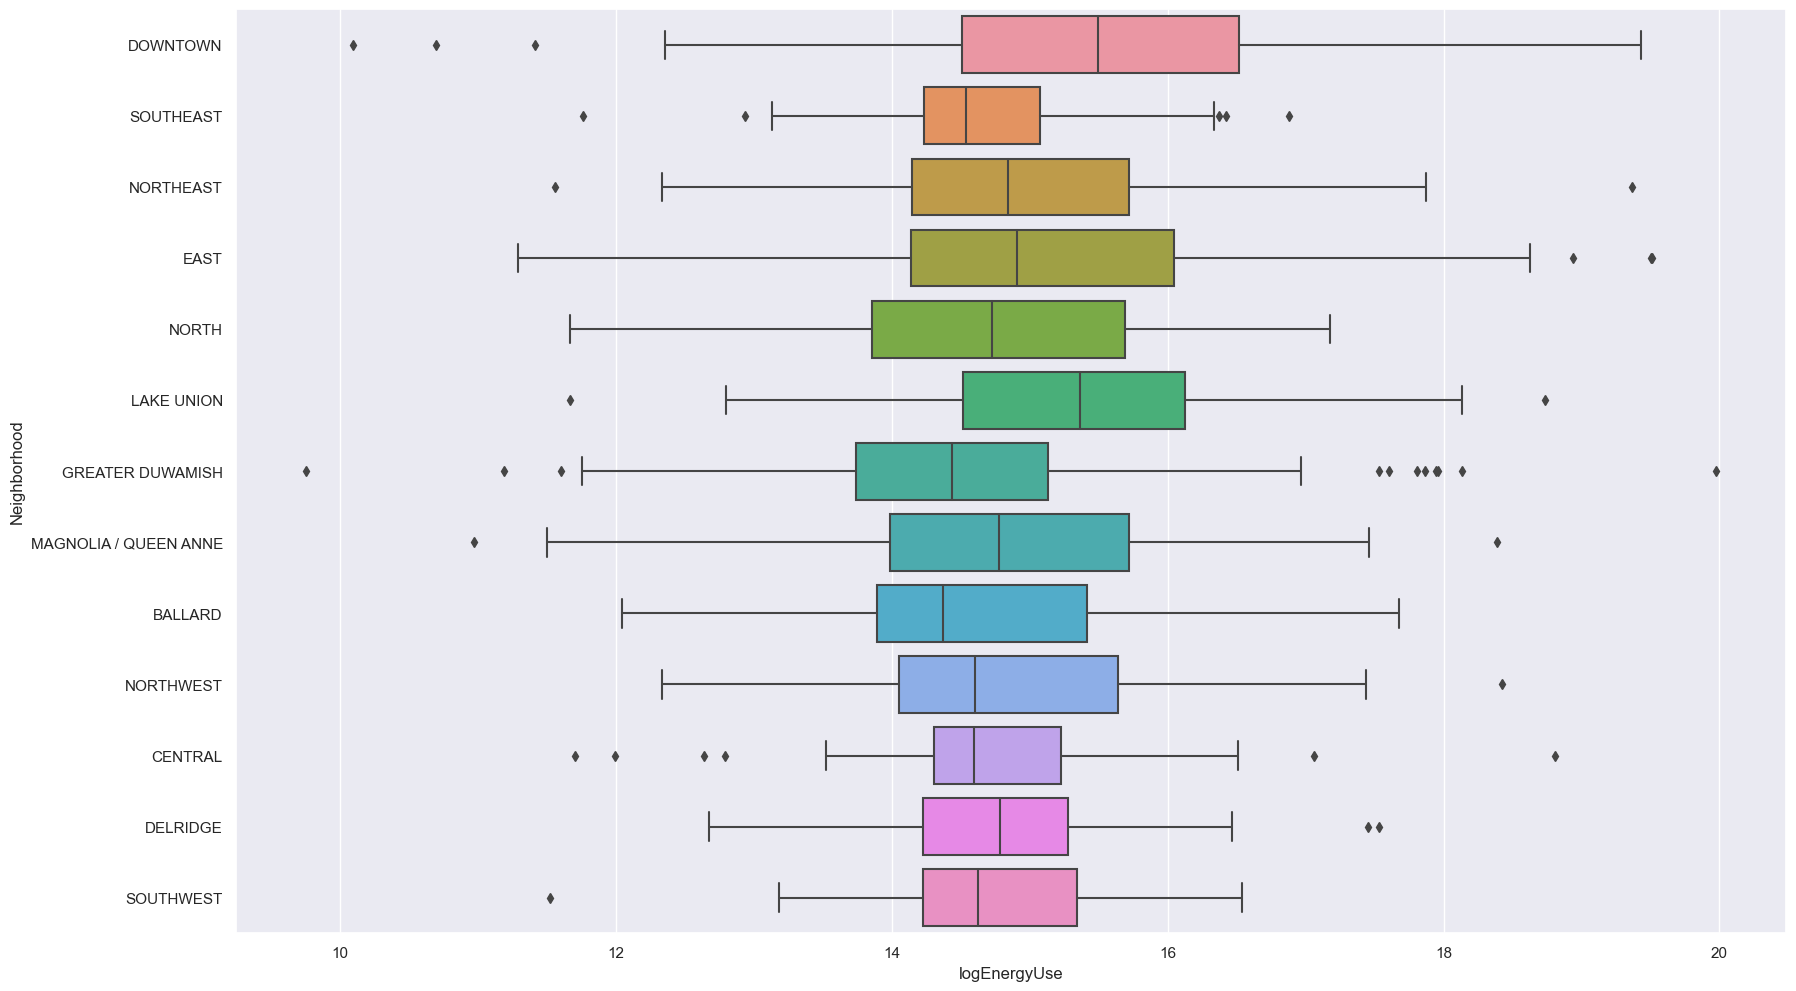

In [128]:
plt.subplots(figsize=(20,12))
ax = sns.boxplot(x="logEnergyUse", y="Neighborhood", data=data)

Cette fois-ci, je constate que les quartiers DOWNTOWN et LAKE UNION se détachent nettement au niveau de la médiane.
Cherchons une confirmation.

In [129]:
eta_squared(data['Neighborhood'],data['logEnergyUse'])

0.09006416363152024

eta est compris entre 0.06 et 0.14, la corrélation est, cette fois-ci, moyenne.

#### logGHG en fonction du type

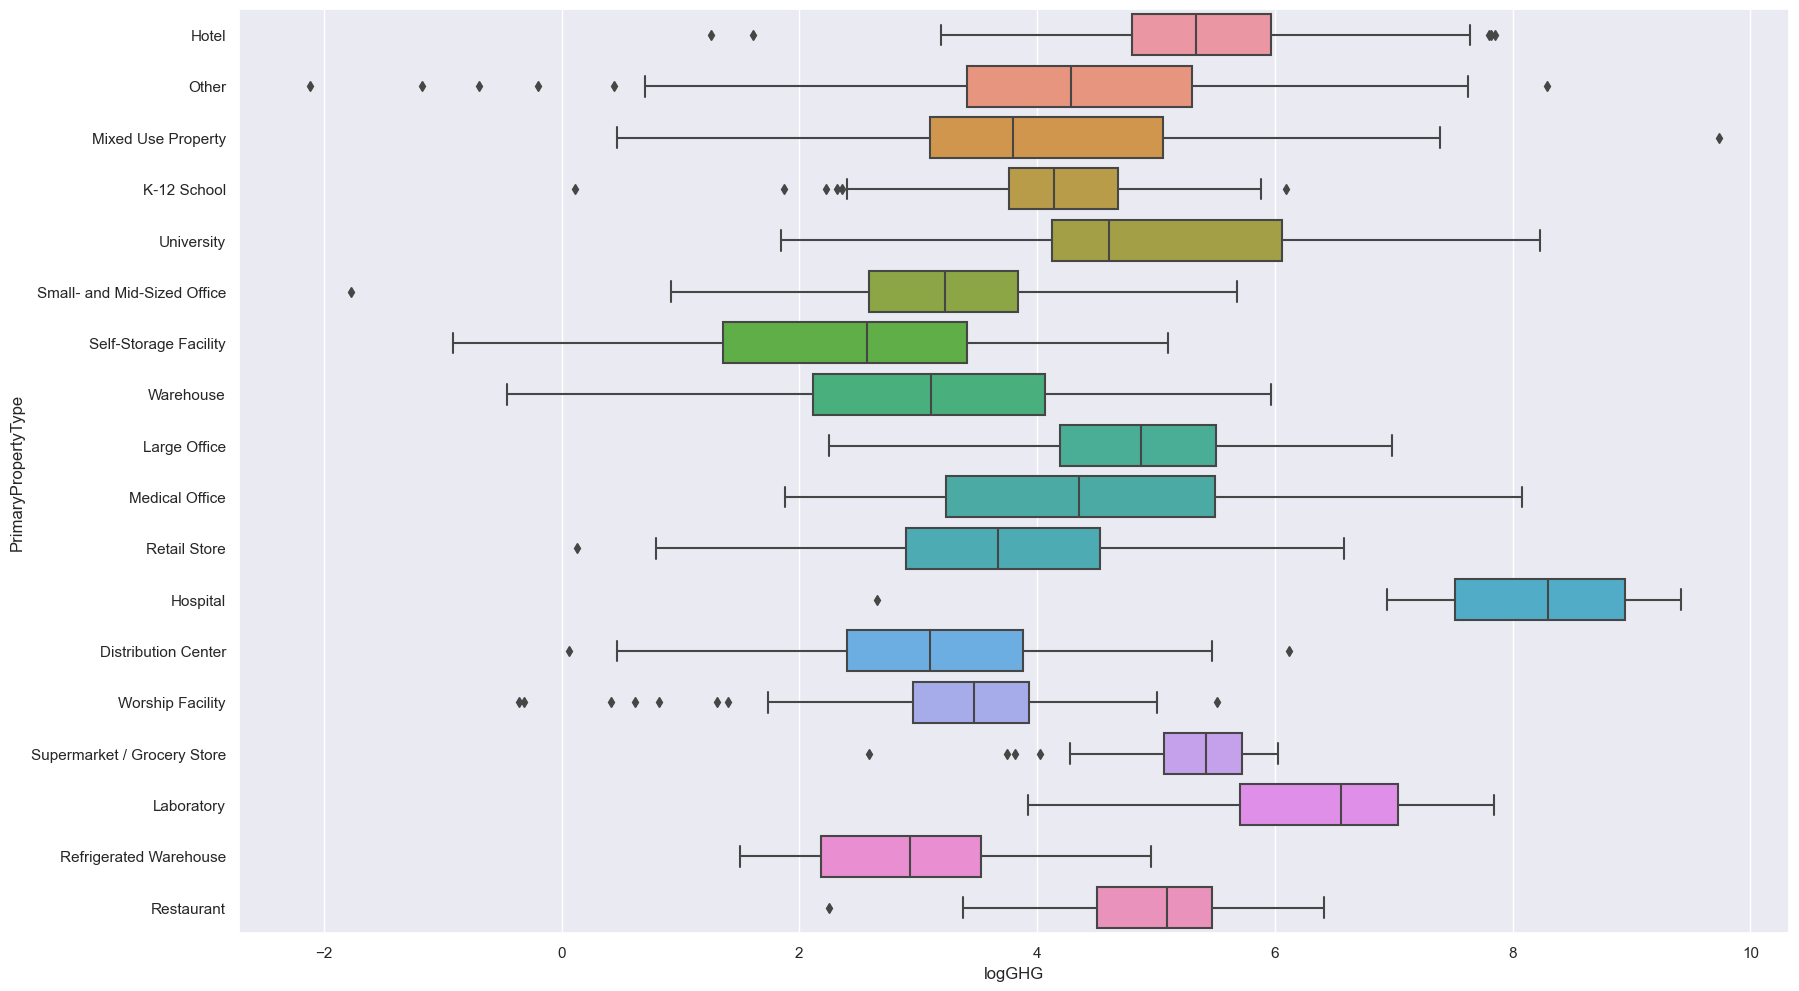

In [130]:
plt.subplots(figsize=(20,12))
ax = sns.boxplot(x="logGHG", y="PrimaryPropertyType", data=data)

Ce n'est plus du tout la même histoire. On peut clairement identifier les hôpitaux comme plus grands consommateurs, et les entrepôts à l'inverse. (Logique !)

In [131]:
eta_squared(data['PrimaryPropertyType'],data['logGHG'])

0.3063635379637303

Il sagit bien d'une forte corrélation.

#### logEnergyUse en fonction du type

pour finir :

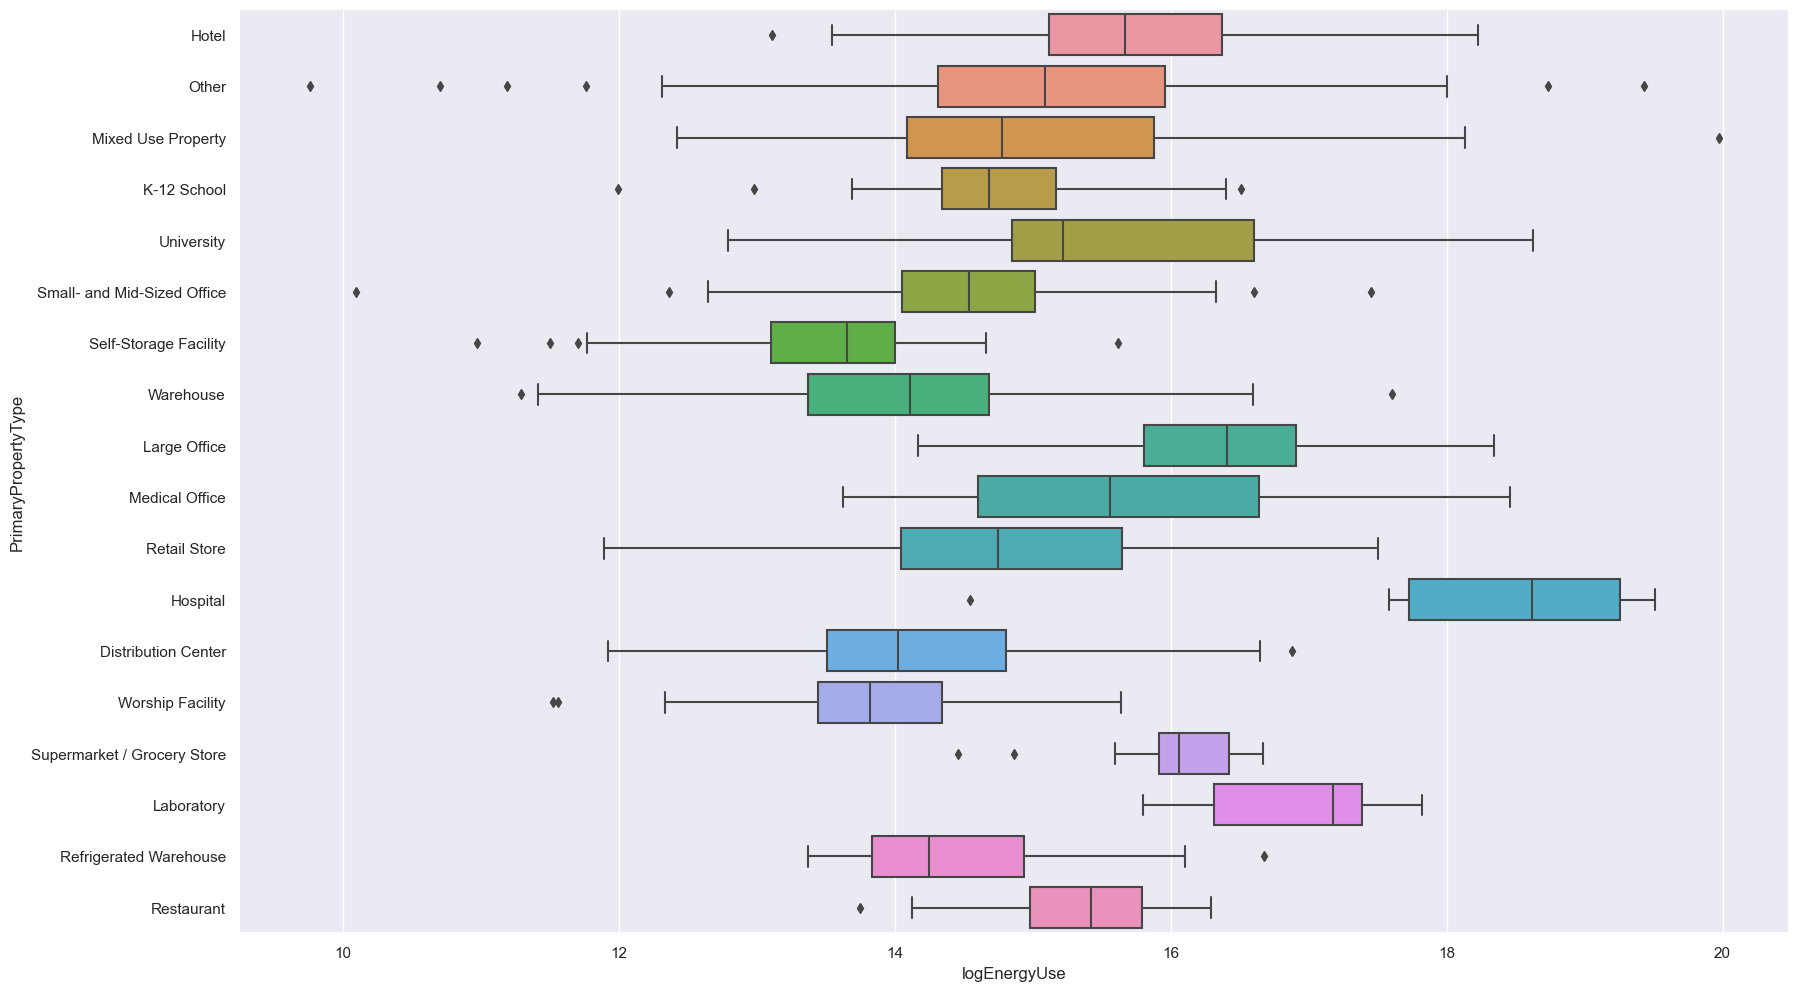

In [132]:
plt.subplots(figsize=(20,12))
ax = sns.boxplot(x="logEnergyUse", y="PrimaryPropertyType", data=data)

Je réitère mes commentaires à propos du CO2.

In [133]:
eta_squared(data['PrimaryPropertyType'],data['logEnergyUse'])

0.3898994793555102

La corrélation est encore plus forte.

## Conclusions

1) Quelles colonnes conserve-t-on ?

- Les deux variables de GFA sont trop corrélées. Je vais conserver le "GFA Total", en version non logarithmique (même si le passage au log nous a permis d'observer un très beau diagramme de dispersion).

- Je supprime le NumberofBuildings, valant quasiment toujours 1, et avec trop peu d'individus représentant d'autres nombres.

- Je ne veux pas commenter l'EnergySTARScore pour l'instant. Ses corrélations négatives avec les targets promettent du bon pour les prédictions, mais s'il est calculé à partir des cibles... Alors il n'est pas envisageable de l'utiliser. (C'est demandé, donc je le ferai)

- Je conserve le reste : Neighborhood, PropertyType, Age, NumberofFloors. (Et donc, GFATotal et EnergyScore)

- Pour les cibles, je garde bien sûr les versions logarithmiques logGHG et logEnergyUse, bien plus lisibles.

- Je vais aussi conserver l'ID des bâtiments, éventuellement pour un traîtement d'outliers postérieur. (jouant trop sur l'erreur de prédiction)

2) Les corrélations

Elles sont assez importantes, et me permettent de penser que faire des prédictions à l'aide de ces données est crédible. (Contrairement, par exemple, au précédent projet lorsque j'essayais d'imputer des valeurs manquantes)

De plus, en dehors de l'energy score, je n'ai aucune raison de penser que les variables sont calculées à partir des targets.

Cela me met en confiance pour la suite.

## Préparation des données

In [134]:
#Préparons notre dataframe pour la suite.
data.drop(columns = ["PropertyGFABuilding(s)","NumberofBuildings","logGFA","SiteEnergyUseWN(kBtu)","SiteEUIWN(kBtu/sf)","TotalGHGEmissions","GHGEmissionsIntensity"] , inplace=True)

In [135]:
data.head()

OSEBuildingID PrimaryPropertyType Neighborhood  NumberofFloors  \
0              1               Hotel     DOWNTOWN              12   
1              2               Hotel     DOWNTOWN              11   
2              3               Hotel     DOWNTOWN              41   
3              5               Hotel     DOWNTOWN              10   
4              8               Hotel     DOWNTOWN              18   

   PropertyGFATotal  ENERGYSTARScore  Age  logEnergyUse    logGHG  
0             88434             60.0   88     15.824652  5.521381  
1            103566             61.0   19     15.974742  5.689886  
2            956110             43.0   46     18.118725  7.644575  
3             61320             56.0   89     15.753792  5.657494  
4            175580             75.0   35     16.500395  6.224578

In [136]:
data.shape

(1583, 9)

In [137]:
data.to_csv("ready.csv",index = False)